In [1]:
import numpy as np
import pandas as pd



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import plotly.graph_objs as go
import plotly as py
from plotly.offline import init_notebook_mode



In [3]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
features=pd.read_csv(r"C:\Users\Administrator\Downloads\features.csv.zip")
train=pd.read_csv(r"C:\Users\Administrator\Downloads\train.csv.zip")
test=pd.read_csv(r"C:\Users\Administrator\Downloads\test.csv.zip")
stores=pd.read_csv(r"C:\Users\Administrator\Downloads\stores (1).csv")
sample_submission=pd.read_csv(r"C:\Users\Administrator\Downloads\sampleSubmission.csv.zip")

In [5]:
pd.DataFrame(features.dtypes, columns=['Type']).T

Store    Date Temperature Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
Type  int64  object     float64    float64   float64   float64   float64   

     MarkDown4 MarkDown5      CPI Unemployment IsHoliday  
Type   float64   float64  float64      float64      bool

In [6]:
pd.DataFrame(train.dtypes, columns=['Type']).T

Store   Dept    Date Weekly_Sales IsHoliday
Type  int64  int64  object      float64      bool

In [7]:
pd.DataFrame(stores.dtypes, columns=['Type']).T

Store    Type   Size
Type  int64  object  int64

In [8]:
features.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [9]:
%%time
features.describe()

CPU times: total: 46.9 ms
Wall time: 27.2 ms


Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259  
min      -179.260000      0.220000    -185.170000   126.064000      3.684000  
25%         6.600000    304.687500    1440.827500   132.364839      6.634000  
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000  
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000  
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000

In [10]:
train.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [11]:
%%time
train.describe()

CPU times: total: 46.9 ms
Wall time: 44.8 ms


Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

In [12]:
stores.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [13]:
%%time
stores.describe()

CPU times: total: 15.6 ms
Wall time: 13.9 ms


Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000

## Pre-Processing

We'll merge data: features and stores have a commom key 'Stores' we can create a new data using the keys 'Store', 'Dept' and 'IsHoliday'. The data will be loaded into 'dataset, dataset_test'.

In [14]:
dataset = train.merge(stores, how='left').merge(features, how='left')
dataset.shape

(421570, 16)

In [15]:
dataset.head() 

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1  2010-02-05      24924.50      False    A  151315        42.31   
1      1     1  2010-02-12      46039.49       True    A  151315        38.51   
2      1     1  2010-02-19      41595.55      False    A  151315        39.93   
3      1     1  2010-02-26      19403.54      False    A  151315        46.63   
4      1     1  2010-03-05      21827.90      False    A  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [16]:
dataset_test = test.merge(stores, how='left').merge(features, how='left')
dataset_test.shape

(115064, 15)

In [17]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Year'] = pd.to_datetime(dataset['Date']).dt.year
dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
dataset['Week'] = pd.to_datetime(dataset['Date']).dt.week
dataset['DayOfTheWeek'] = dataset['Date'].dt.dayofweek
dataset['Day'] = pd.to_datetime(dataset['Date']).dt.day
dataset.replace({'A': 1, 'B': 2,'C':3},inplace=True)

dataset_test['Date'] = pd.to_datetime(dataset_test['Date'])
dataset_test['Year'] = pd.to_datetime(dataset_test['Date']).dt.year
dataset_test['Month'] = pd.to_datetime(dataset_test['Date']).dt.month
dataset_test['Week'] = pd.to_datetime(dataset_test['Date']).dt.week
dataset_test['DayOfTheWeek'] = dataset_test['Date'].dt.dayofweek

dataset_test['Day'] = pd.to_datetime(dataset_test['Date']).dt.day
dataset_test.replace({'A': 1, 'B': 2,'C':3},inplace=True)

## Exploratory Data Analysis
Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data.

## Examine Missing Values
Next we can look at the number and percentage of missing values in each column

In [18]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [19]:
%%time
missing_data(dataset)

CPU times: total: 93.8 ms
Wall time: 106 ms


Store   Dept            Date Weekly_Sales IsHoliday   Type   Size  \
Total        0      0               0            0         0      0      0   
Percent    0.0    0.0             0.0          0.0       0.0    0.0    0.0   
Types    int64  int64  datetime64[ns]      float64      bool  int64  int64   

        Temperature Fuel_Price  MarkDown1  ...  MarkDown3  MarkDown4  \
Total             0          0     270889  ...     284479     286603   
Percent         0.0        0.0  64.257181  ...  67.480845  67.984676   
Types       float64    float64    float64  ...    float64    float64   

         MarkDown5      CPI Unemployment   Year  Month   Week DayOfTheWeek  \
Total       270138        0            0      0      0      0            0   
Percent  64.079038      0.0          0.0    0.0    0.0    0.0          0.0   
Types      float64  float64      float64  int64  int64  int64        int64   

           Day  
Total        0  
Percent    0.0  
Types    int64  

[3 rows x 21 columns]

In [20]:
#pip install quilt

## Handling Missing Values

In [21]:
#pip install missingno 

<Axes: >

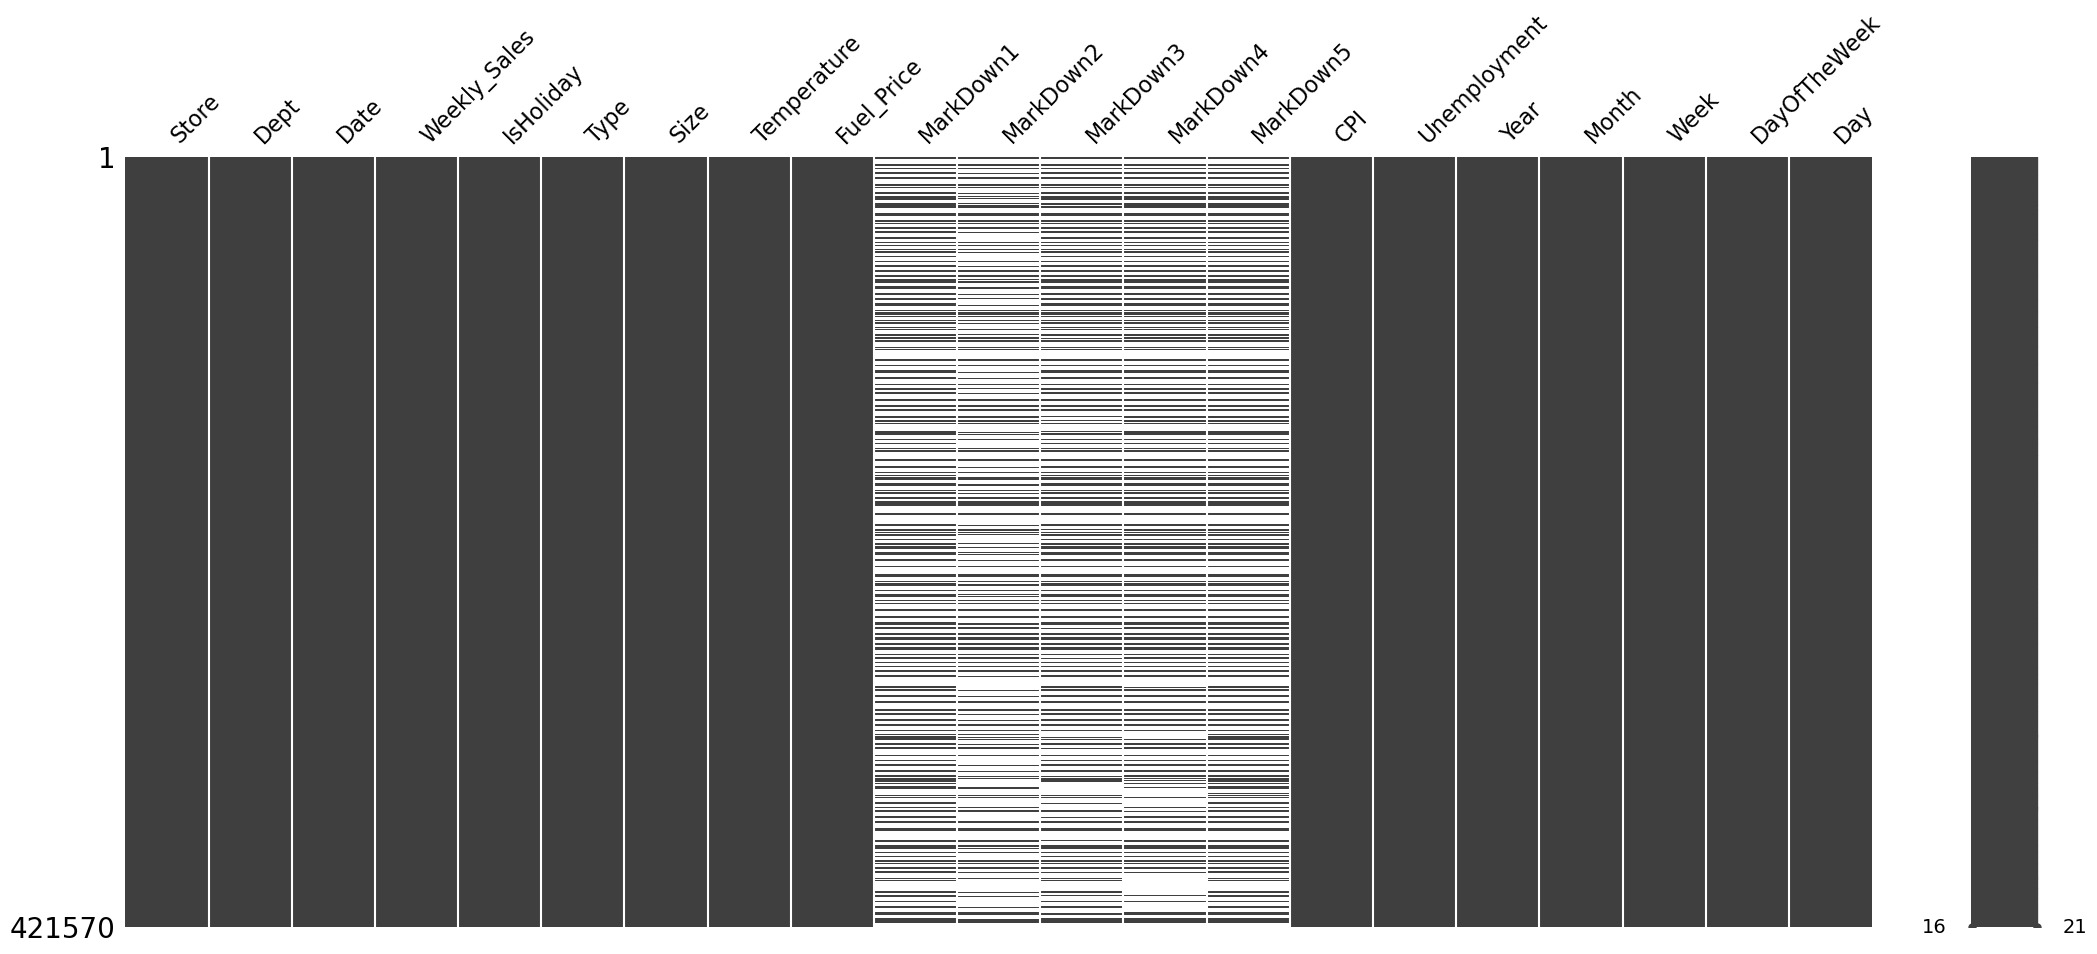

In [22]:
import missingno as msno
msno.matrix(dataset)

Heatmap. The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

CPU times: total: 484 ms
Wall time: 565 ms


<Axes: >

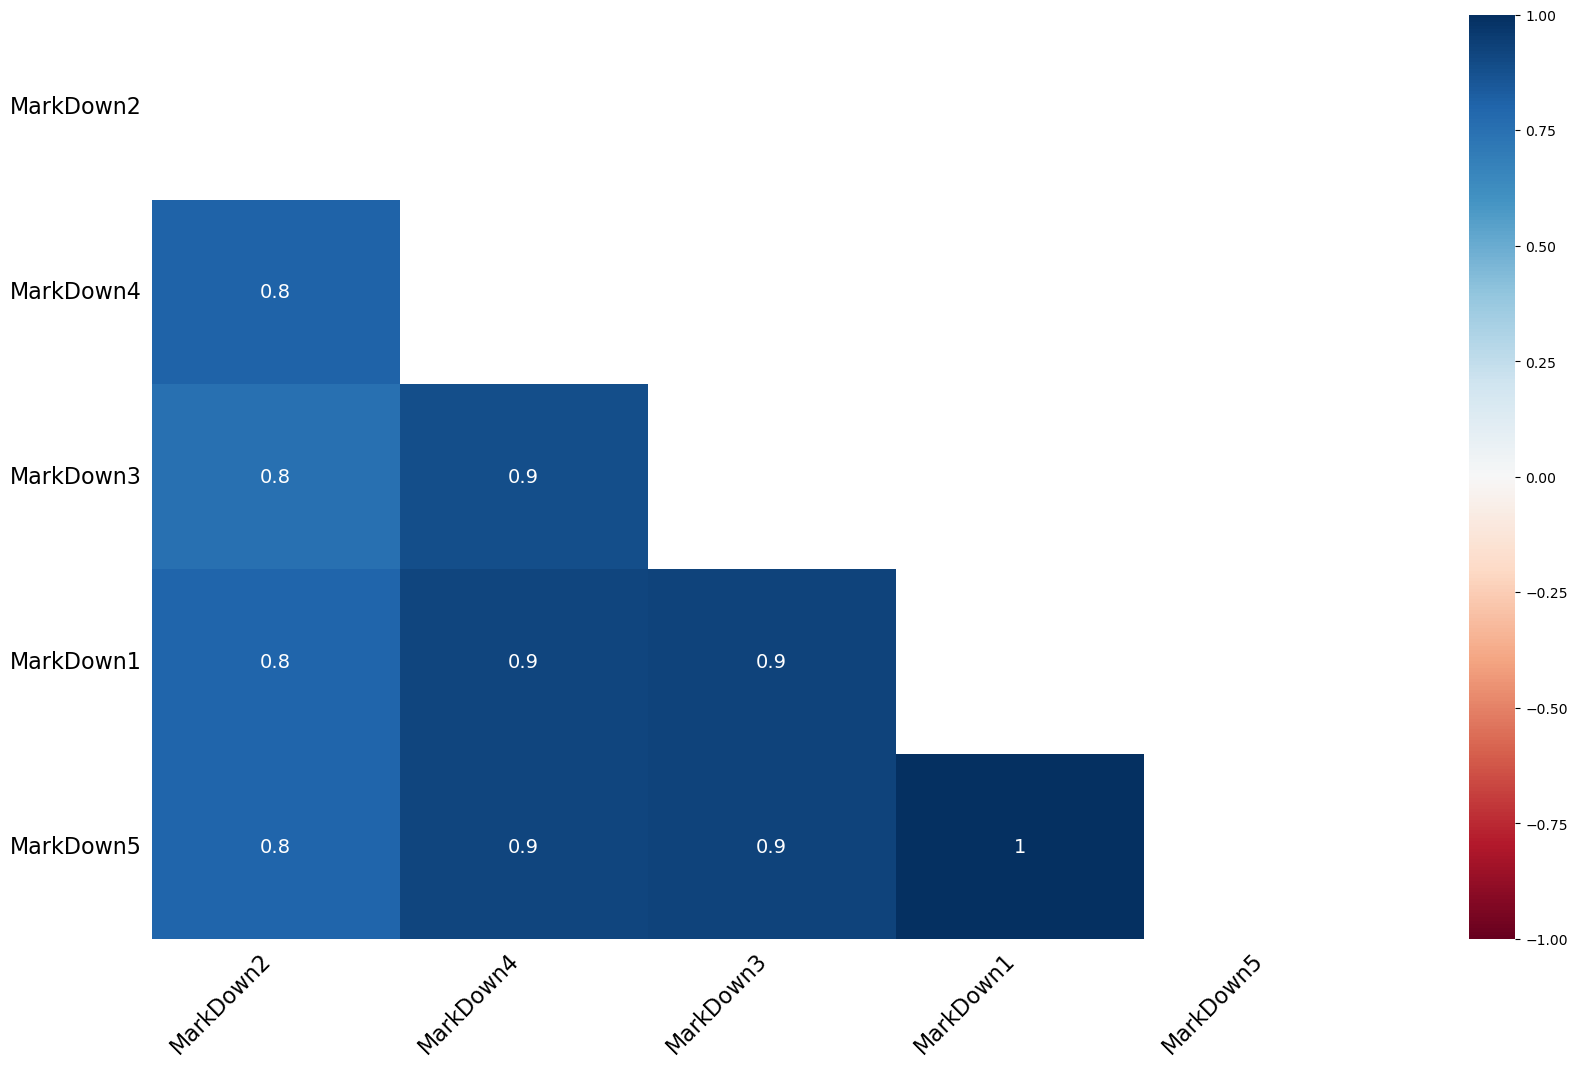

In [23]:
%%time
a = msno.heatmap(dataset, sort='ascending')
a

## Column Types
Let's look at the number of columns of each data type. int64 and float64 are numeric variables (which can be either discrete or continuous). object columns contain strings and are categorical features.

In [24]:
# Number of each type of column
dataset.dtypes.value_counts()

float64           10
int64              9
datetime64[ns]     1
bool               1
dtype: int64

Number of unique classes in each object column

In [25]:
# Number of unique classes in each object column
dataset.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

## Correlations 
Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

.00-.19 “very weak”
.20-.39 “weak”
.40-.59 “moderate”
.60-.79 “strong”
.80-1.0 “very strong”

CPU times: total: 1.33 s
Wall time: 1.36 s


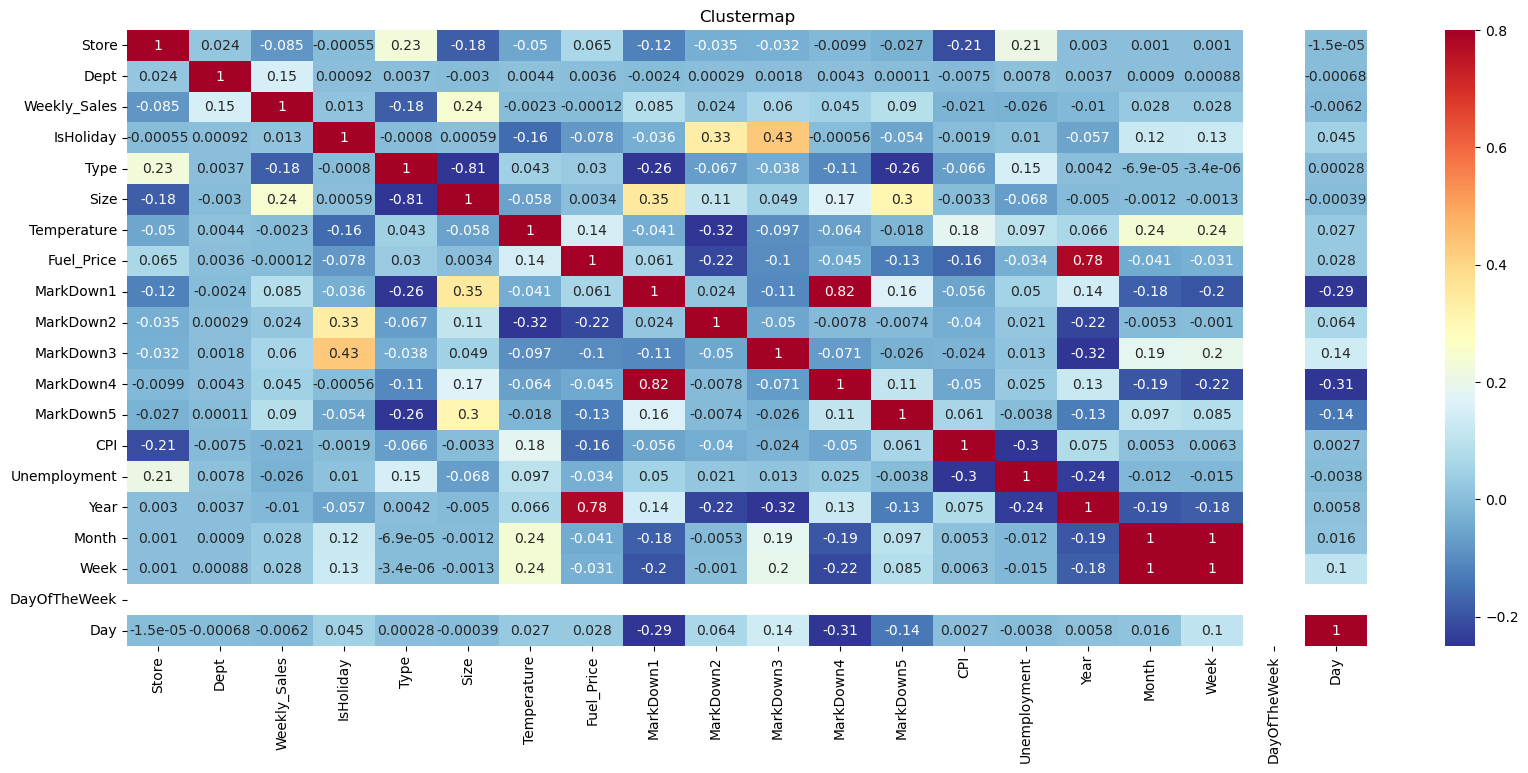

In [26]:
%%time
corrs = dataset.corr()
plt.figure(figsize = (20, 8))
# Heatmap of correlations
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.8)
plt.title('Clustermap');

In [27]:
%%time
features = dataset.columns.values
corrs_ = dataset[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
corrs_ = corrs_[corrs_['level_0'] != corrs_['level_1']]
corrs_.head(15).T

CPU times: total: 812 ms
Wall time: 862 ms


0         1         2         3         4         5   \
level_0      Type      Week       Day     Store      Type     Month   
level_1      Week      Type     Store       Day     Month      Type   
0        0.000003  0.000003  0.000015  0.000015  0.000069  0.000069   

                6          7             8             9         10        11  \
level_0  MarkDown5       Dept    Fuel_Price  Weekly_Sales      Type       Day   
level_1       Dept  MarkDown5  Weekly_Sales    Fuel_Price       Day      Type   
0         0.000109   0.000109       0.00012       0.00012  0.000279  0.000279   

                12         13        14  
level_0  MarkDown2       Dept       Day  
level_1       Dept  MarkDown2      Size  
0          0.00029    0.00029  0.000386

Let's look to the top 15 most correlated features, besides the same feature pairs.



In [28]:
corrs_.tail(15).T

384           385           386           387           388  \
level_0  DayOfTheWeek  DayOfTheWeek  DayOfTheWeek  DayOfTheWeek  DayOfTheWeek   
level_1          Size   Temperature    Fuel_Price     MarkDown1     MarkDown2   
0                 NaN           NaN           NaN           NaN           NaN   

                  389           390           391           392           393  \
level_0  DayOfTheWeek  DayOfTheWeek  DayOfTheWeek  DayOfTheWeek  DayOfTheWeek   
level_1     MarkDown3     MarkDown4     MarkDown5           CPI  Unemployment   
0                 NaN           NaN           NaN           NaN           NaN   

                  394           395           396           398           399  
level_0  DayOfTheWeek  DayOfTheWeek  DayOfTheWeek  DayOfTheWeek           Day  
level_1          Year         Month          Week           Day  DayOfTheWeek  
0                 NaN           NaN           NaN           NaN           NaN

## Feature Selection
Find the optimal feature subset using an evaluation measure. The choice of evaluation metric distinguish the three main strategies of feature selection algorithms: the wrapper strategy, the filter strategy, and the embedded strategy

Filter methods:

information gain
chi-square test
correlation coefficient
variance threshold

Wrapper methods:

recursive feature elimination
sequential feature selection algorithms

Embedded methods:

L1 (LASSO) regularization
decision tree
In our case, we remove some useless, redundant variables. We will use three methods for feature selection: Remove collinear features, remove features with greater than a threshold percentage of missing values, keep only the most relevant features using feature importances from a model

## Remove Collinear Variables

Collinear variables are those which are highly correlated with one another. These can decrease the model's availablility to learn, decrease model interpretability, and decrease generalization performance on the test set.

In [29]:
# Threshold for removing correlated variables
threshold = 0.92

# Absolute value correlation matrix
corr_matrix = dataset.corr().abs()
corr_matrix.head()

Store      Dept  Weekly_Sales  IsHoliday      Type      Size  \
Store         1.000000  0.024004      0.085195   0.000548  0.226410  0.182881   
Dept          0.024004  1.000000      0.148032   0.000916  0.003708  0.002966   
Weekly_Sales  0.085195  0.148032      1.000000   0.012774  0.182242  0.243828   
IsHoliday     0.000548  0.000916      0.012774   1.000000  0.000798  0.000593   
Type          0.226410  0.003708      0.182242   0.000798  1.000000  0.811593   

              Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
Store            0.050097    0.065290   0.119588   0.035173   0.031556   
Dept             0.004437    0.003572   0.002426   0.000290   0.001784   
Weekly_Sales     0.002312    0.000120   0.085251   0.024130   0.060385   
IsHoliday        0.155949    0.078281   0.035586   0.334818   0.427960   
Type             0.042981    0.029687   0.257427   0.067034   0.037560   

              MarkDown4  MarkDown5       CPI  Unemployment      Year  \
Store          0.009941   0.026634  0.211088      0.208552  0.002997   
Dept           0.004257   0.000109  0.007477      0.007837  0.003738   
Weekly_Sales   0.045414   0.090362  0.020921      0.025864  0.010111   
IsHoliday      0.000562   0.053719  0.001944      0.010460  0.056746   
Type           0.108991   0.258835  0.065812      0.148720  0.004208   

                 Month      Week  DayOfTheWeek       Day  
Store         0.001011  0.001031           NaN  0.000015  
Dept          0.000904  0.000882           NaN  0.000678  
Weekly_Sales  0.028409  0.027673           NaN  0.006187  
IsHoliday     0.123376  0.128184           NaN  0.045465  
Type          0.000069  0.000003           NaN  0.000279

In [30]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

Store      Dept  Weekly_Sales  IsHoliday      Type      Size  \
Store           NaN  0.024004      0.085195   0.000548  0.226410  0.182881   
Dept            NaN       NaN      0.148032   0.000916  0.003708  0.002966   
Weekly_Sales    NaN       NaN           NaN   0.012774  0.182242  0.243828   
IsHoliday       NaN       NaN           NaN        NaN  0.000798  0.000593   
Type            NaN       NaN           NaN        NaN       NaN  0.811593   

              Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
Store            0.050097    0.065290   0.119588   0.035173   0.031556   
Dept             0.004437    0.003572   0.002426   0.000290   0.001784   
Weekly_Sales     0.002312    0.000120   0.085251   0.024130   0.060385   
IsHoliday        0.155949    0.078281   0.035586   0.334818   0.427960   
Type             0.042981    0.029687   0.257427   0.067034   0.037560   

              MarkDown4  MarkDown5       CPI  Unemployment      Year  \
Store          0.009941   0.026634  0.211088      0.208552  0.002997   
Dept           0.004257   0.000109  0.007477      0.007837  0.003738   
Weekly_Sales   0.045414   0.090362  0.020921      0.025864  0.010111   
IsHoliday      0.000562   0.053719  0.001944      0.010460  0.056746   
Type           0.108991   0.258835  0.065812      0.148720  0.004208   

                 Month      Week  DayOfTheWeek       Day  
Store         0.001011  0.001031           NaN  0.000015  
Dept          0.000904  0.000882           NaN  0.000678  
Weekly_Sales  0.028409  0.027673           NaN  0.006187  
IsHoliday     0.123376  0.128184           NaN  0.045465  
Type          0.000069  0.000003           NaN  0.000279

Select columns with correlations above threshold

In [31]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
dataset = dataset.drop(columns = to_drop)
print('Data shape: ', dataset.shape)
print('Size of the data', dataset.shape)

There are 1 columns to remove.
Data shape:  (421570, 20)
Size of the data (421570, 20)


Apply this on the entire dataset results in 64 collinear features removed.

In [32]:
to_drop

['Week']

## Removing Missing Values
In this implementation, if any columns have greater than 85% missing values, they will be removed.

In [33]:
## Dataset missing values (in percent)
dataset_missing = (dataset.isnull().sum() / len(dataset)).sort_values(ascending = False)
dataset_missing.head()

MarkDown2    0.736110
MarkDown4    0.679847
MarkDown3    0.674808
MarkDown1    0.642572
MarkDown5    0.640790
dtype: float64

In [34]:
# Identify missing values above threshold
dataset_missing_ = dataset_missing.index[dataset_missing > 0.90]

all_missing = list(set(dataset_missing_))
print('There are %d columns with more than 90%% missing values' % len(all_missing))
dataset = dataset.drop(columns = all_missing)
print('Data shape: ', dataset.shape)

There are 0 columns with more than 90% missing values
Data shape:  (421570, 20)


## Outlier Analysis

The day of the week with Monday=0, Sunday=6.

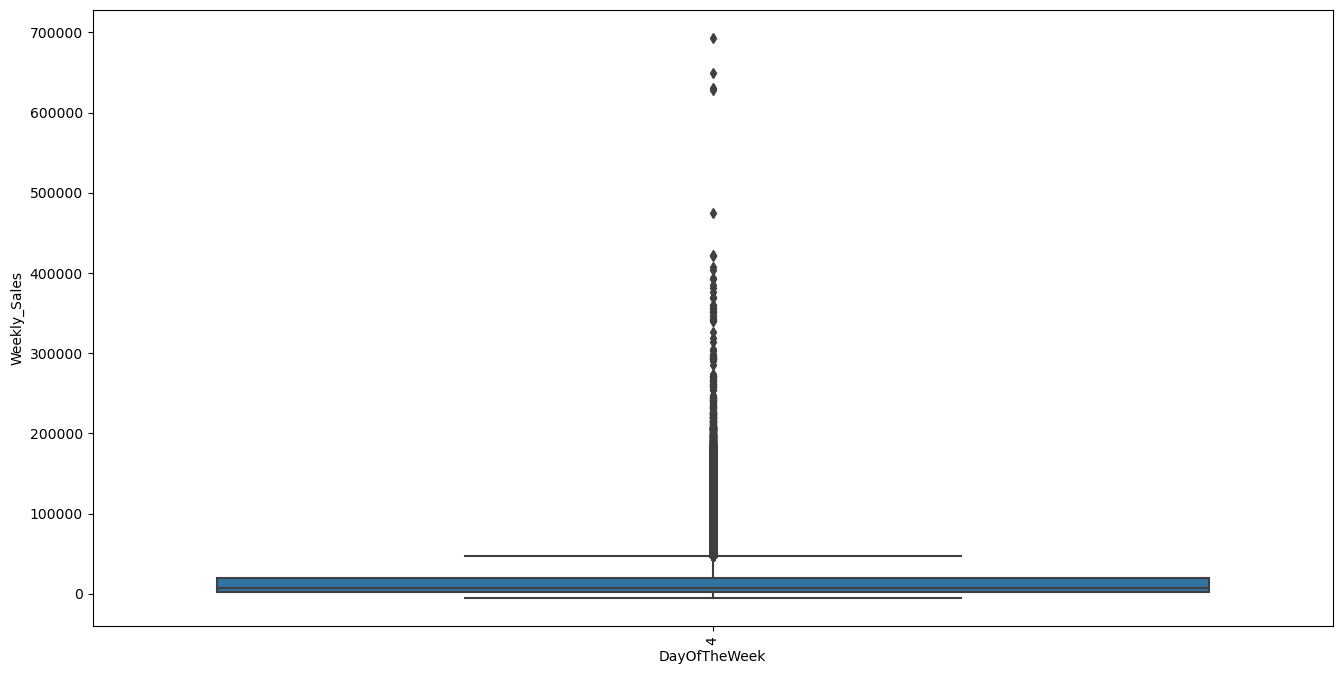

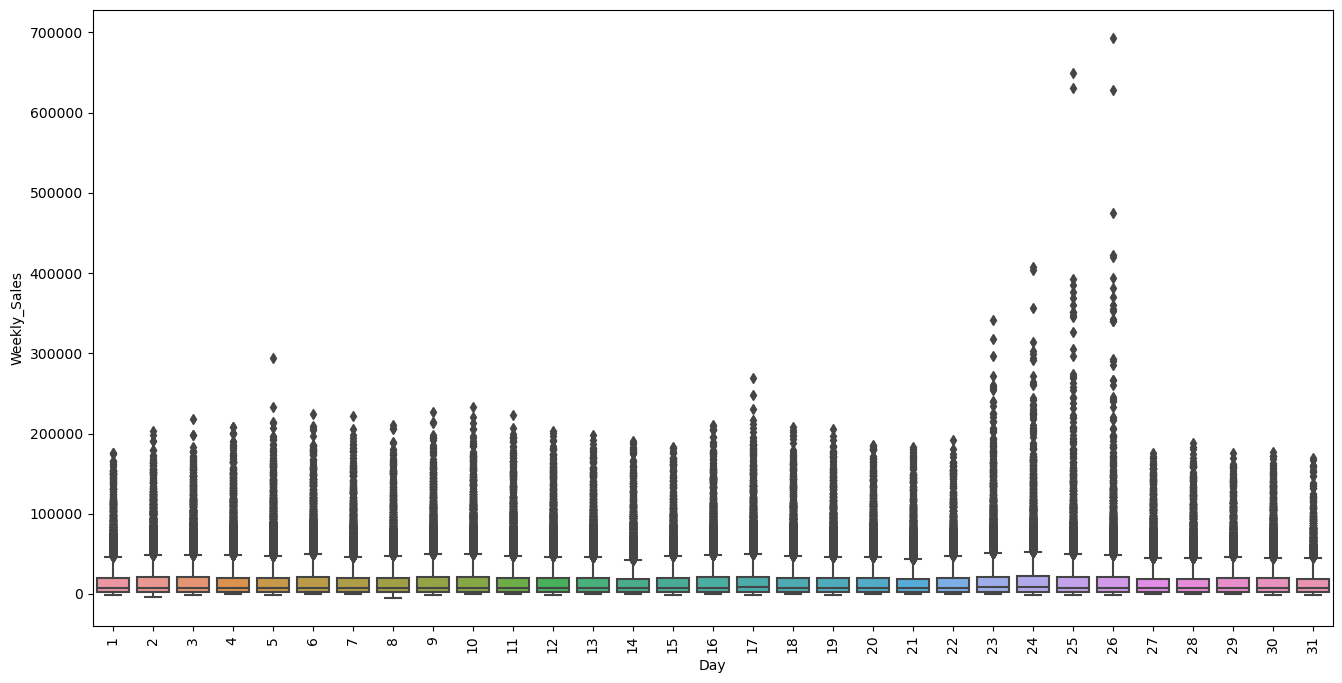

In [35]:
def box_plot_dist_var(var):
#     var = 'DayOfTheWeek'
    data_ = pd.concat([dataset['Weekly_Sales'], dataset[var]], axis=1)
    f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=var, y="Weekly_Sales", data=data_)
    plt.xticks(rotation=90);

box_plot_dist_var("DayOfTheWeek")        
box_plot_dist_var("Day")    

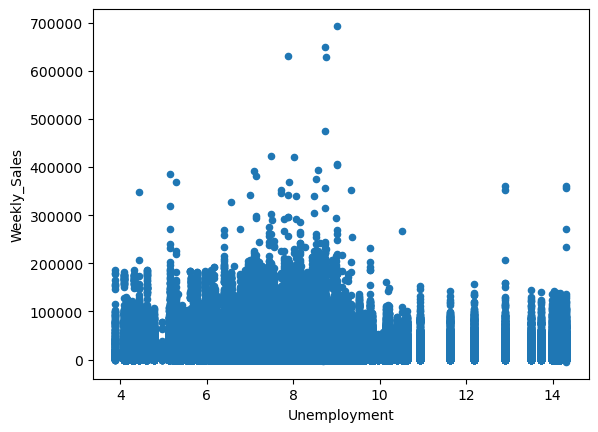

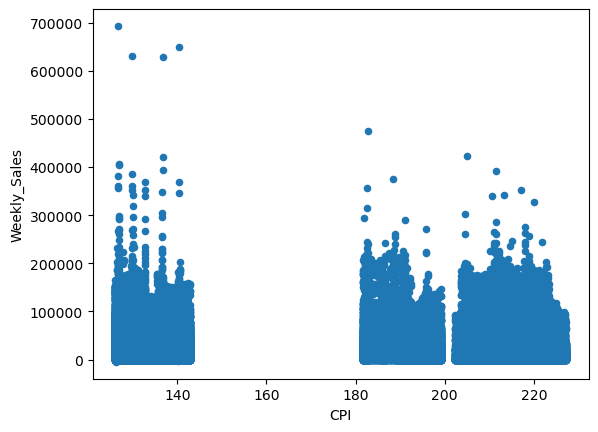

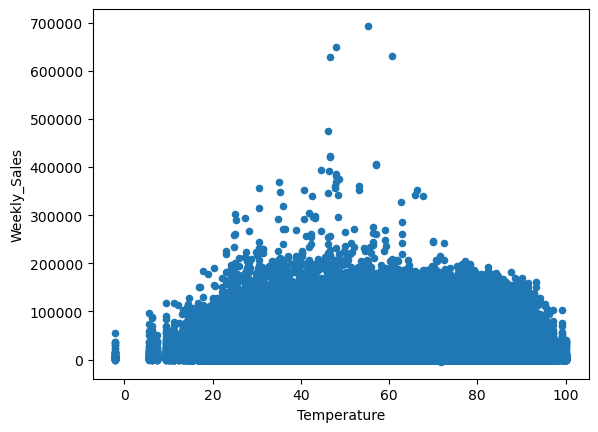

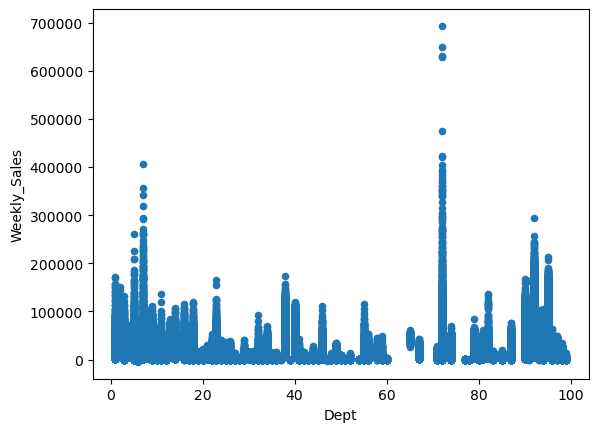

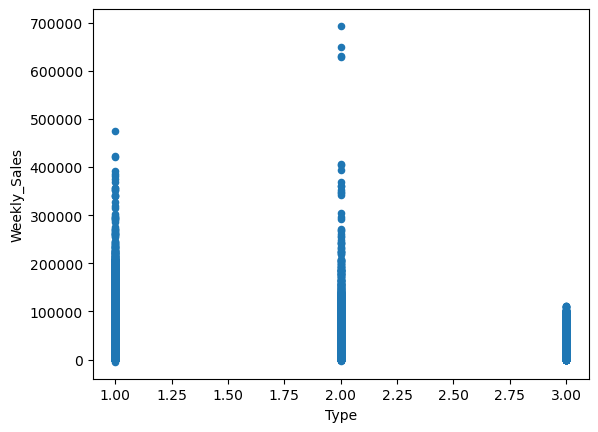

In [36]:
def scatter_plot_var(var):
    data = pd.concat([dataset['Weekly_Sales'],dataset[var] ], axis=1)
    data.plot.scatter(x=var, y='Weekly_Sales')
scatter_plot_var("Unemployment")
scatter_plot_var("CPI")
scatter_plot_var("Temperature")
scatter_plot_var("Dept")
scatter_plot_var("Type")

The type 2 have more extreme values,as well as Dept 70, Temperature 50-60.

So, we'll define the extreme values for week sales>=4000000 and see some distributions, peaks in time series

In [37]:
d_low = dataset[dataset['Weekly_Sales'] < 300000]
d_high = dataset[dataset['Weekly_Sales'] >= 300000]
dataset ['Weekly_Sales_low_high'] = np.where(  dataset['Weekly_Sales']<300000, 0, 1)

In [38]:
def cat_feat_ploting(df, col):
    tmp = pd.crosstab(df[col], df['Weekly_Sales_low_high'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'inline', 1:'Weekly_Sales Low High'}, inplace=True)

    plt.figure(figsize=(14,10))
    plt.suptitle(f'{col} Distributions', fontsize=22)

    plt.subplot(221)
    g = sns.countplot(x=col, data=df, order=tmp[col].values)

    g.set_title(f"{col} Distribution", fontsize=19)
    g.set_xlabel(f"{col} Name", fontsize=17)
    g.set_ylabel("Count", fontsize=17)
    # g.set_ylim(0,500000)
    total = df.shape[0] # arbitrary
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=14) 
    plt.subplot(222)
    g1 = sns.countplot(x=col, hue='Weekly_Sales_low_high', data=df, order=tmp[col].values)
    plt.legend(title='Weekly_Sales Low High', loc='best', labels=['no', 'yes'])
    gt = g1.twinx()
    gt = sns.pointplot(x=col, y='Weekly_Sales Low High', data=tmp, color='black', order=tmp[col].values, legend=False)
    gt.set_ylabel("% of Weekly_Sales_low_high", fontsize=16)

    g1.set_title(f"{col} by Target(Weekly_Sales_low_high)", fontsize=19)
    g1.set_xlabel(f"{col} Name", fontsize=17)
    g1.set_ylabel("Count", fontsize=17)

    plt.subplots_adjust(hspace = 0.4, top = 0.85)

    plt.show()

Ploting columns with few unique values

TypeError: pointplot() got an unexpected keyword argument 'legend'

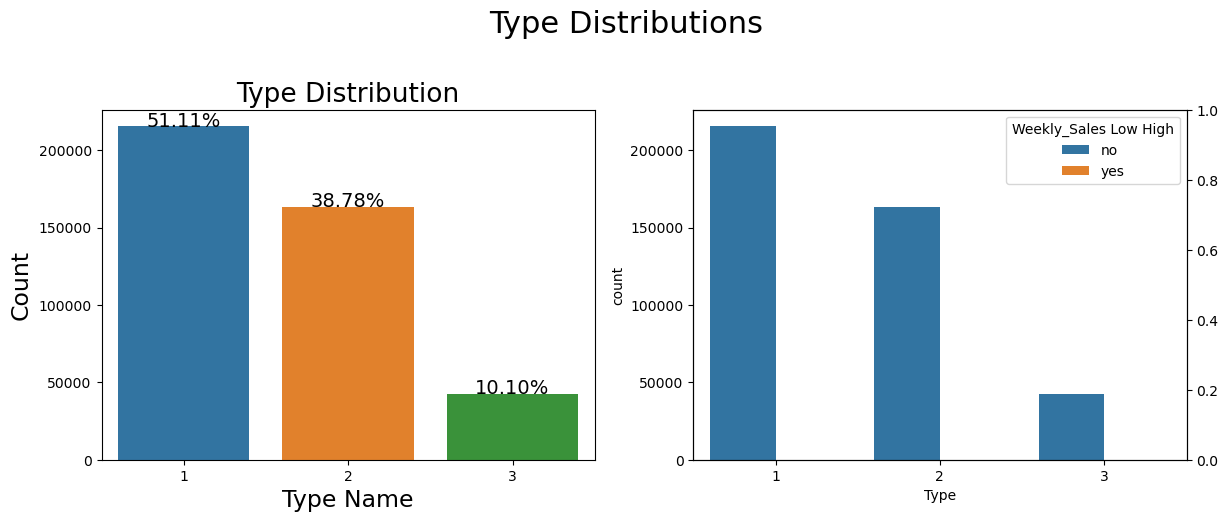

In [39]:
for col in ['Type']:
    dataset[col] = dataset[col].fillna('NaN')
    cat_feat_ploting(dataset, col)

In [40]:
def plot_target_dist(df):
    total = len(df)
    g = sns.countplot(x='Weekly_Sales_low_high', data=df, )
    g.set_title("Weekly Sales  Distribution \n# 0: Low | 1: High #", fontsize=22)
    g.set_ylabel('Count', fontsize=18)
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=15) 

def ts_target_lowhigh(df, roh):
    plt.figure(figsize=(16,6))
    df_features = df.sort_index()
    df_low = df_features[df_features['Weekly_Sales'] < roh]['Weekly_Sales']
    df_high = df_features[df_features['Weekly_Sales'] >= roh]['Weekly_Sales']
    plt.plot(df_features['Weekly_Sales'].index, df_features['Weekly_Sales'].fillna(1), c='gray', alpha=0.4)
    plt.scatter(df_low.index, df_low.values, label='LOW', s=10)
    plt.scatter(df_high.index, df_high.values, label='HIGH', c='red', s=10)
    plt.margins(x=0.01,y=0.2)
    plt.title('Weekly_Sales')
    plt.xlabel('Date')
    plt.legend()
    plt.show()

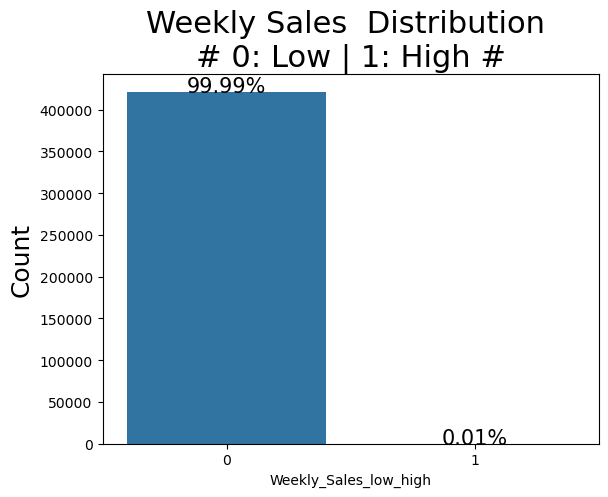

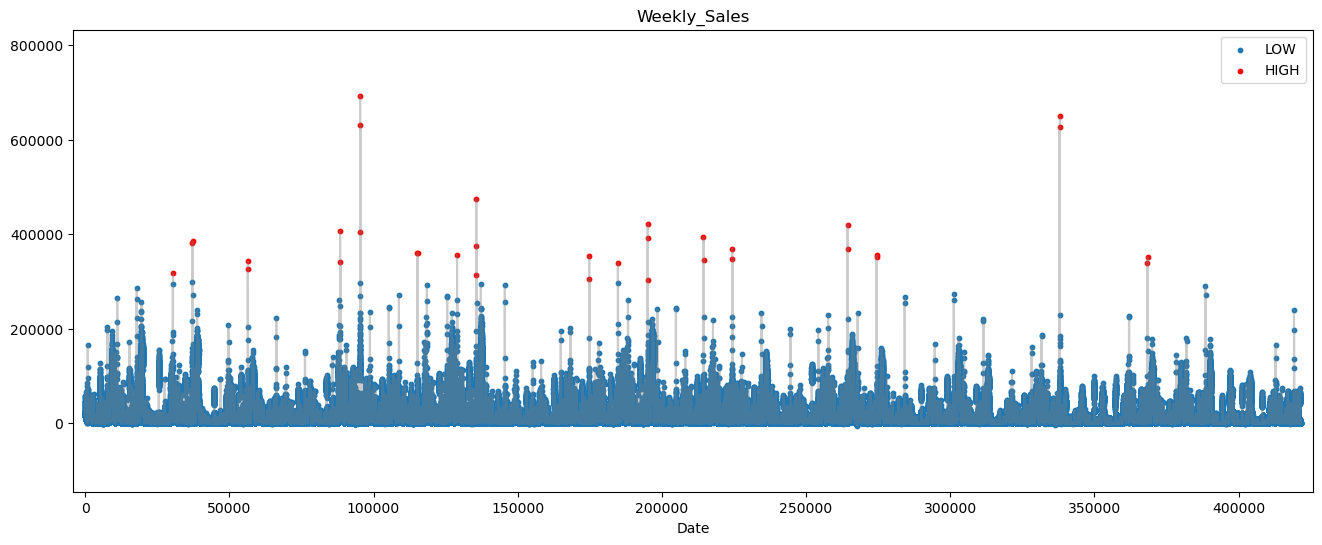

In [41]:
plot_target_dist(dataset)     
ts_target_lowhigh(dataset, 300000)

In [42]:
#pip install change_finder

In [43]:
import change_finder 

def changeFinder(data, r, smooth):
    #CHANGEFINDER PACKAGE
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(13,8))
    f.subplots_adjust(hspace=0.4)
    ax1.plot(data)
    ax1.set_title("data count")
    #Initiate changefinder function
    cf = change_finder.ChangeFinder(r=r, k=2, T=smooth, R=2)
    scores = [cf.update(p) for p in data]
    ax2.plot(scores)
    ax2.set_title("Anomaly Score for week")
    plt.show()
    return scores

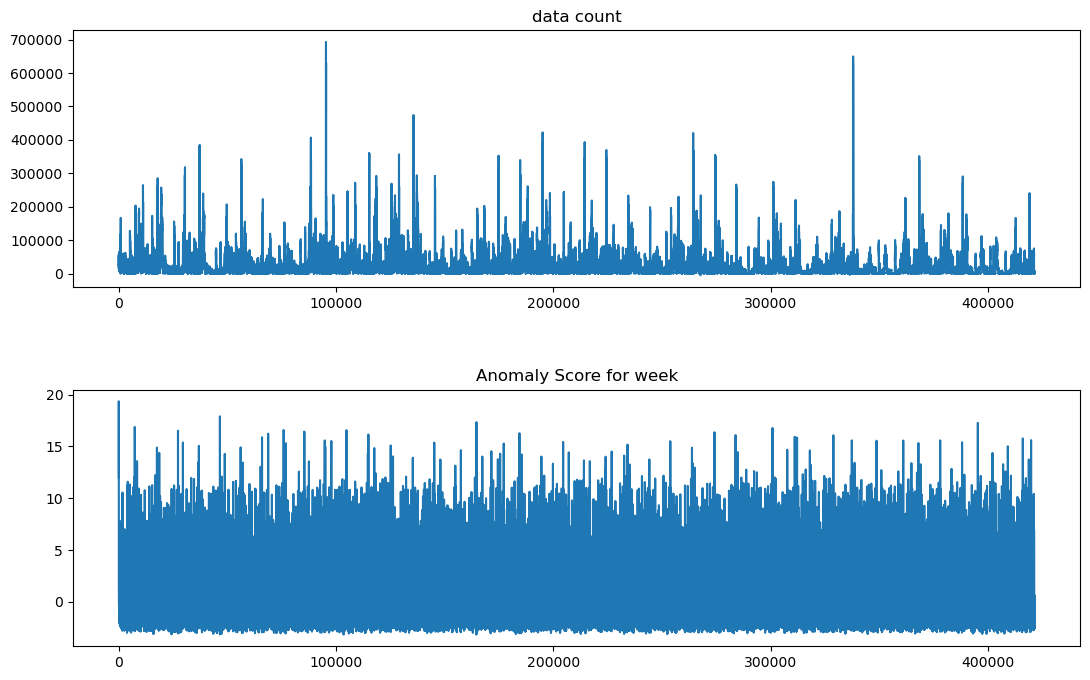

In [44]:
datacf = dataset.Weekly_Sales.values
dataplot1 = changeFinder(datacf, r=0.02, smooth=30)

## Identifying Week Sales Peaks with Change Finger

In [45]:
dataSF = np.array(dataplot1)
from scipy import stats
describedataSF = stats.describe(dataSF)
describedataSF

DescribeResult(nobs=421570, minmax=(-3.173127125279841, 19.365457350580986), mean=-1.543899048557325, variance=1.679135303009054, skewness=4.737637321095544, kurtosis=33.31400063949468)

In [46]:
qt25 = np.percentile(dataSF, 25)  # Q1
qt50 = np.percentile(dataSF, 50)  # Q2
qt60 = np.percentile(dataSF, 60)  # Q31
qt75 = np.percentile(dataSF, 75)  # Q3
qt95 = np.percentile(dataSF, 95)

qt75_ws = np.percentile(datacf, 75)
qt95_ws = np.percentile(datacf, 95)

In [47]:
dfSF = pd.DataFrame(dataSF, columns=['Score_CF'])
dfSF.head()

Score_CF
0  12.034480
1  19.365457
2  10.200971
3   5.245432
4   4.529351

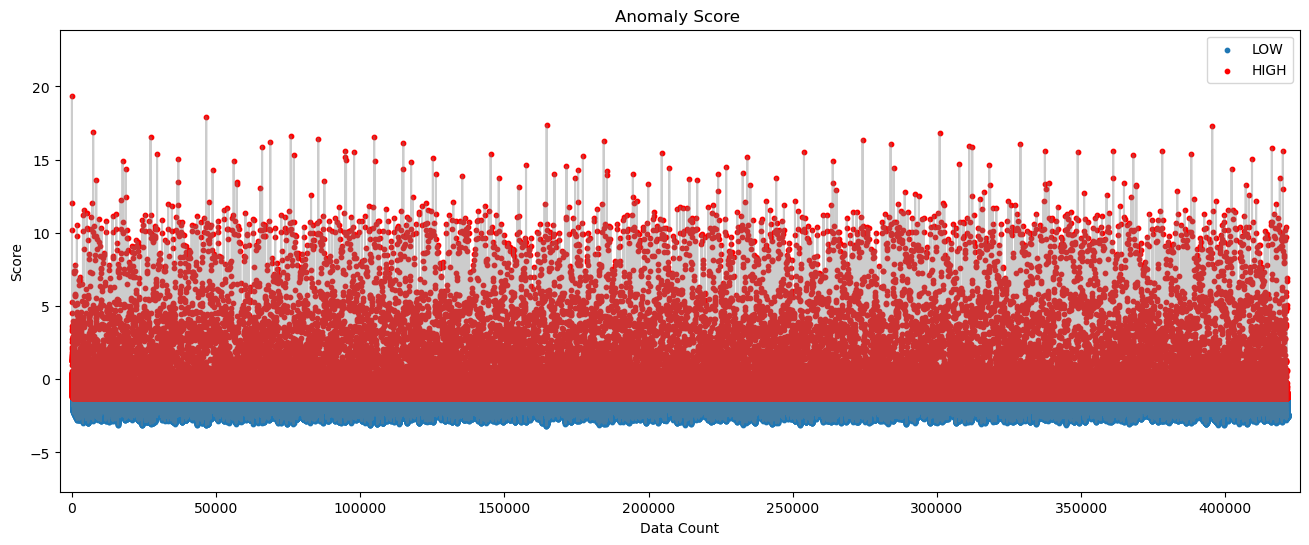

In [48]:
plt.figure(figsize=(16,6))
df_high_data_ = dfSF[dfSF <= qt75]
df_high_score_ = dfSF[dfSF > qt75]
plt.plot(dfSF.index, dfSF.Score_CF.fillna(1), c='gray', alpha=0.4)
plt.scatter(df_high_data_.index, df_high_data_.values, label='LOW', s=10)
plt.scatter(df_high_score_.index, df_high_score_.values, label='HIGH', c='red', s=10)
plt.margins(x=0.01,y=0.2)
plt.title('Anomaly Score ')
plt.ylabel('Score')
plt.xlabel('Data Count')
plt.legend()
plt.show()

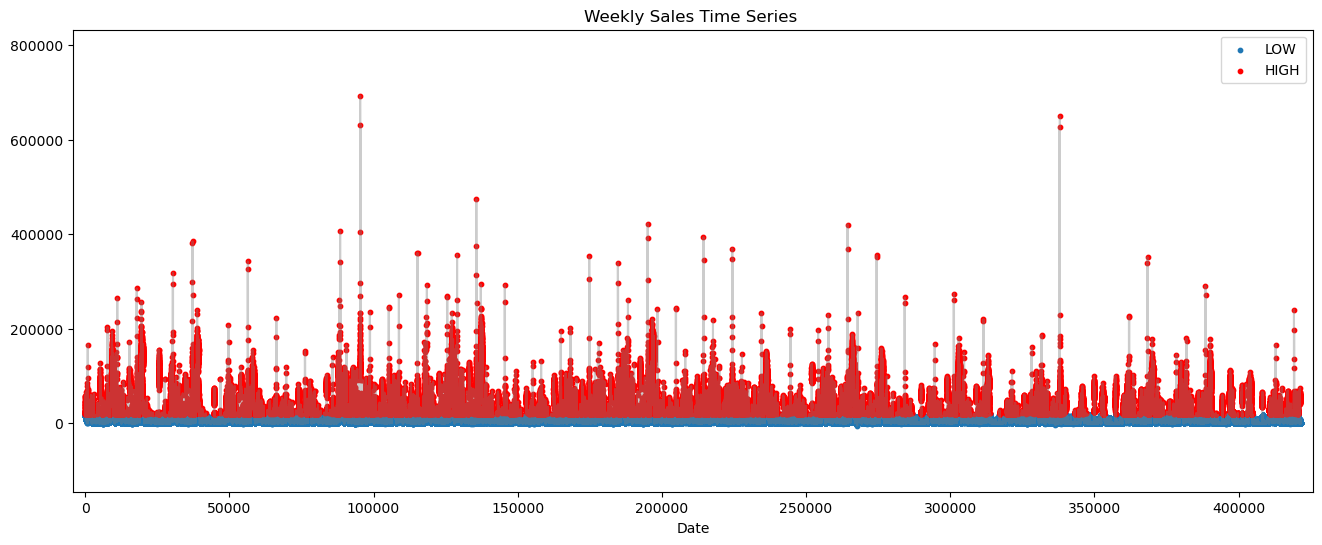

In [49]:
plt.figure(figsize=(16,6))
df_features = dataset.sort_index()
df_high_data = df_features[df_features['Weekly_Sales'] < qt75_ws]['Weekly_Sales']
df_high_score = df_features[df_features['Weekly_Sales'] >= qt75_ws]['Weekly_Sales']
plt.plot(df_features['Weekly_Sales'].index, df_features['Weekly_Sales'].fillna(1), c='gray', alpha=0.4)
plt.scatter(df_high_data.index, df_high_data.values, label='LOW', s=10)
plt.scatter(df_high_score.index, df_high_score.values, label='HIGH', c='red', s=10)
plt.margins(x=0.01,y=0.2)
plt.title('Weekly Sales Time Series ')
plt.xlabel('Date')
plt.legend()
plt.show()

# Visualizations
plot distribution curves for train and test data

In [50]:
def plot_dist_col(column):
    '''plot dist curves for train and test weather data for the given column name'''
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.distplot(dataset[column].dropna(), color='green', ax=ax).set_title(column, fontsize=16)
    sns.distplot(dataset_test[column].dropna(), color='purple', ax=ax).set_title(column, fontsize=16)
    plt.xlabel(column, fontsize=15)
    plt.legend(['train', 'test'])
    plt.show()

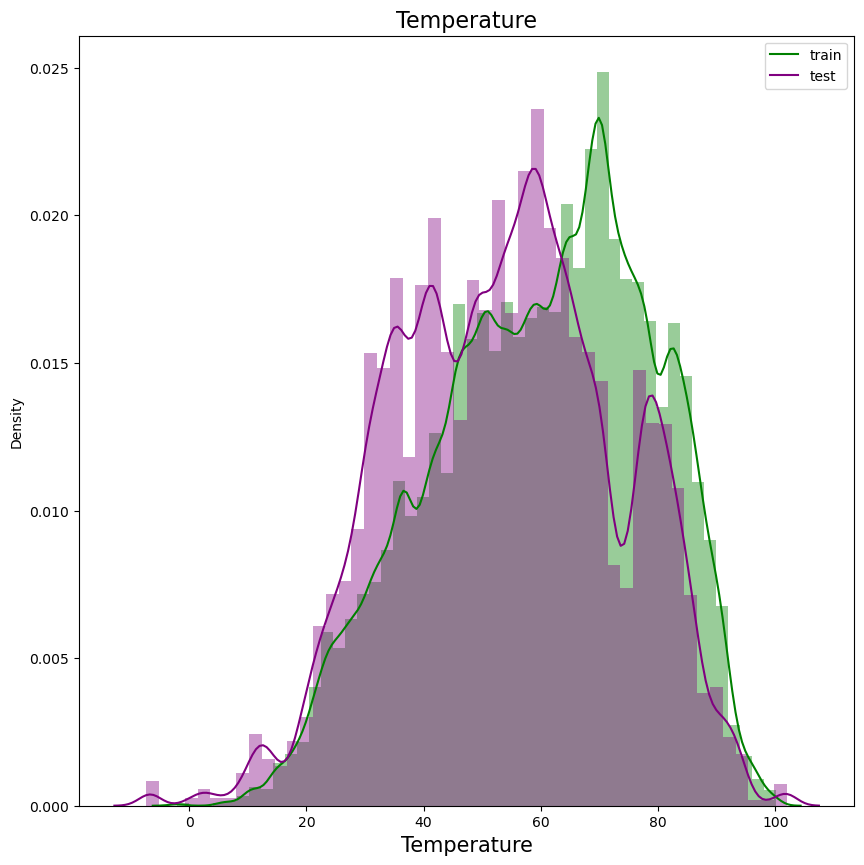

In [51]:
plot_dist_col('Temperature')

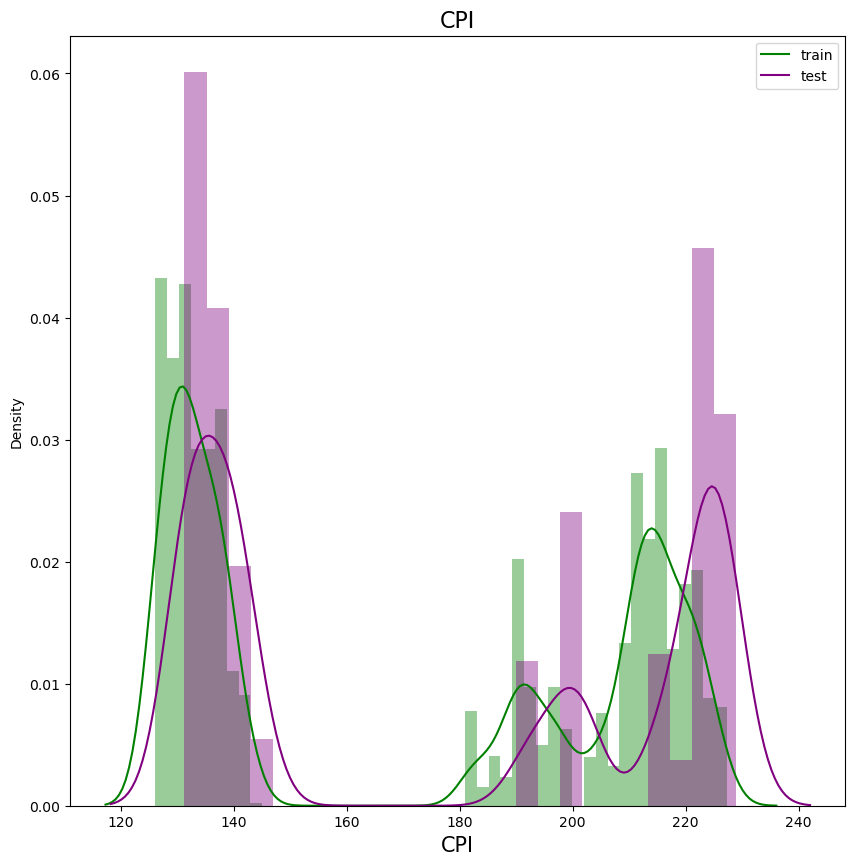

In [52]:
plot_dist_col('CPI')

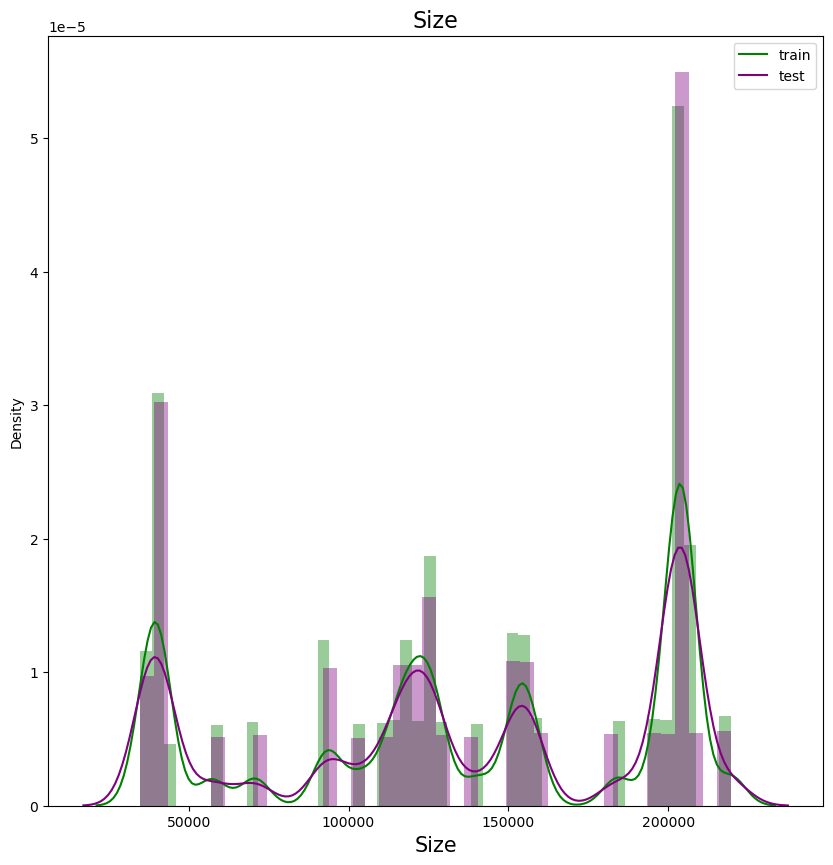

In [53]:
plot_dist_col('Size')

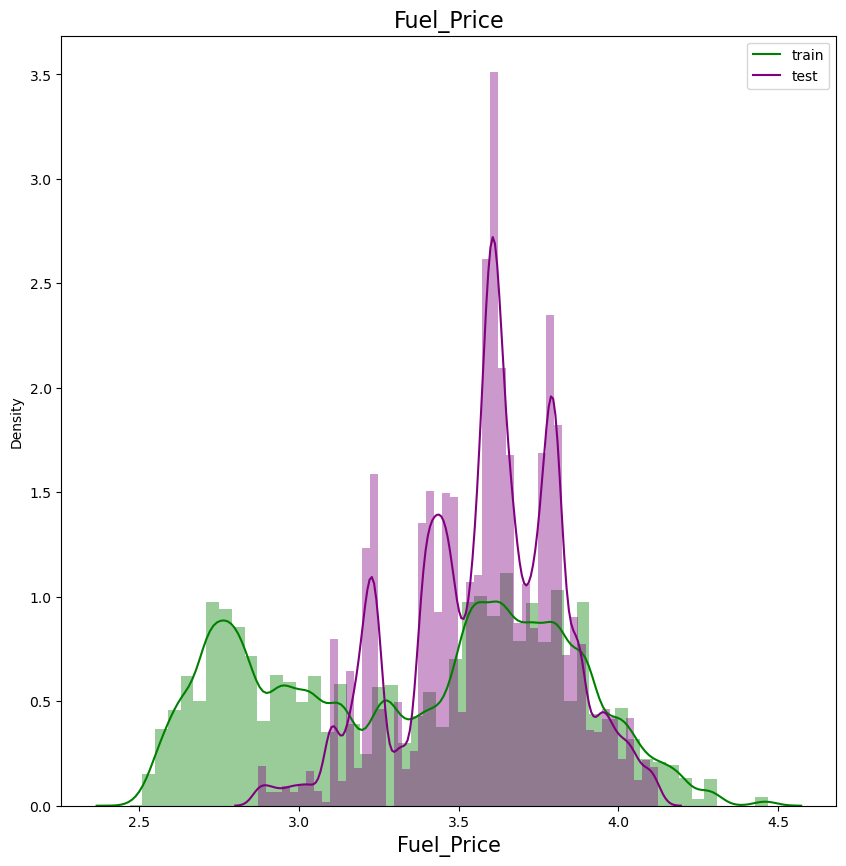

In [54]:
plot_dist_col('Fuel_Price')

The Fuel Price for train, test have differrent distributions

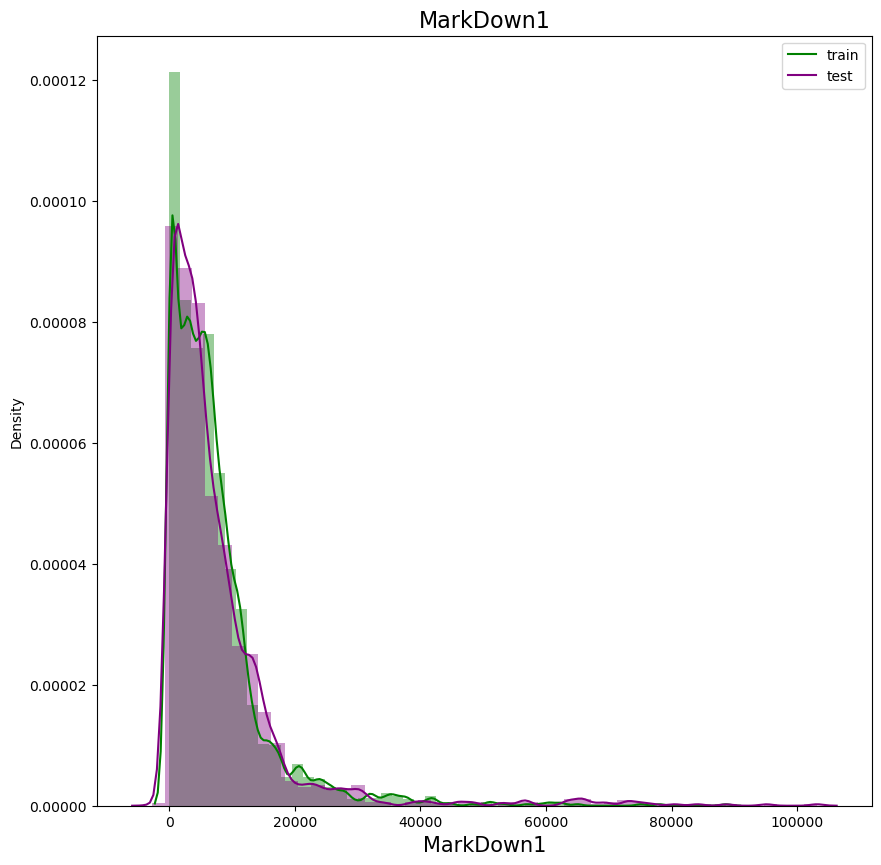

In [55]:
plot_dist_col('MarkDown1')

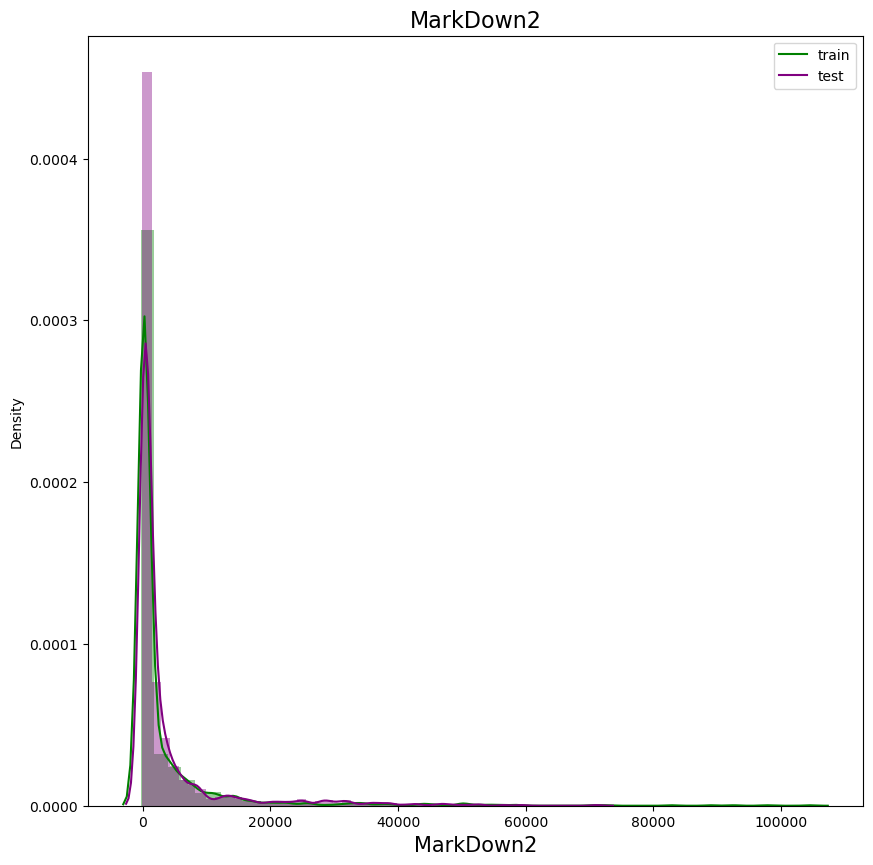

In [56]:
plot_dist_col('MarkDown2')

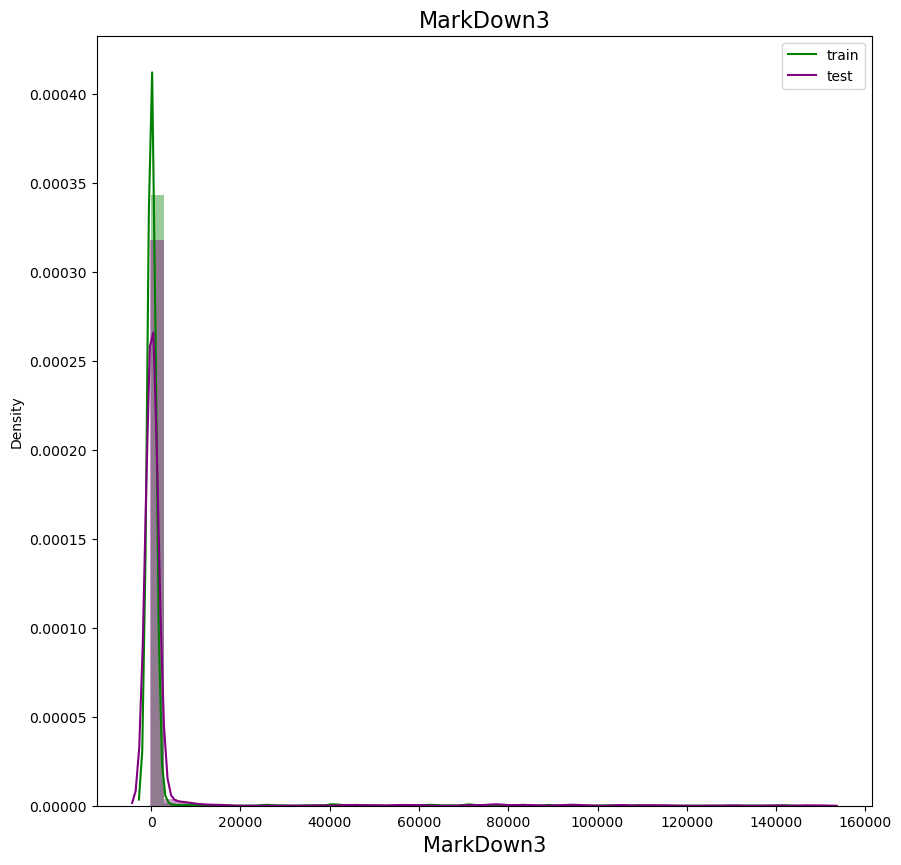

In [57]:
plot_dist_col('MarkDown3')

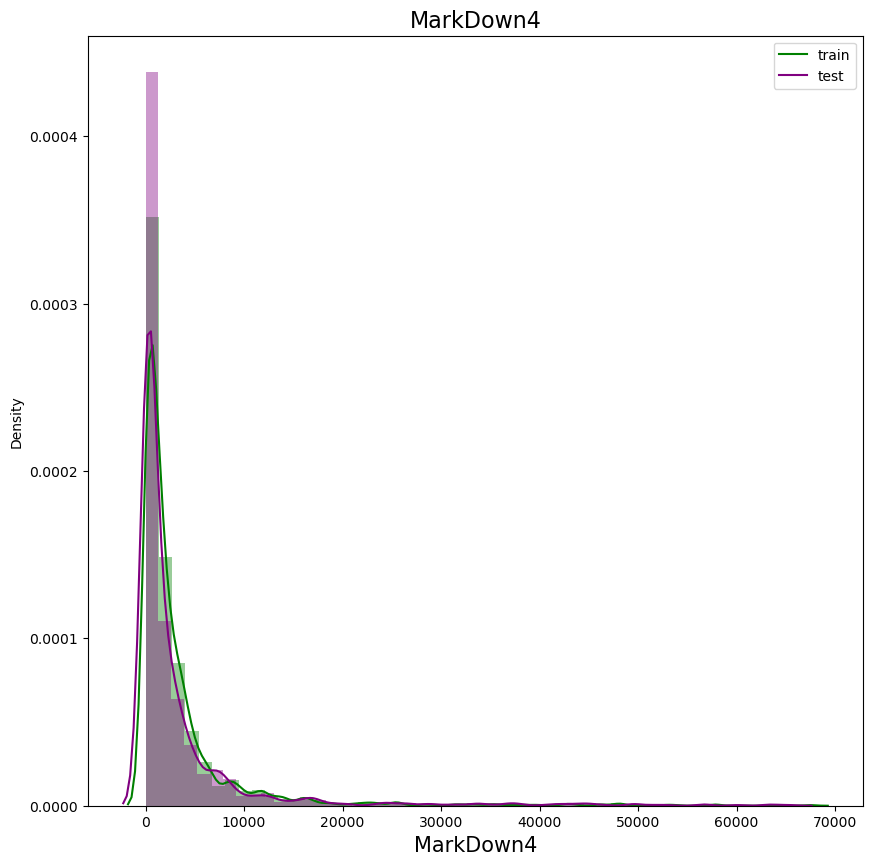

In [58]:
plot_dist_col('MarkDown4')

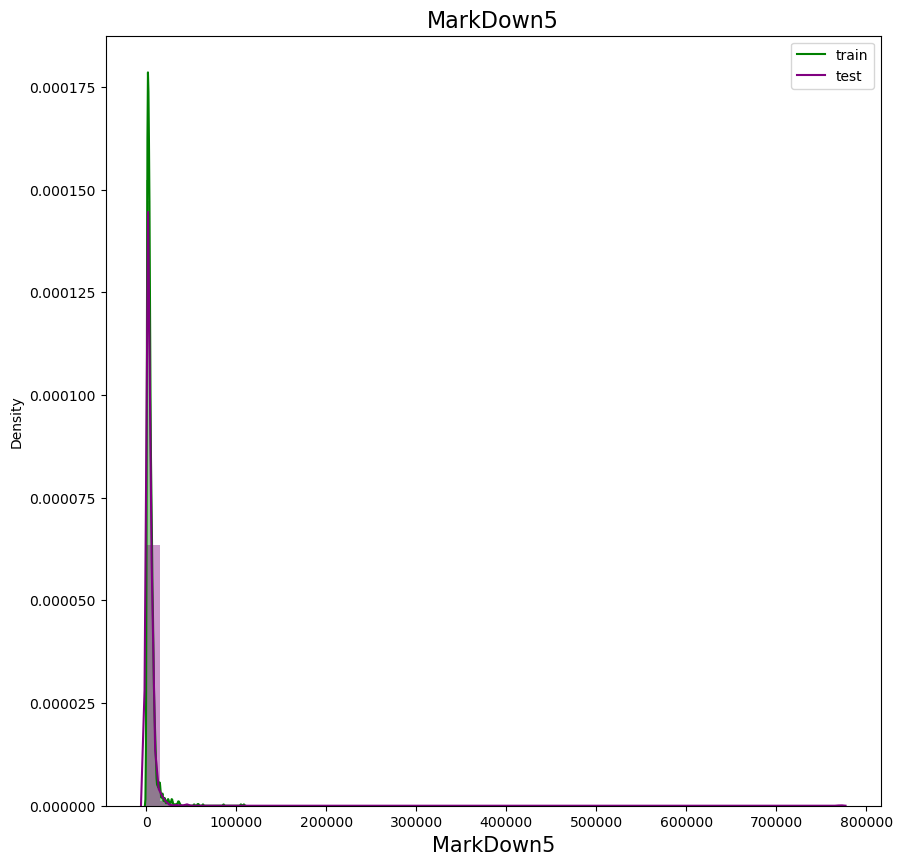

In [59]:
plot_dist_col('MarkDown5')

Plot peaks sales for each Dept.

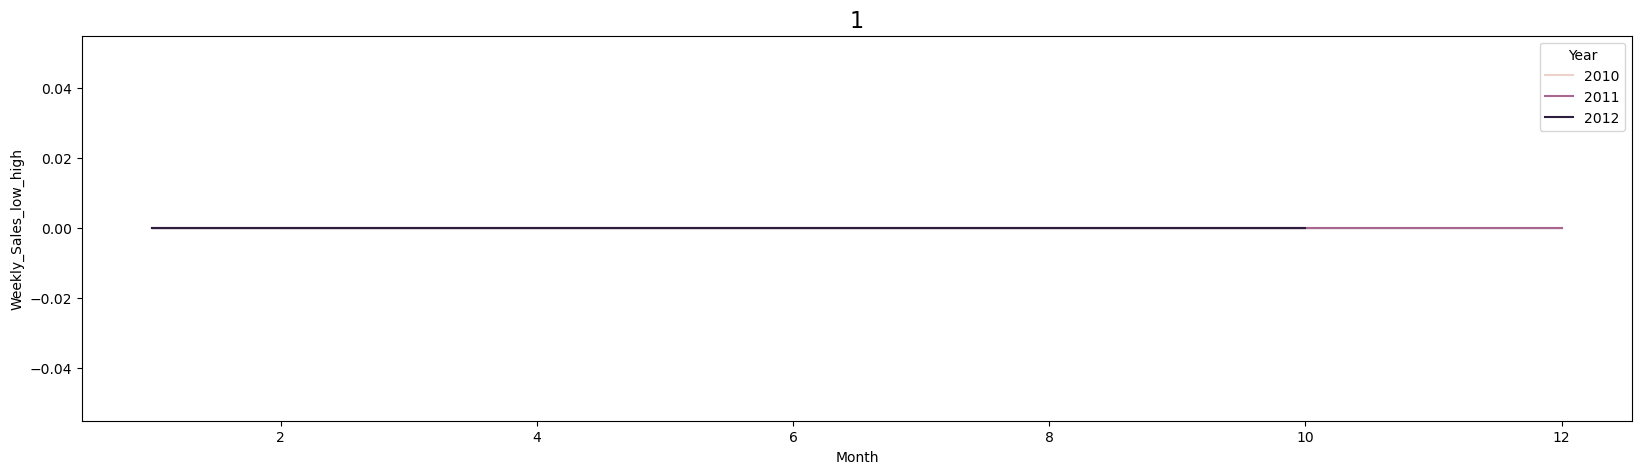

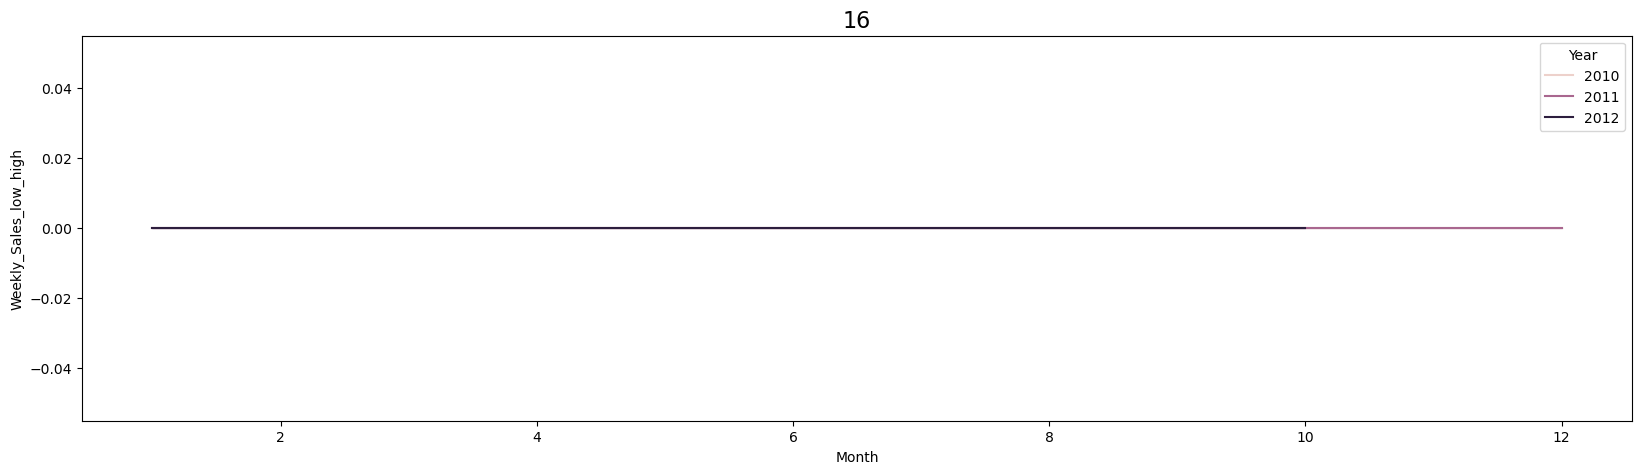

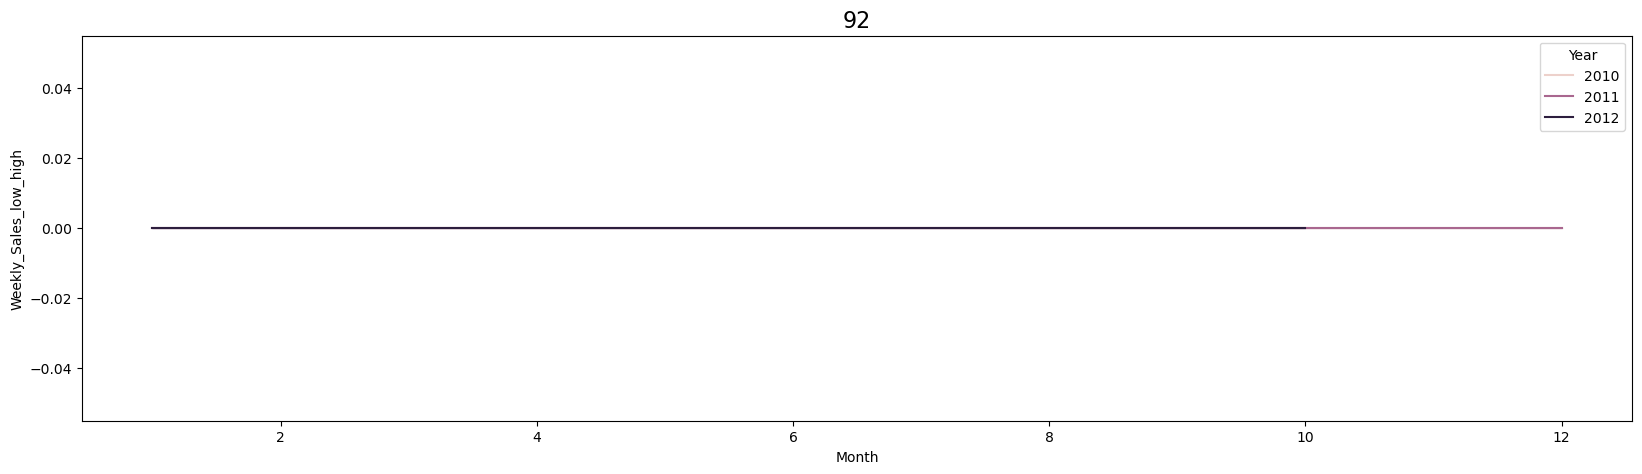

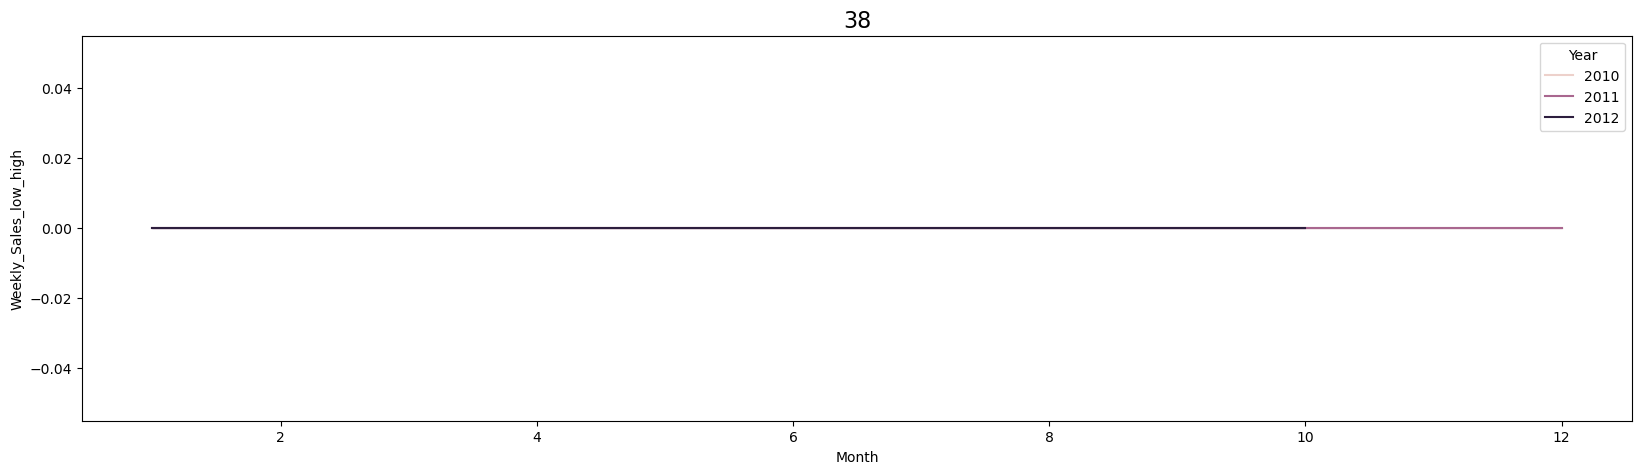

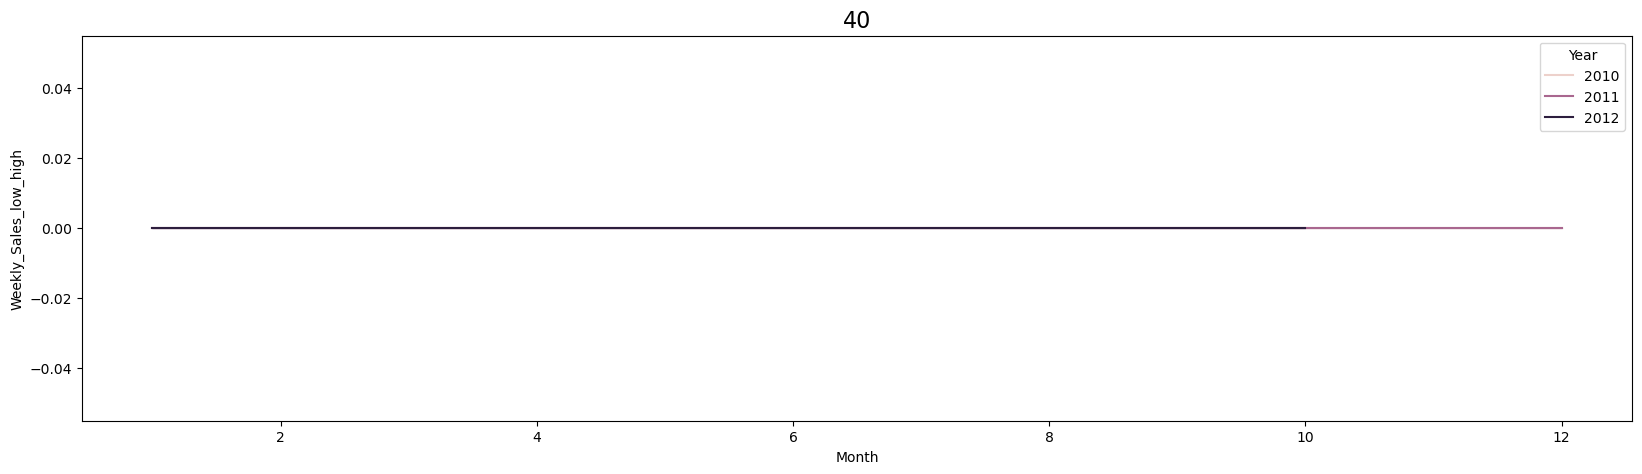

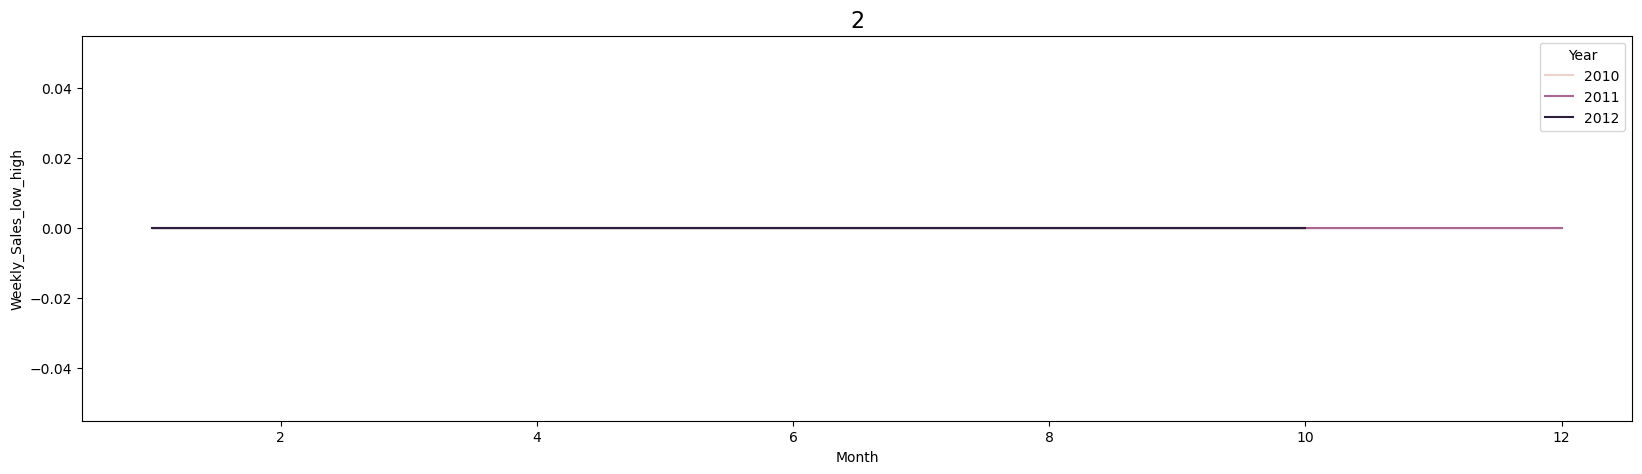

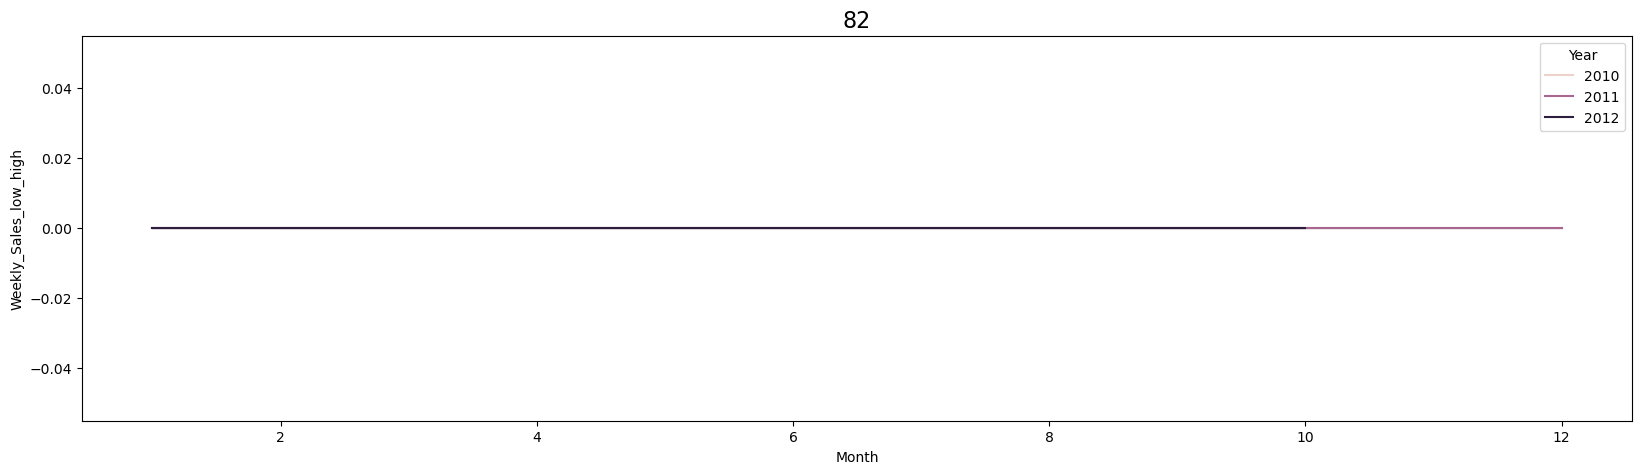

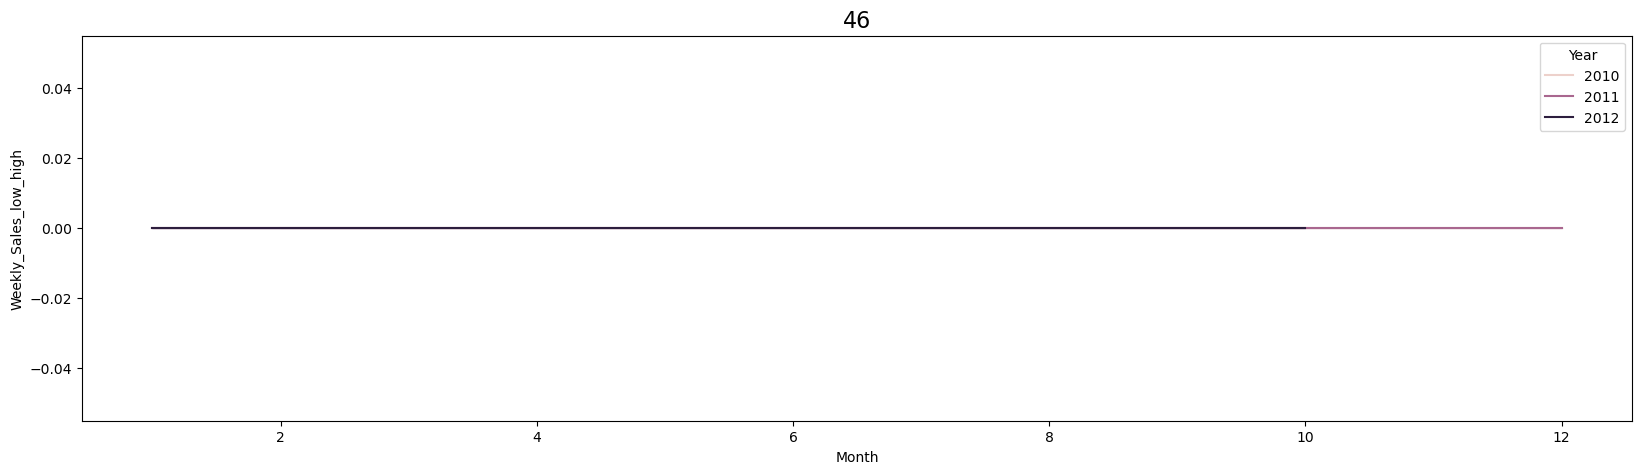

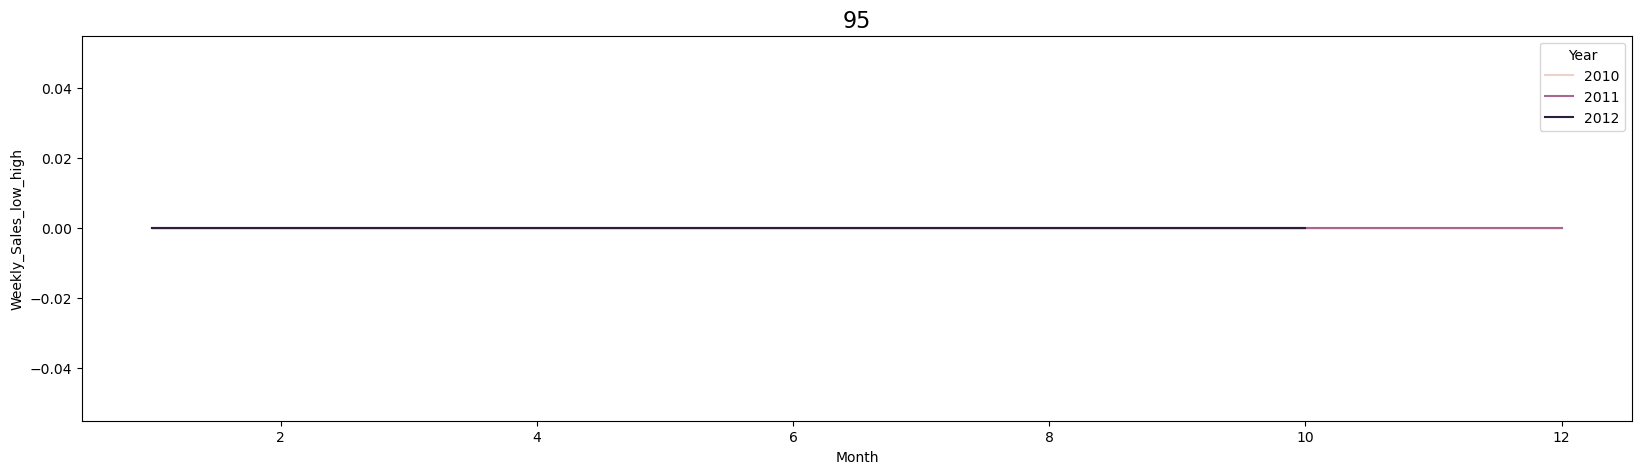

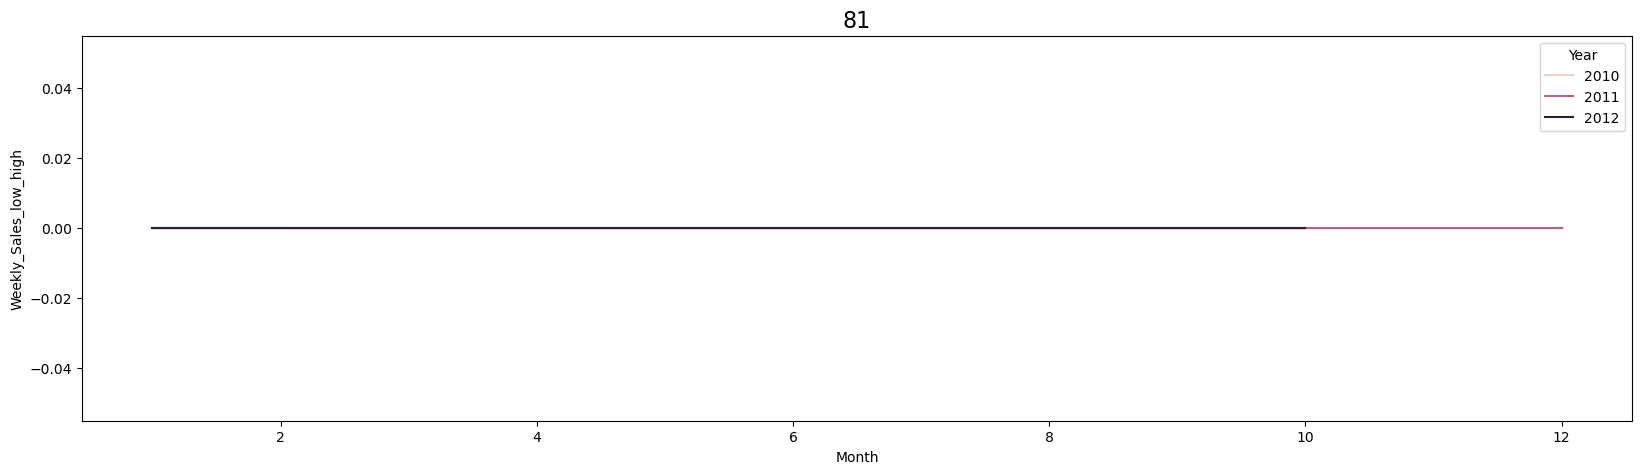

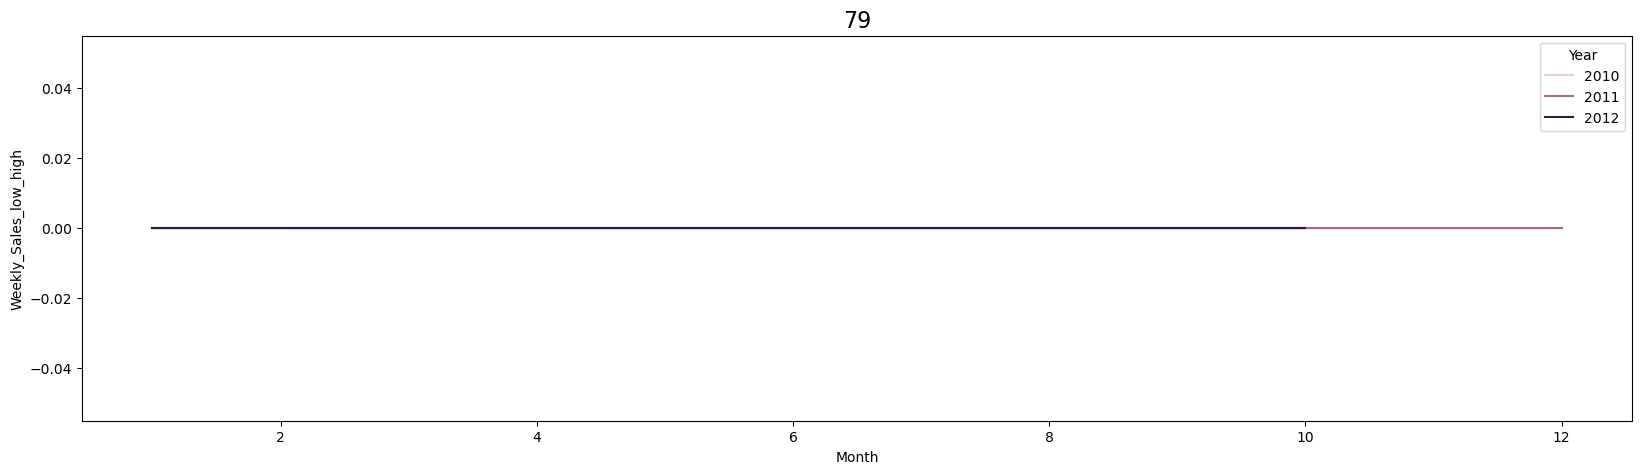

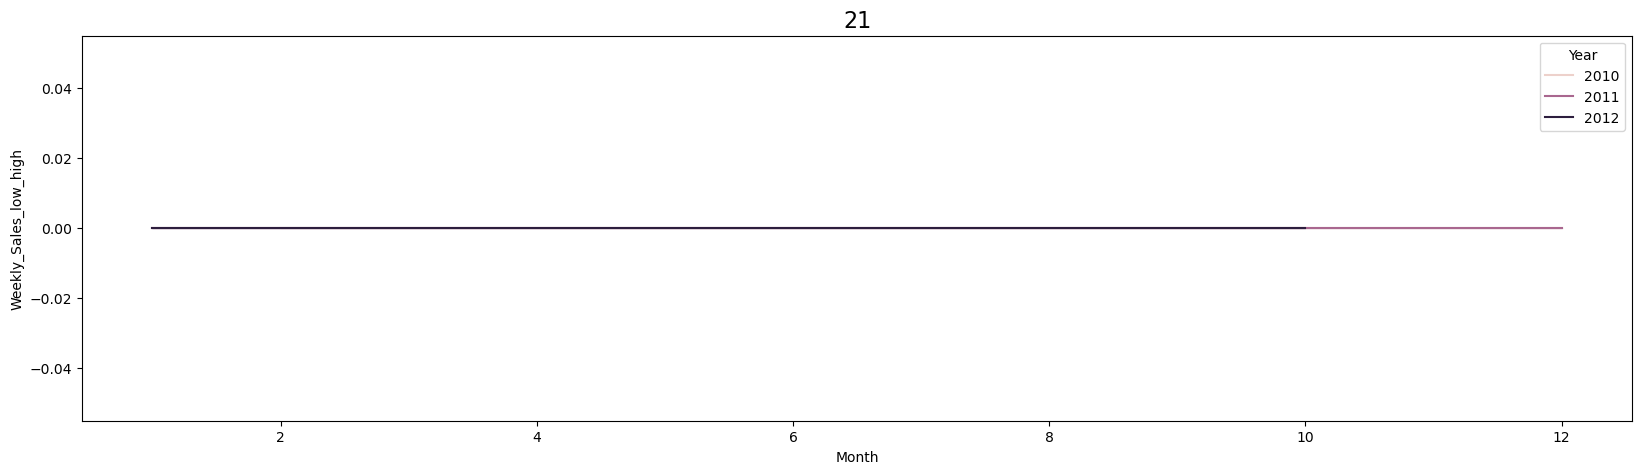

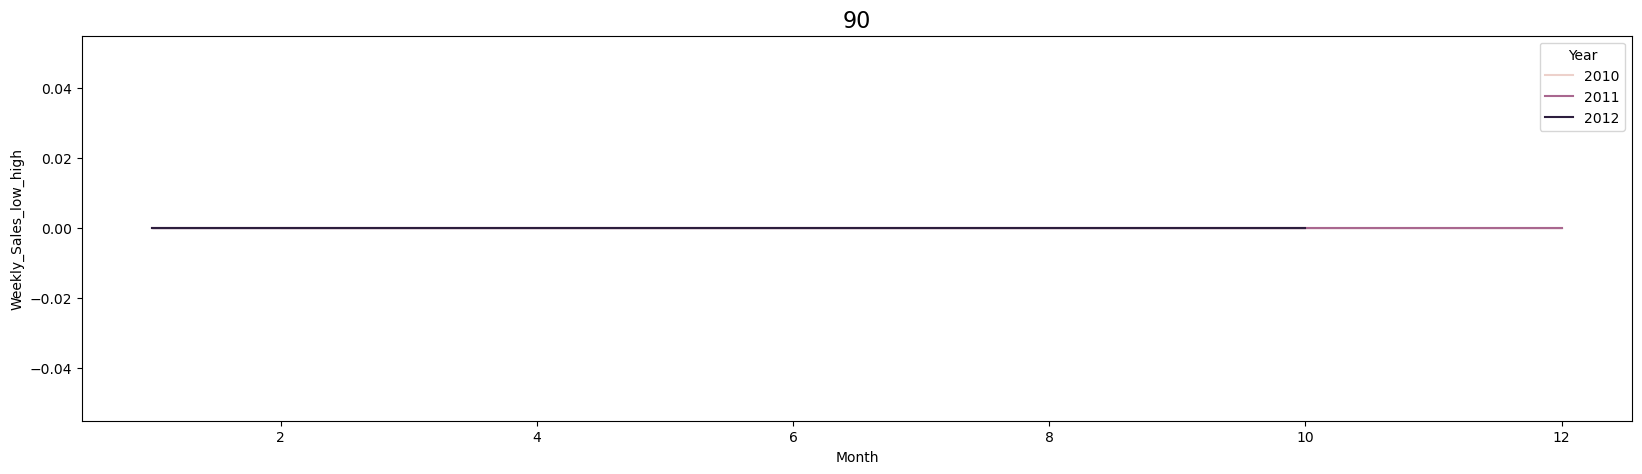

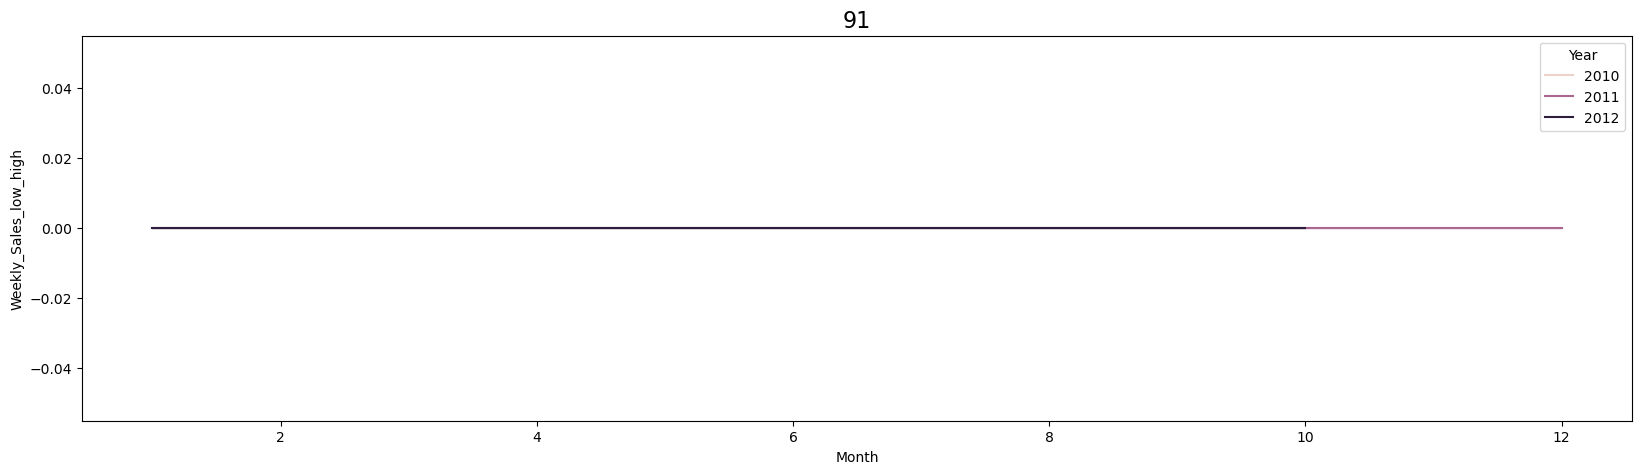

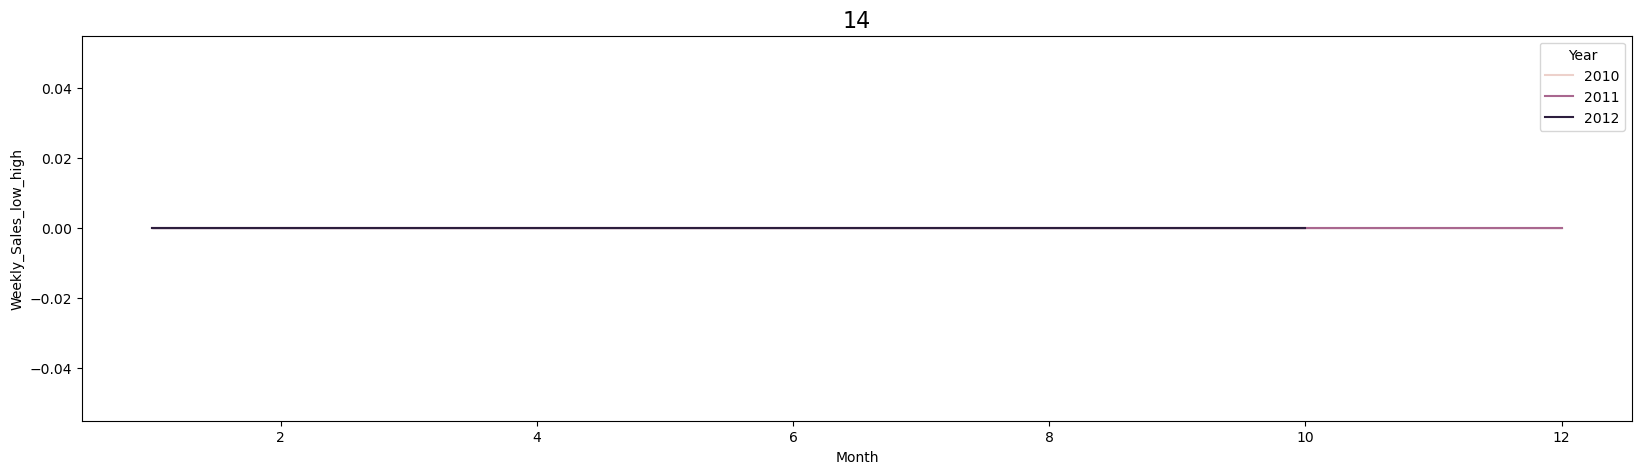

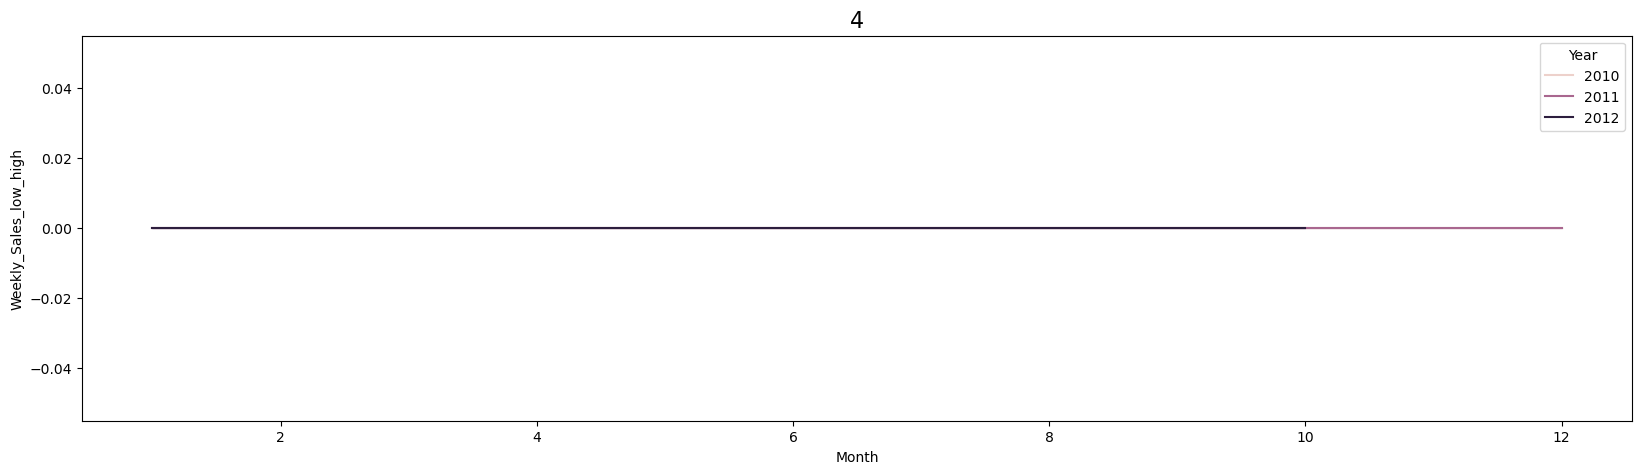

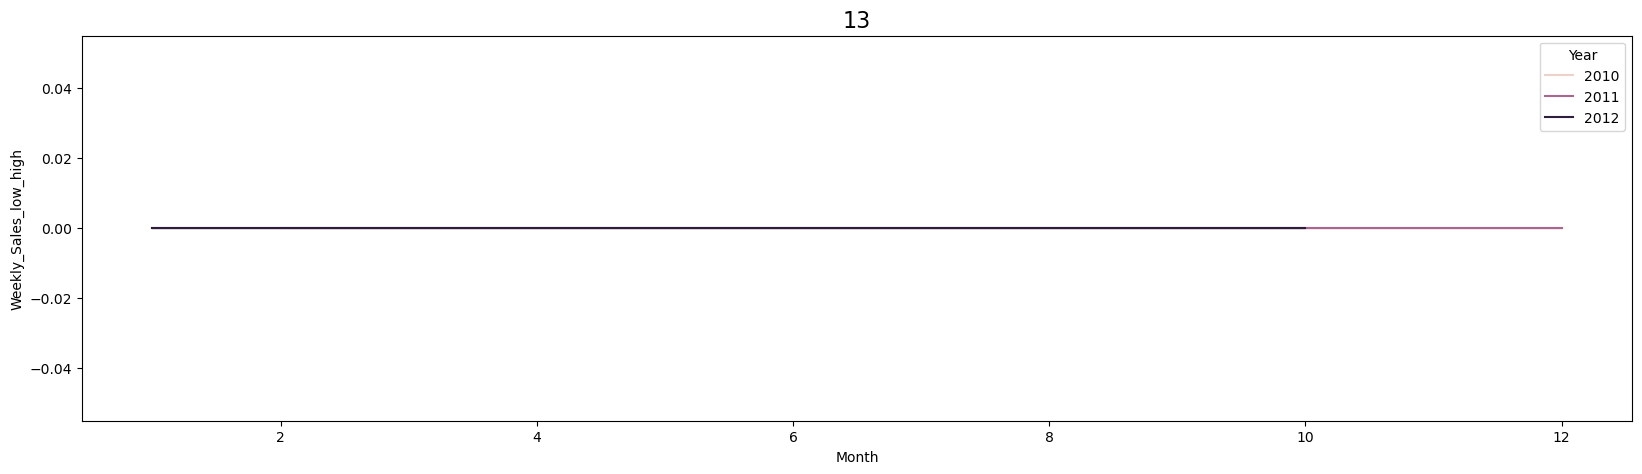

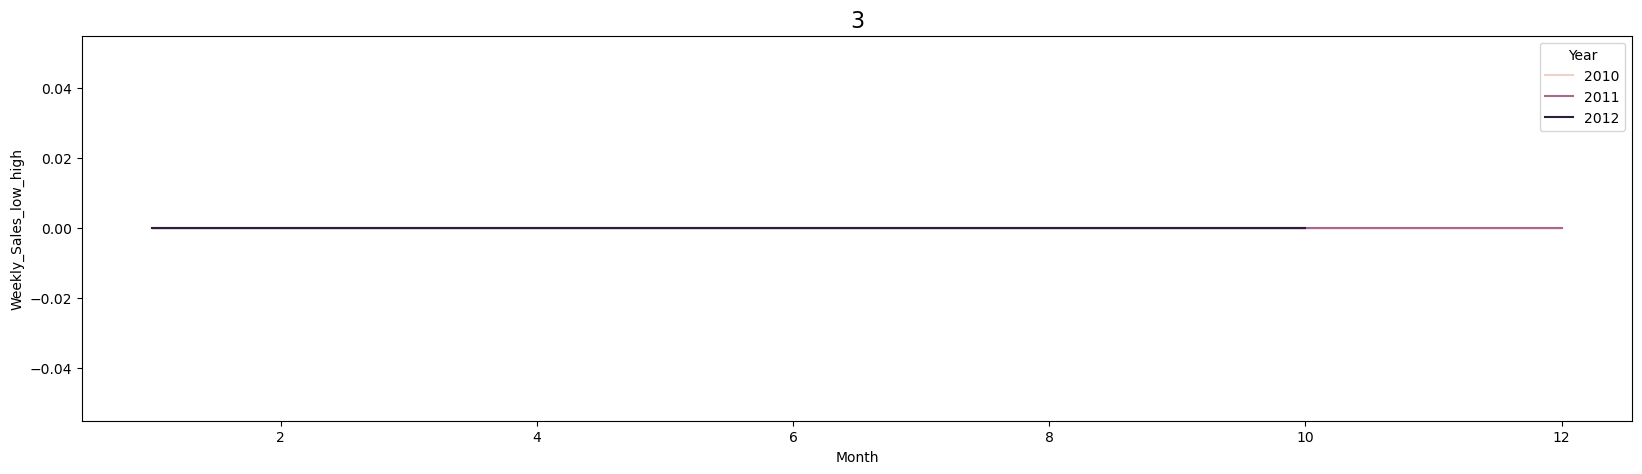

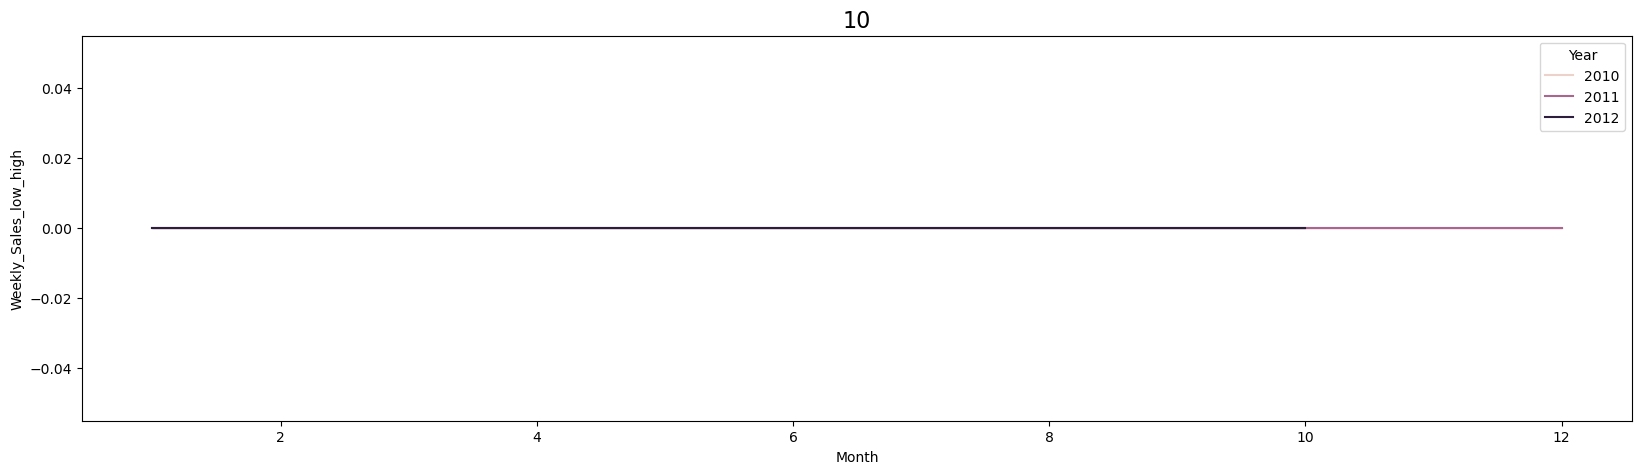

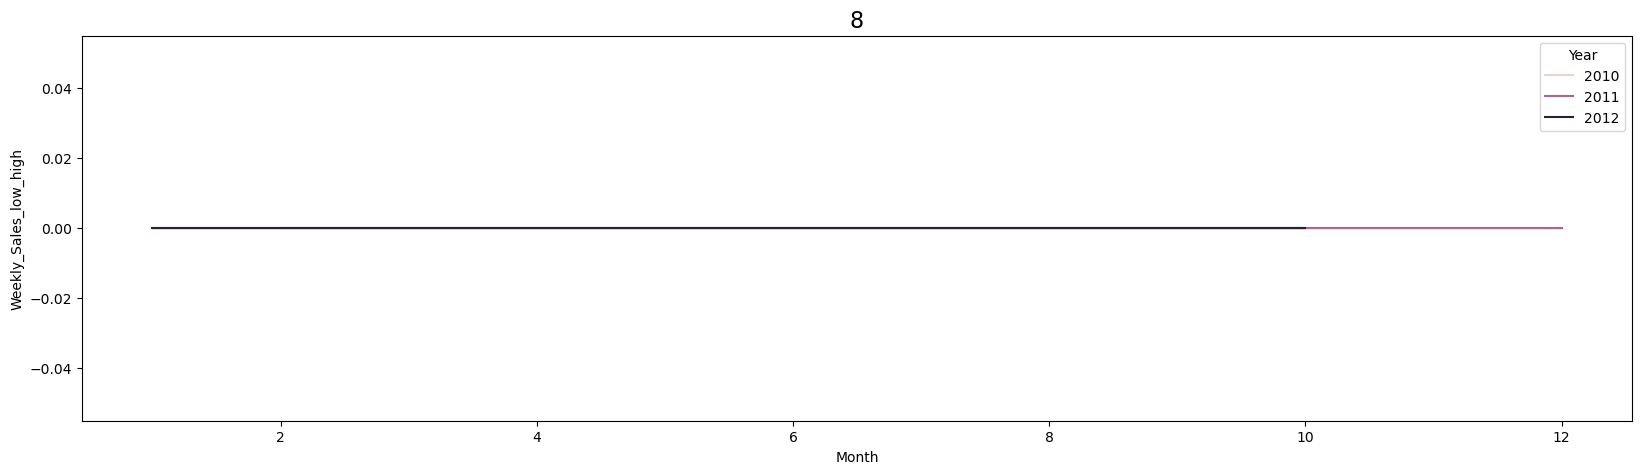

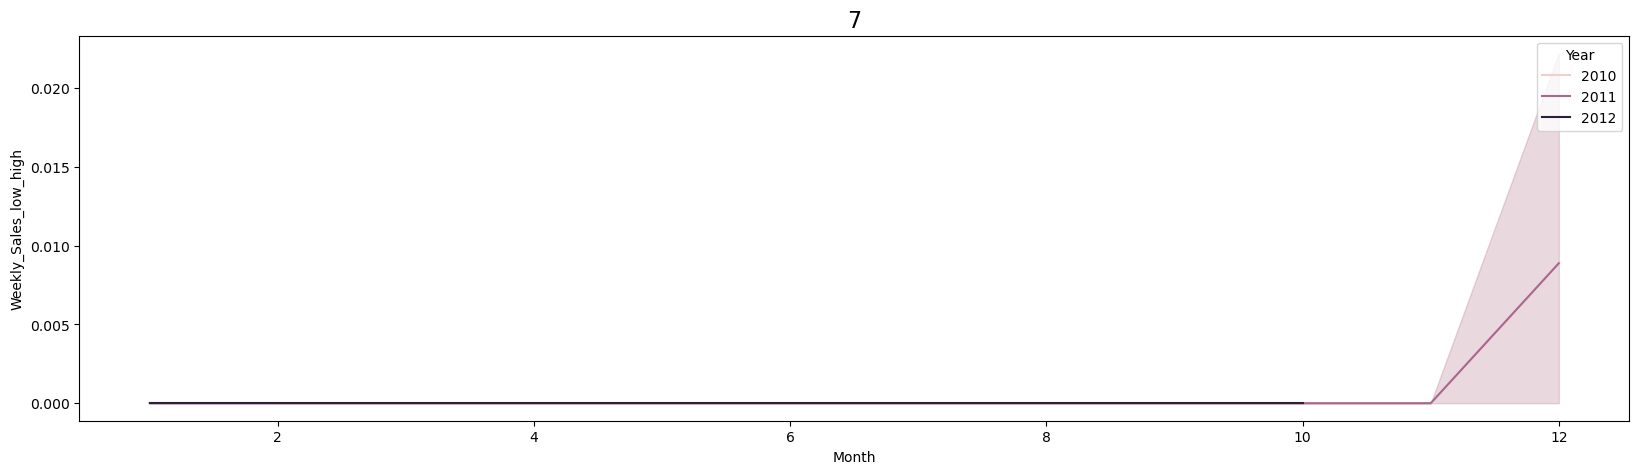

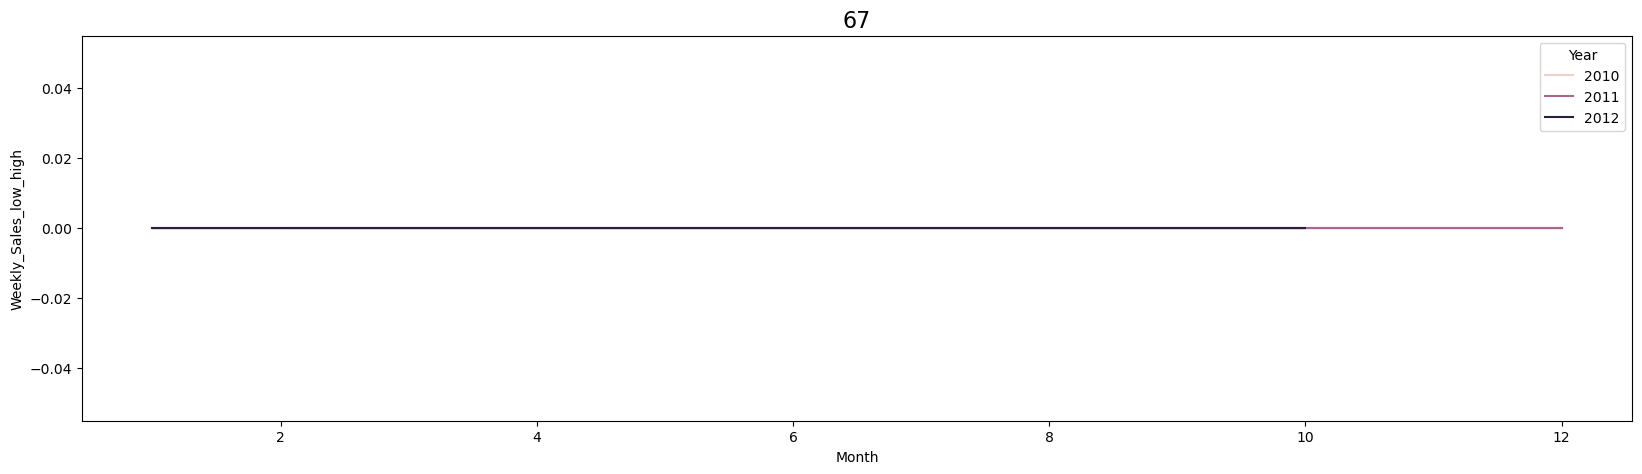

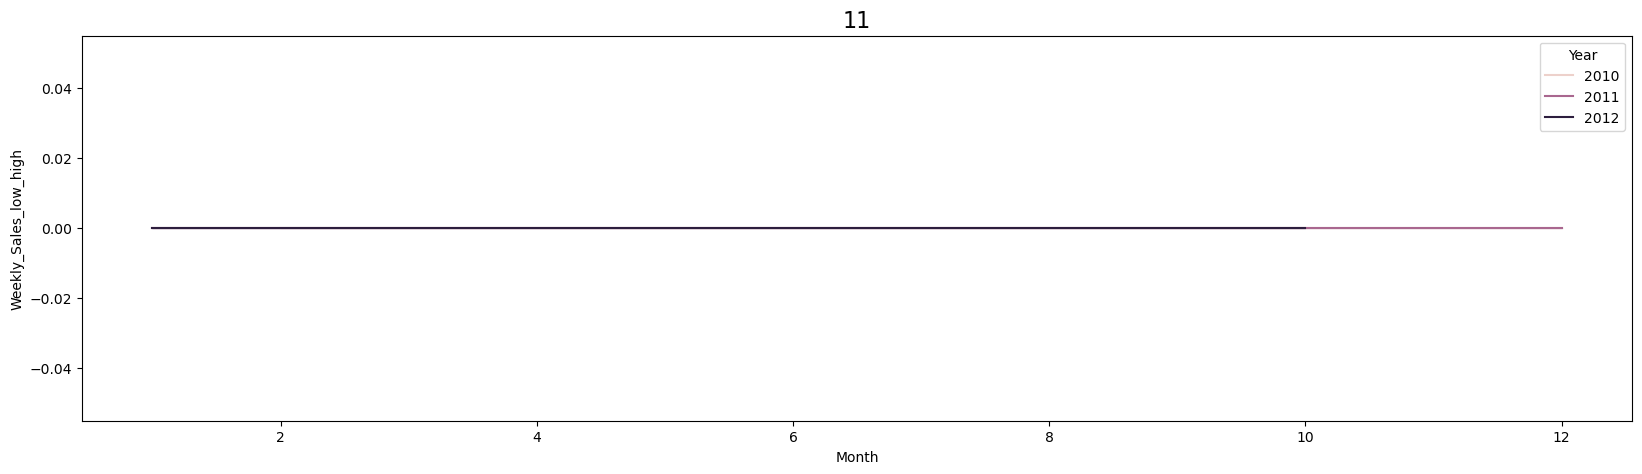

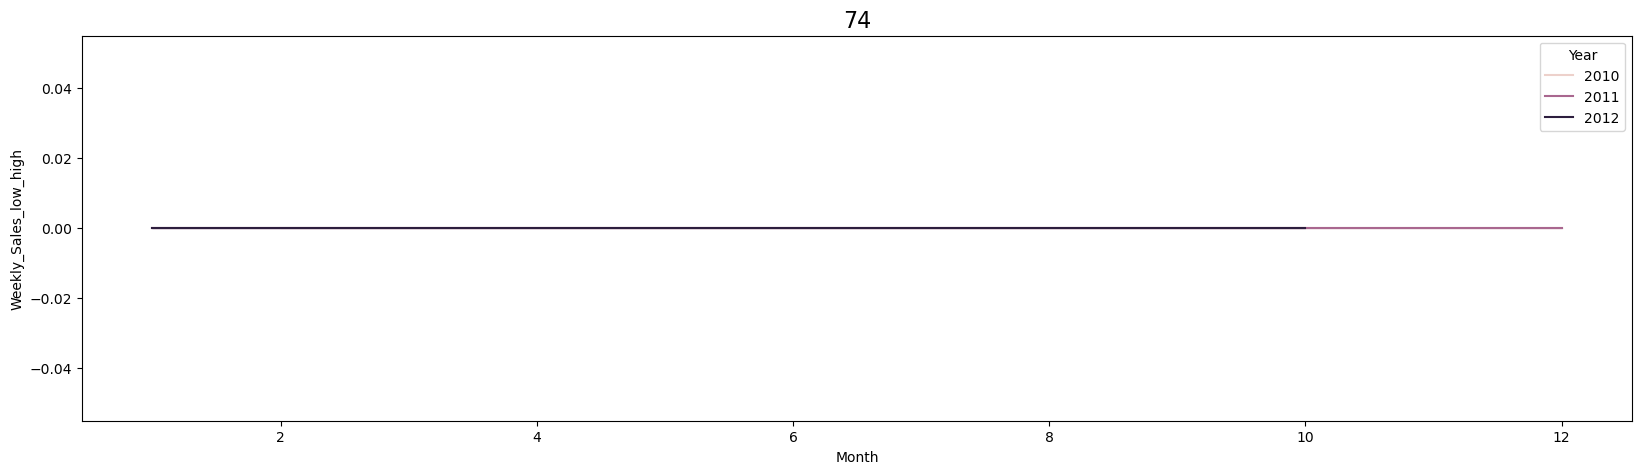

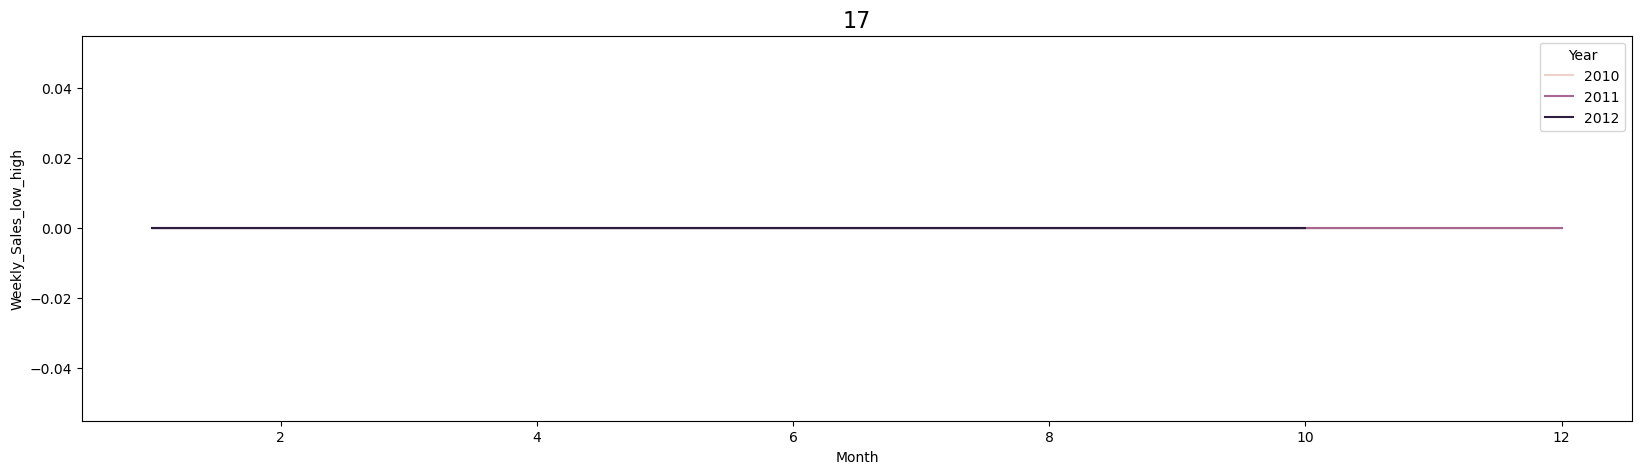

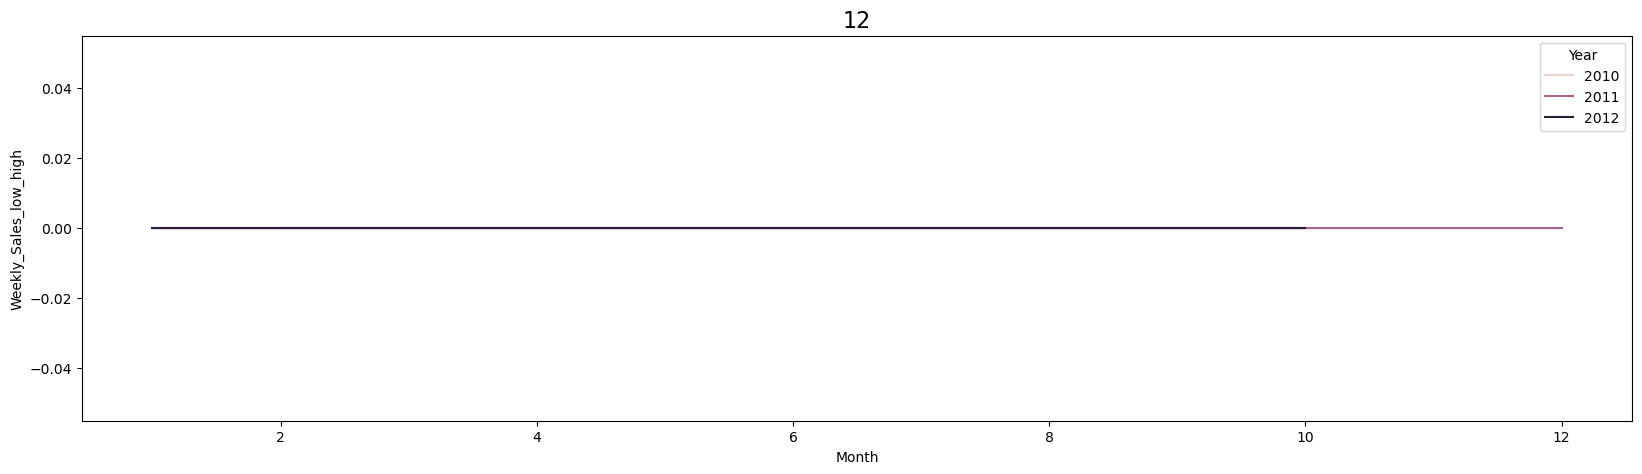

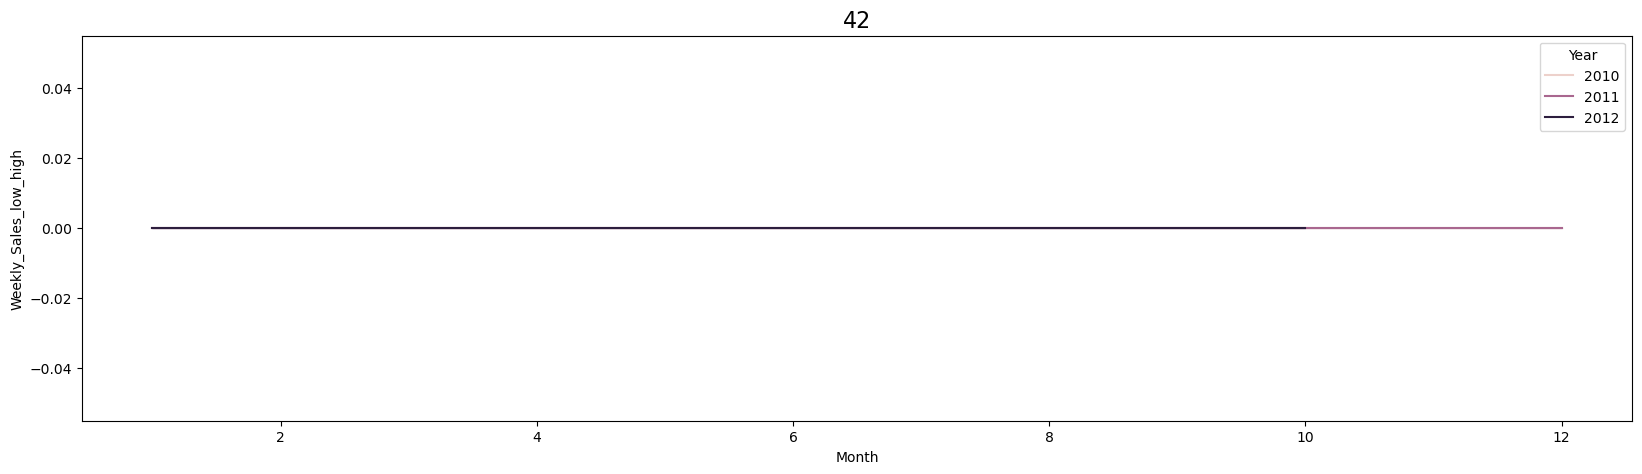

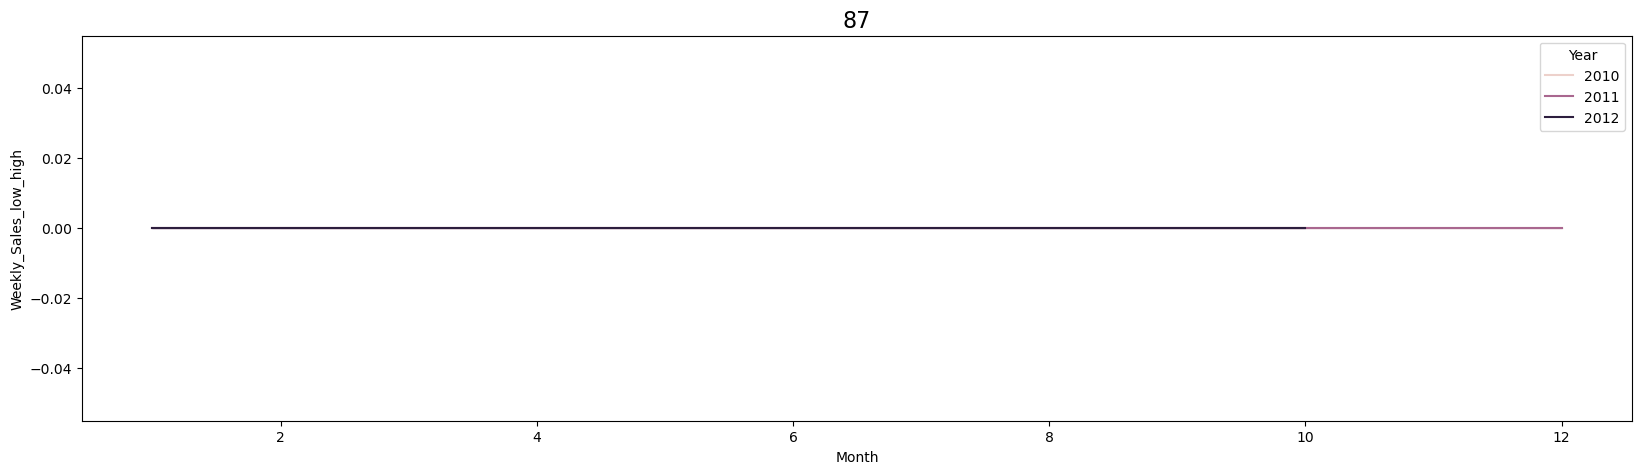

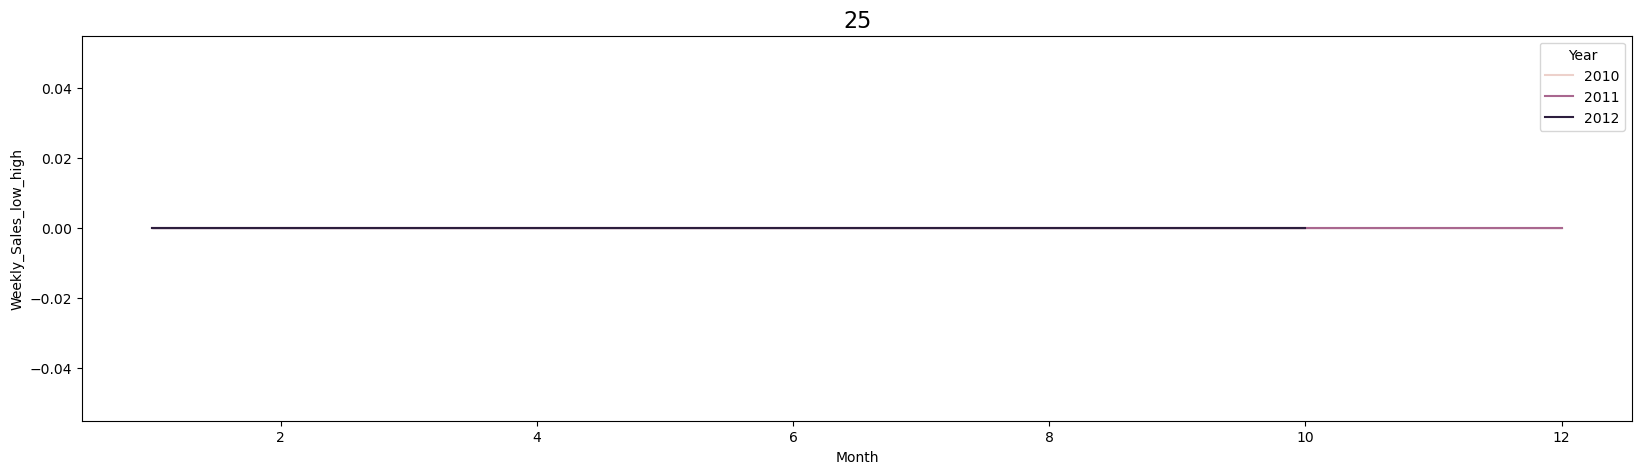

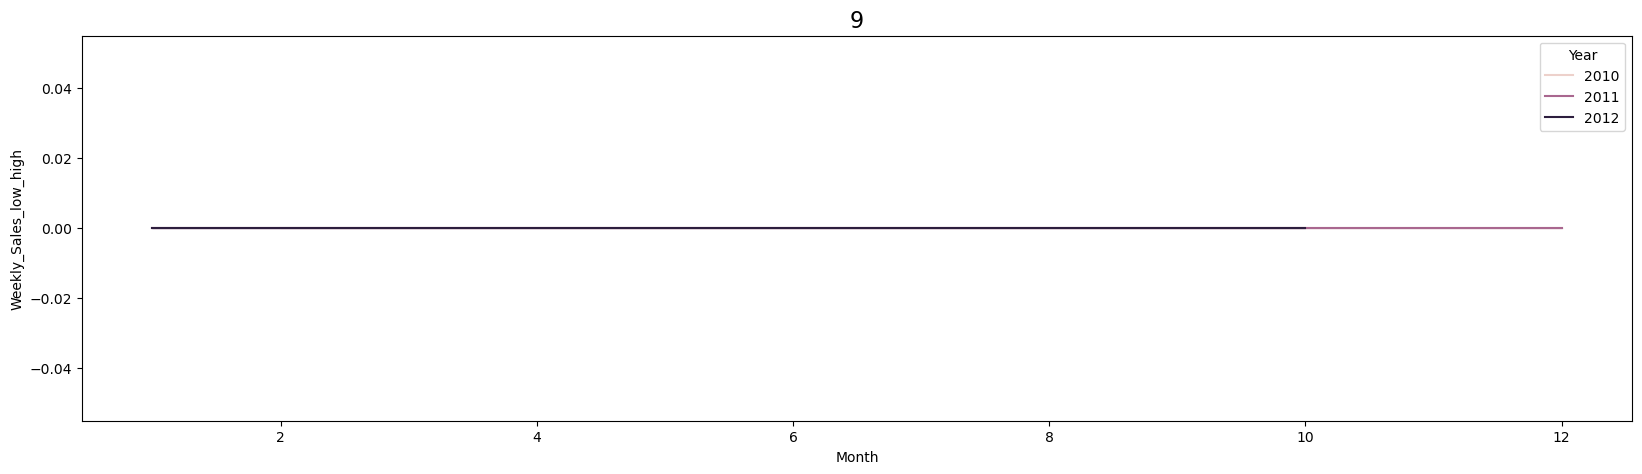

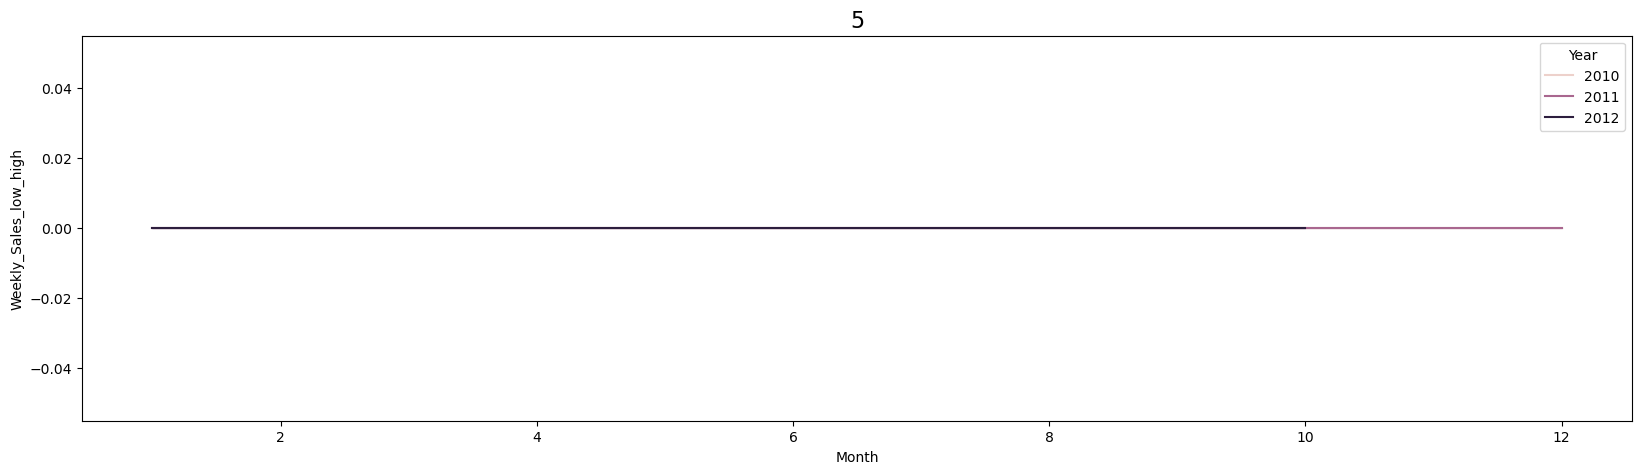

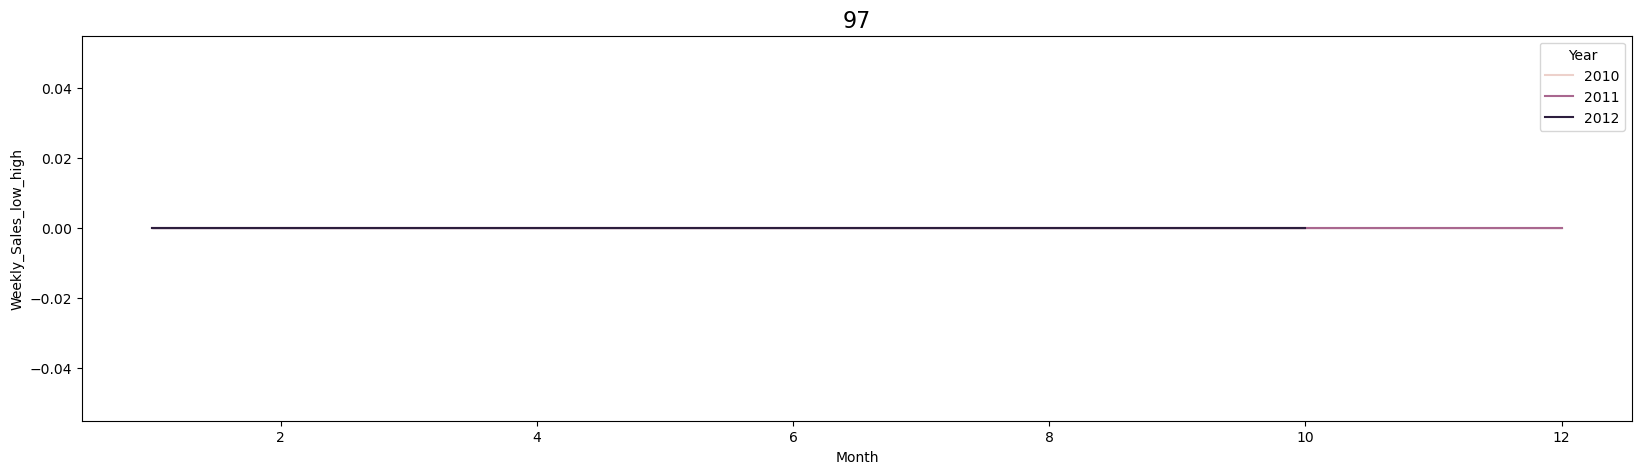

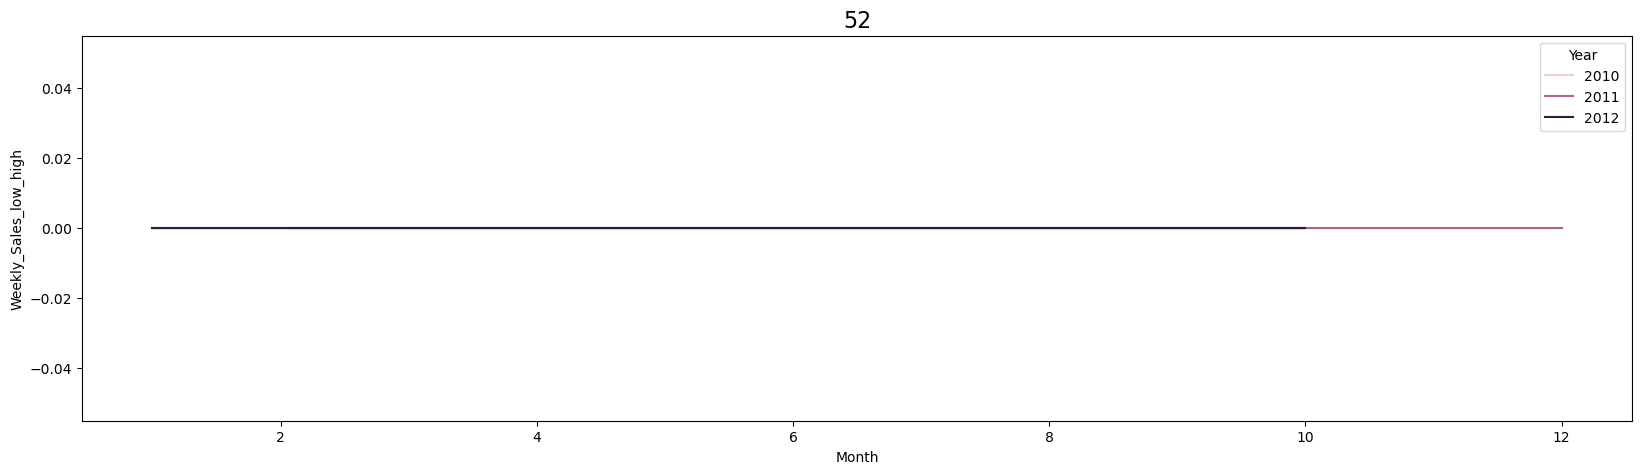

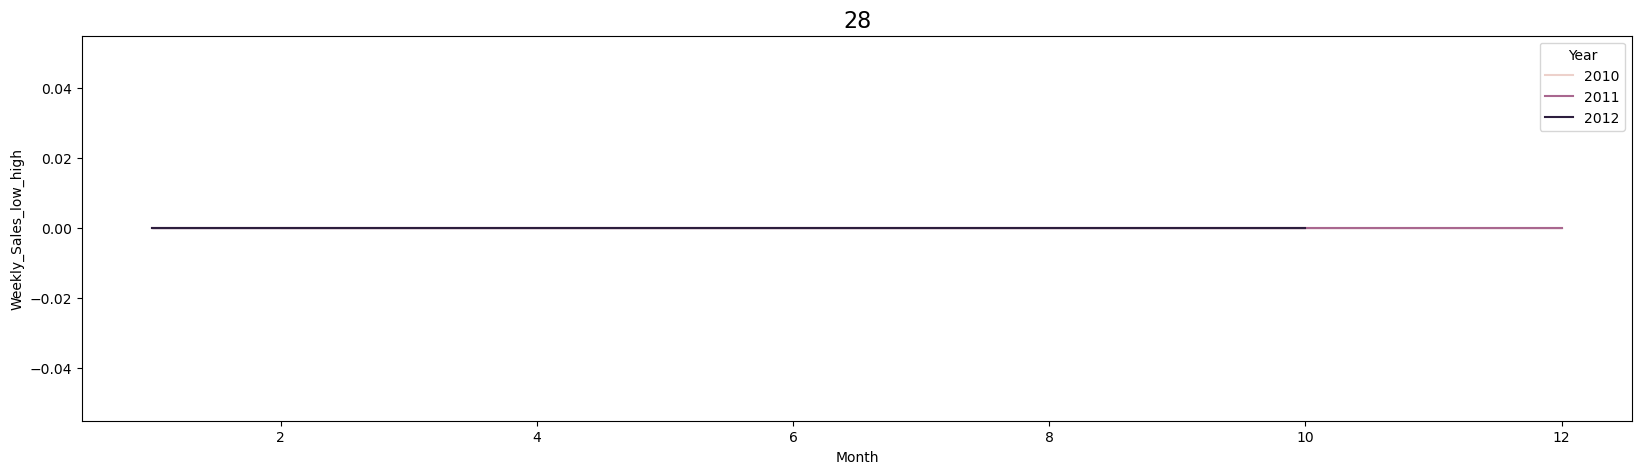

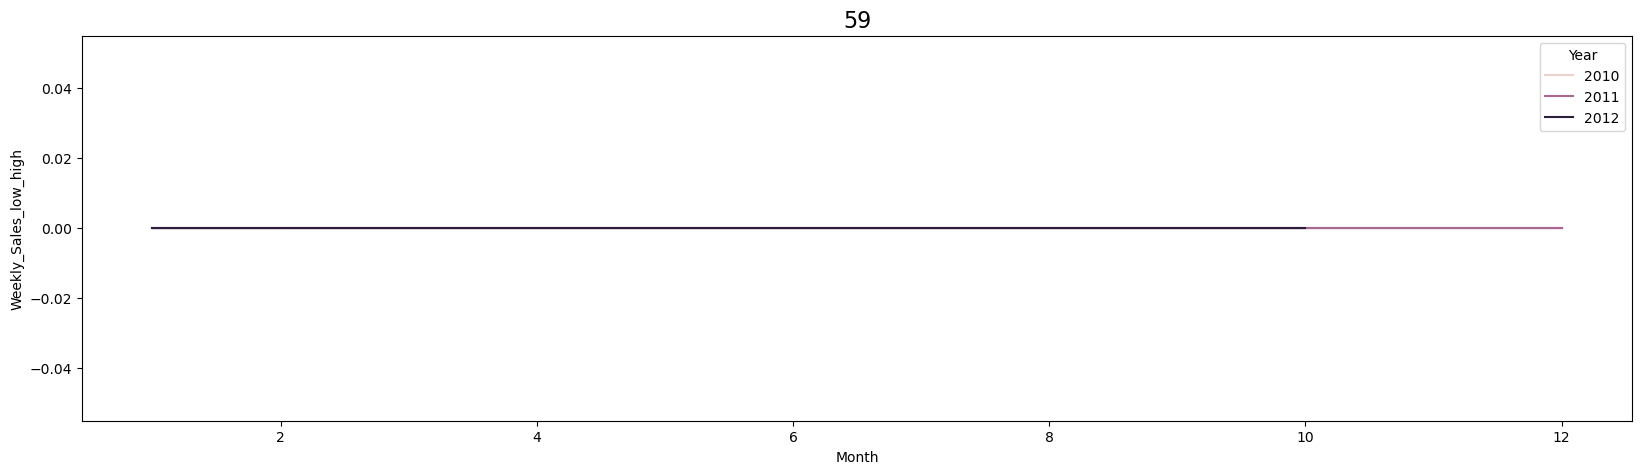

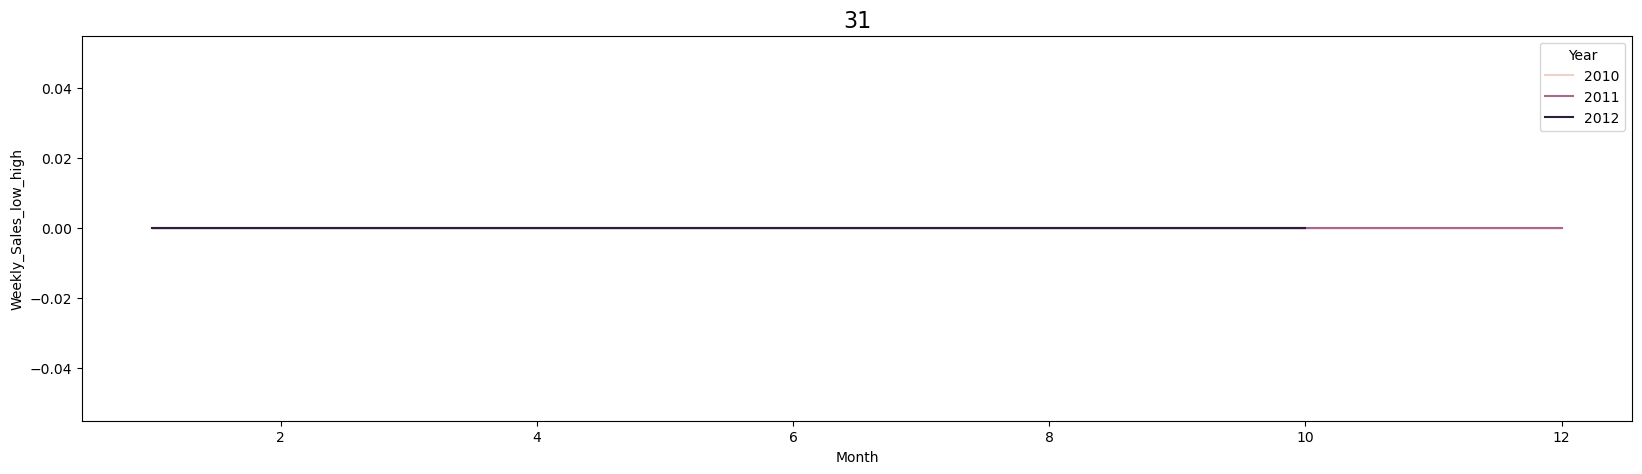

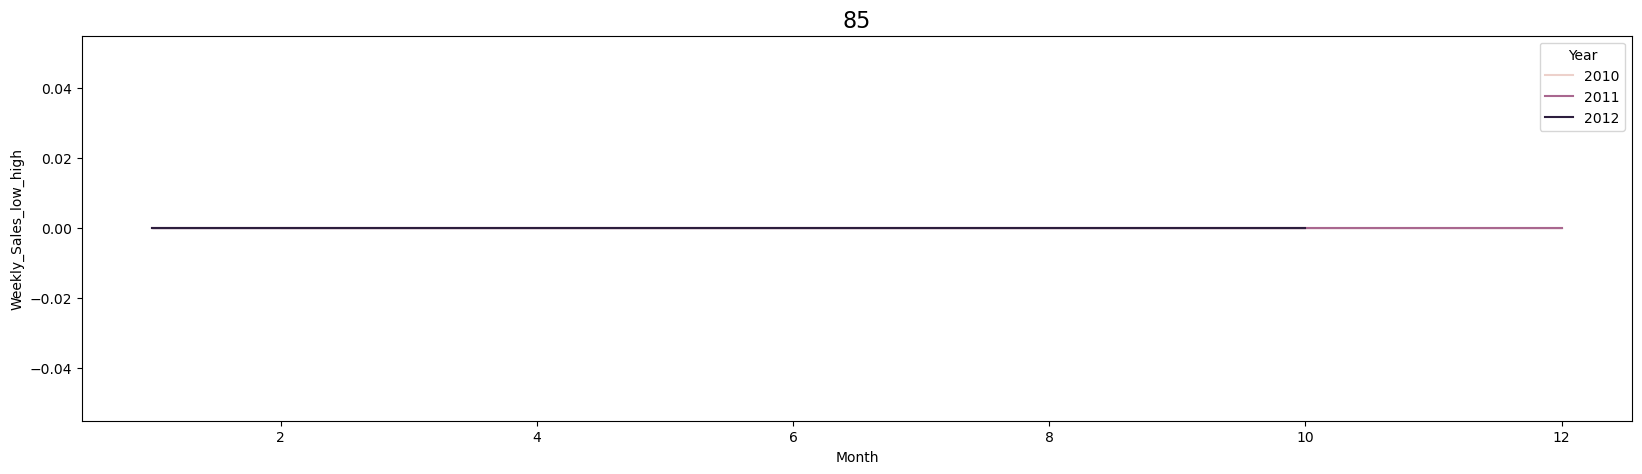

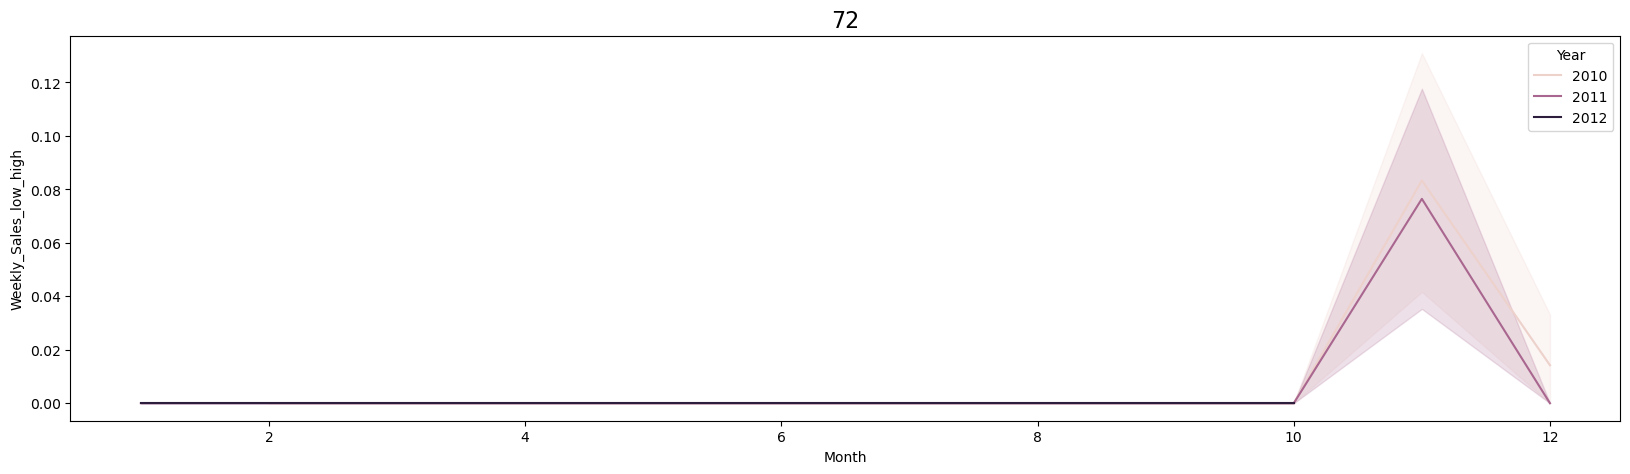

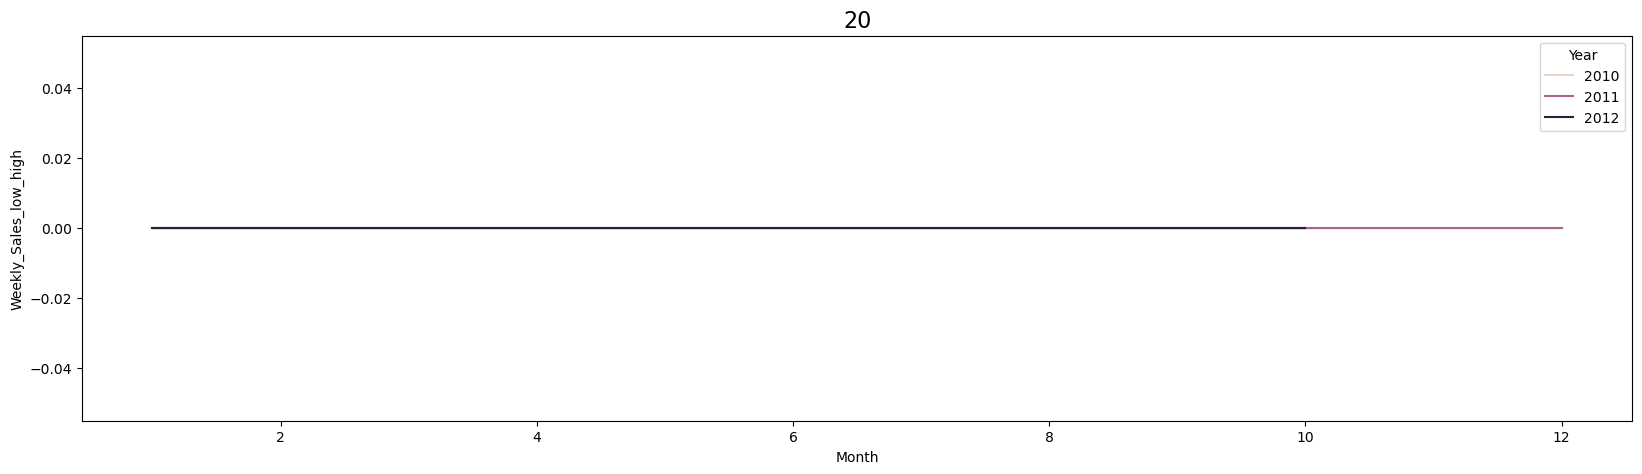

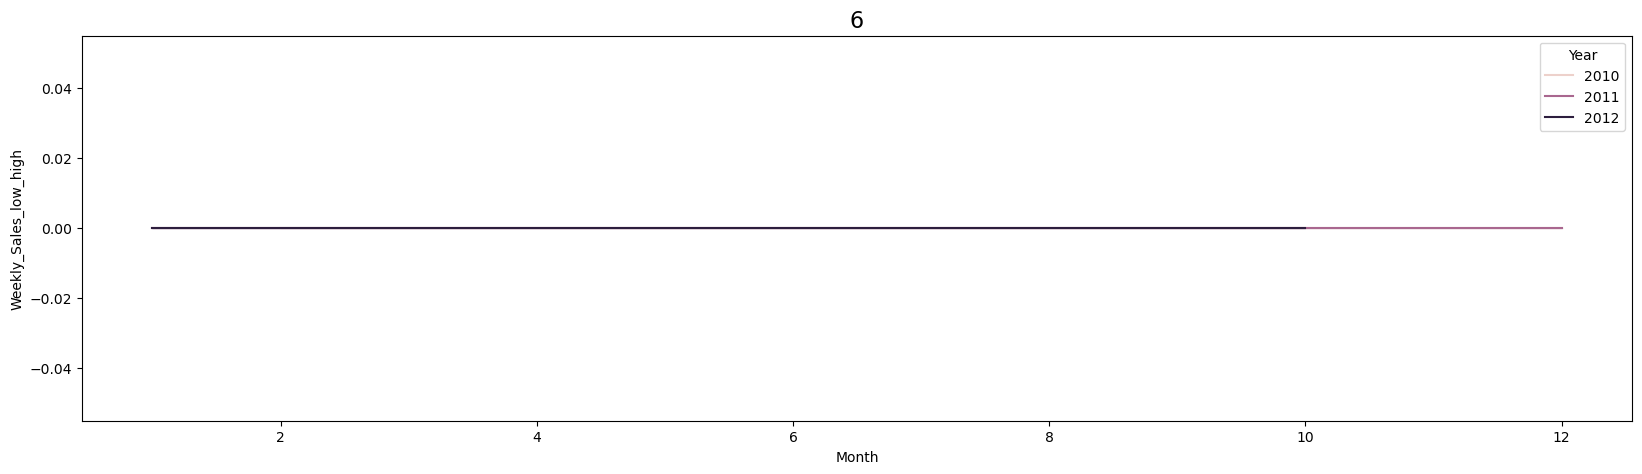

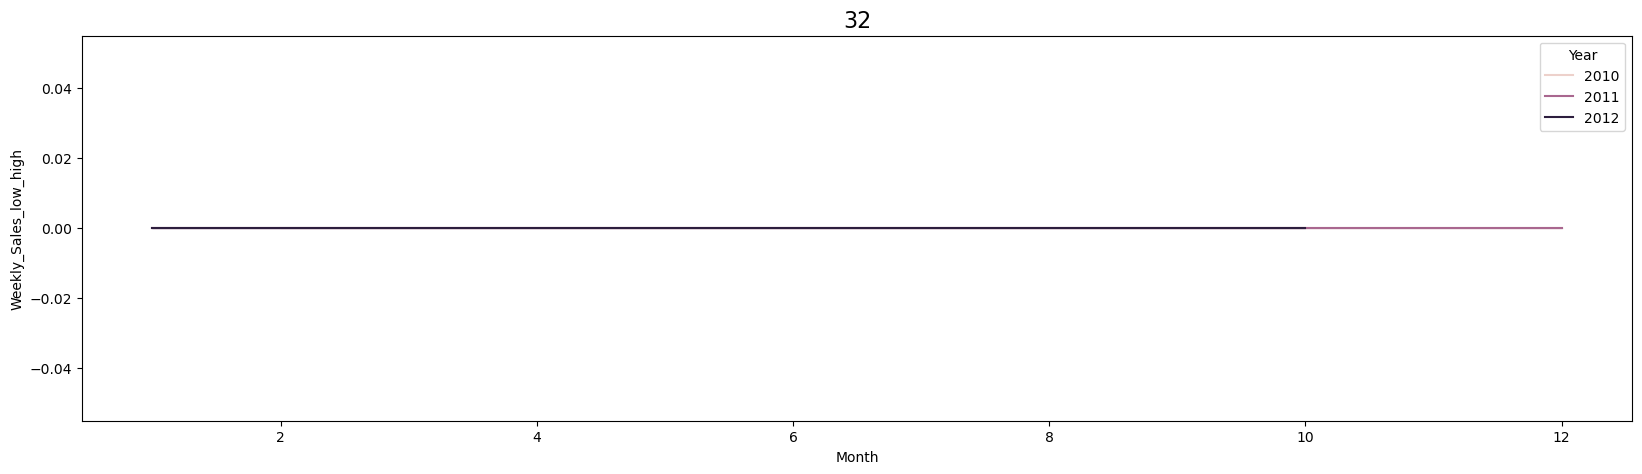

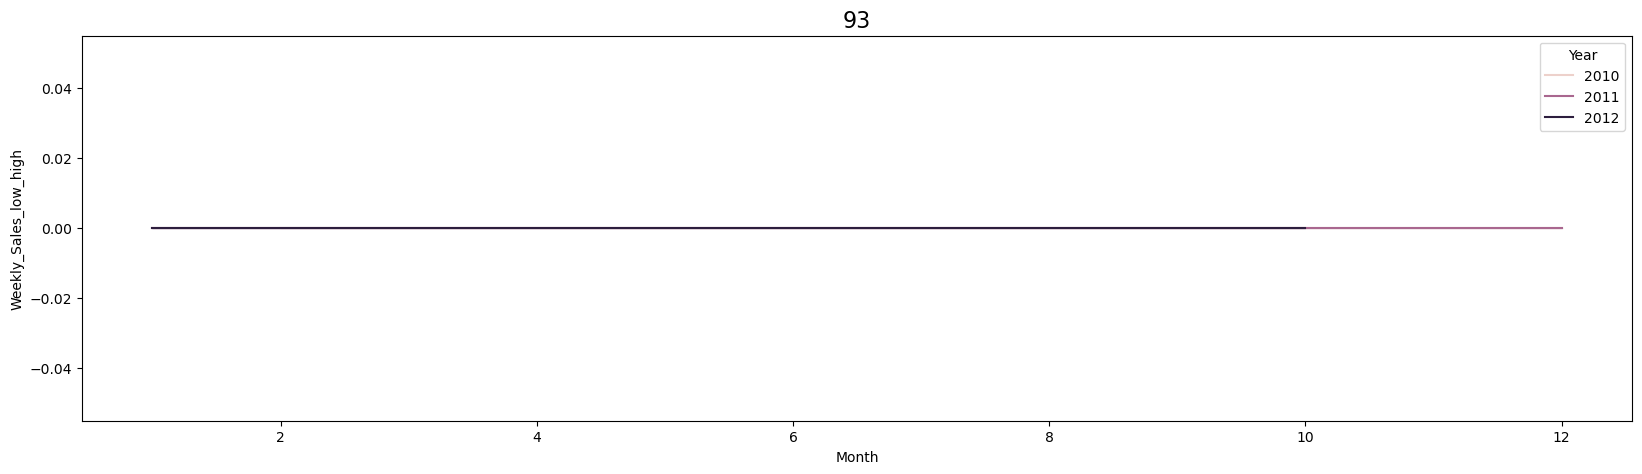

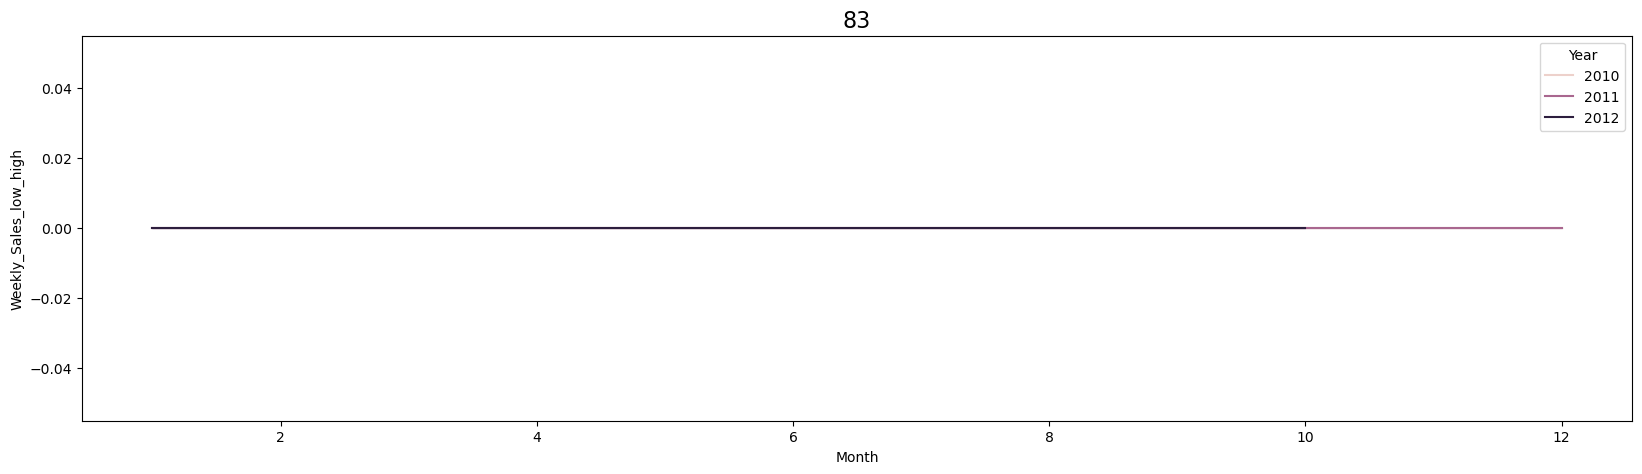

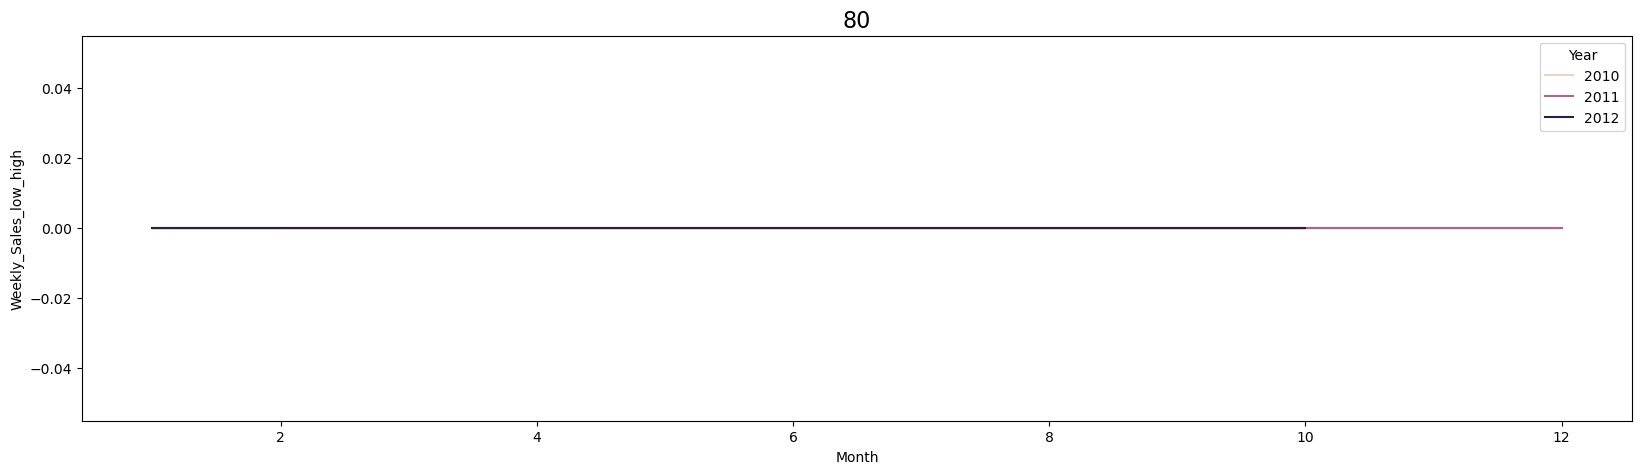

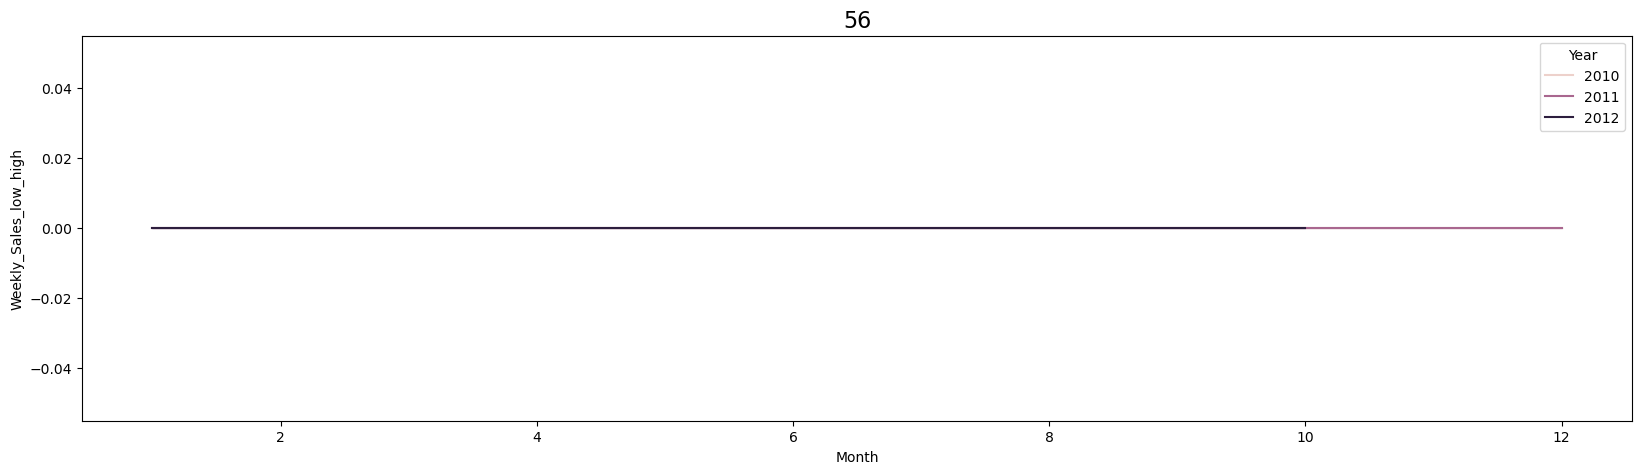

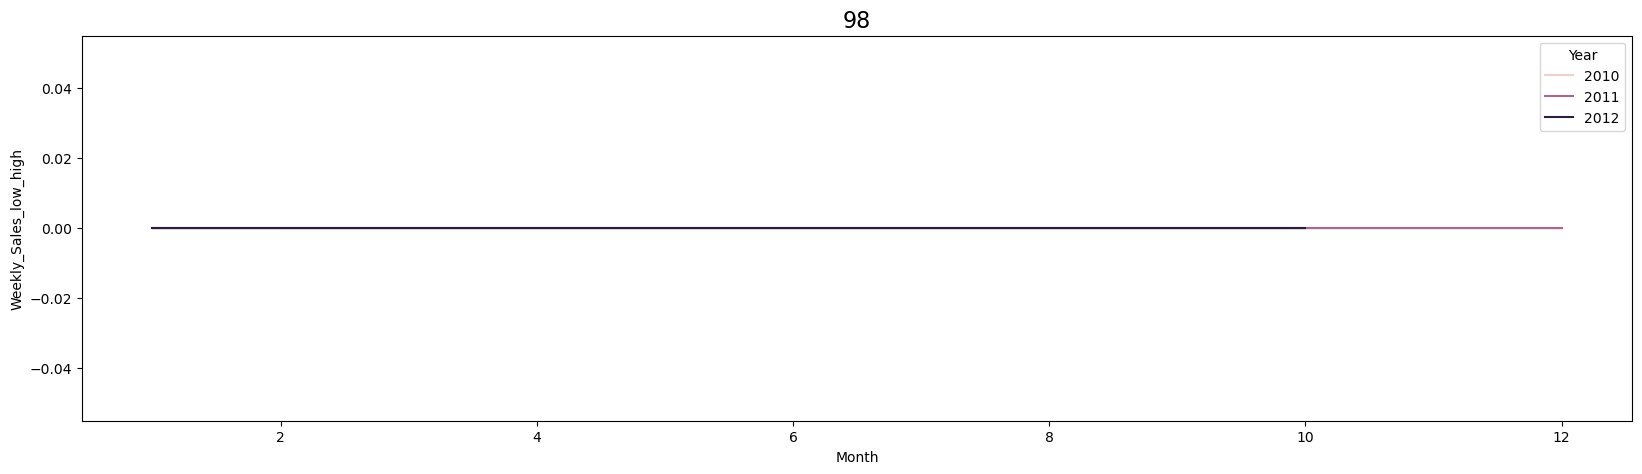

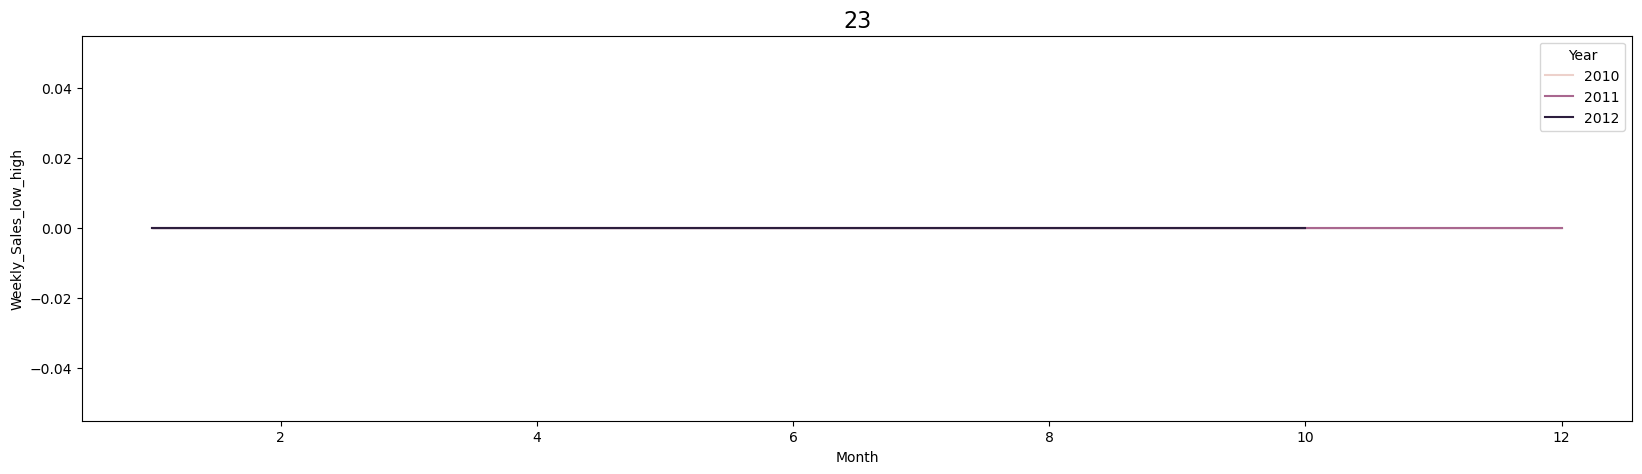

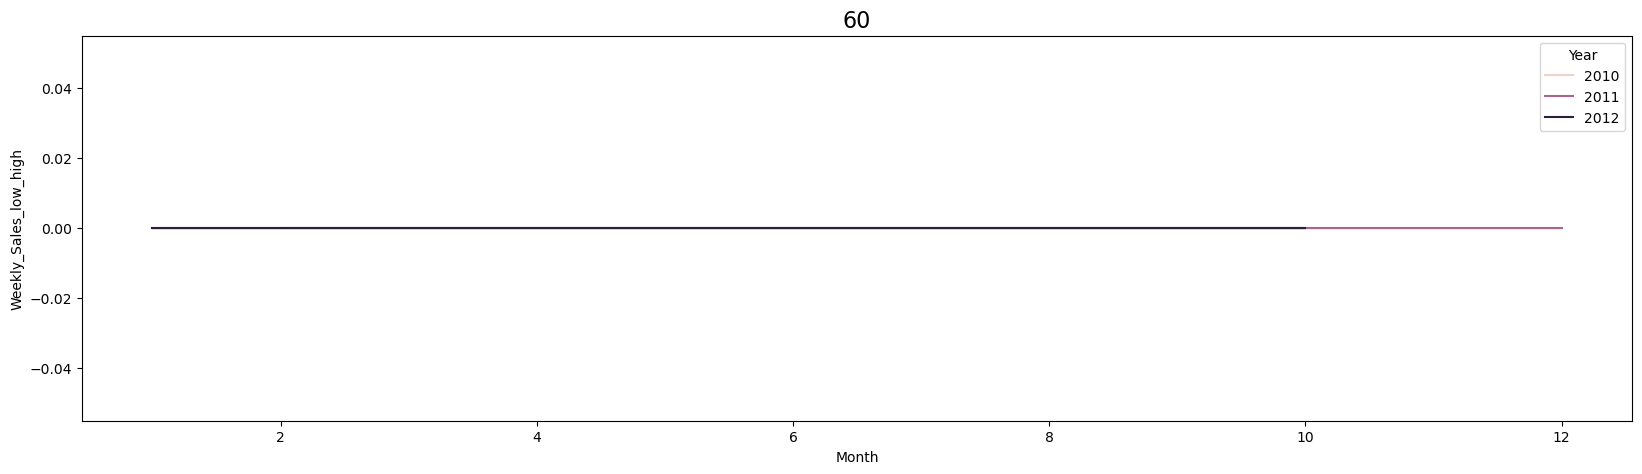

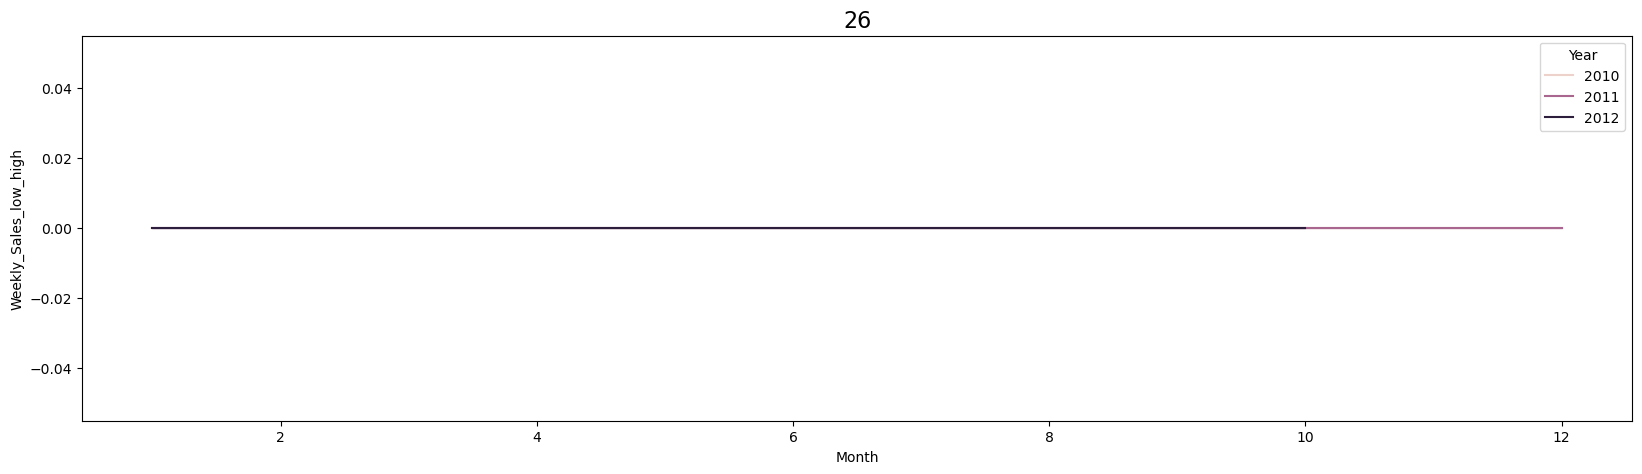

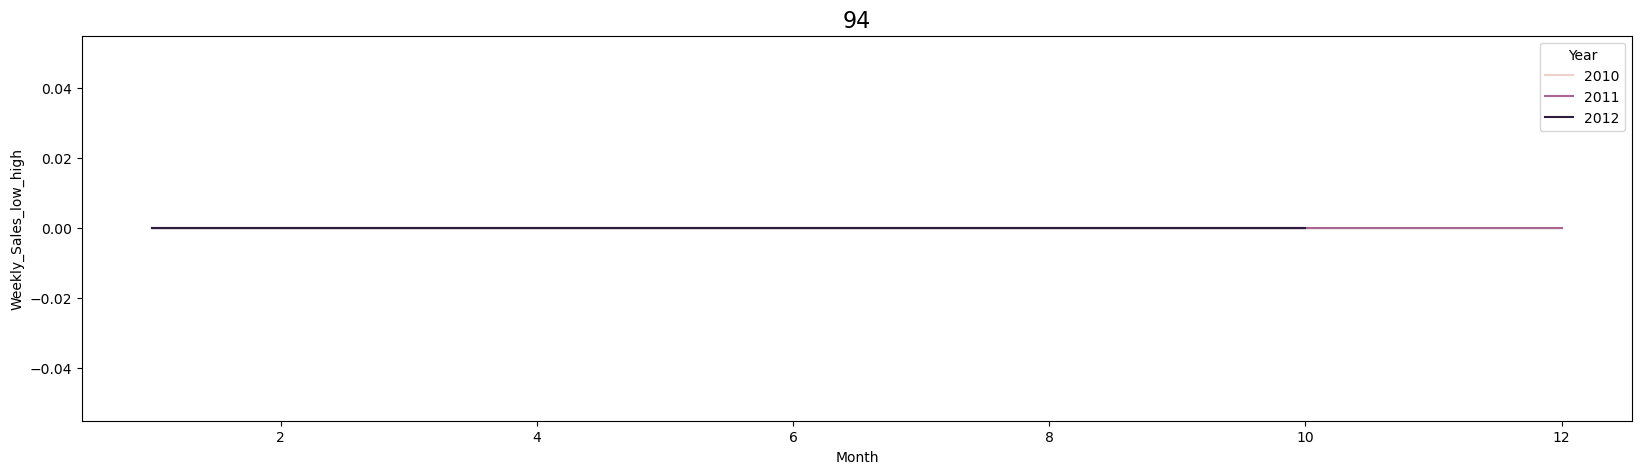

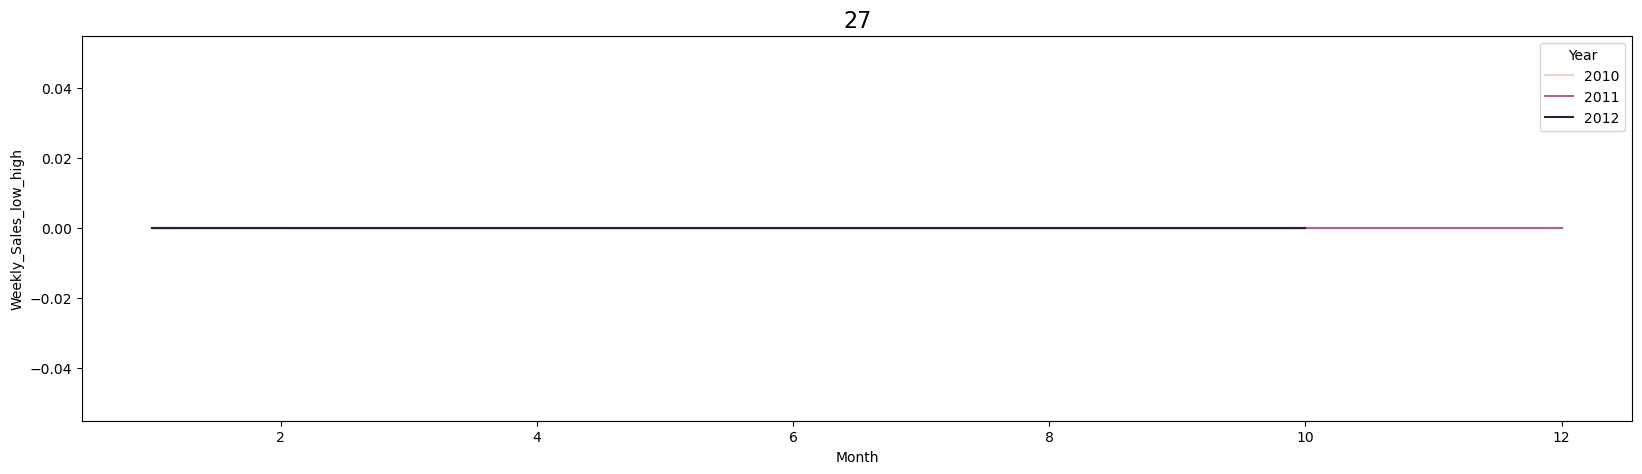

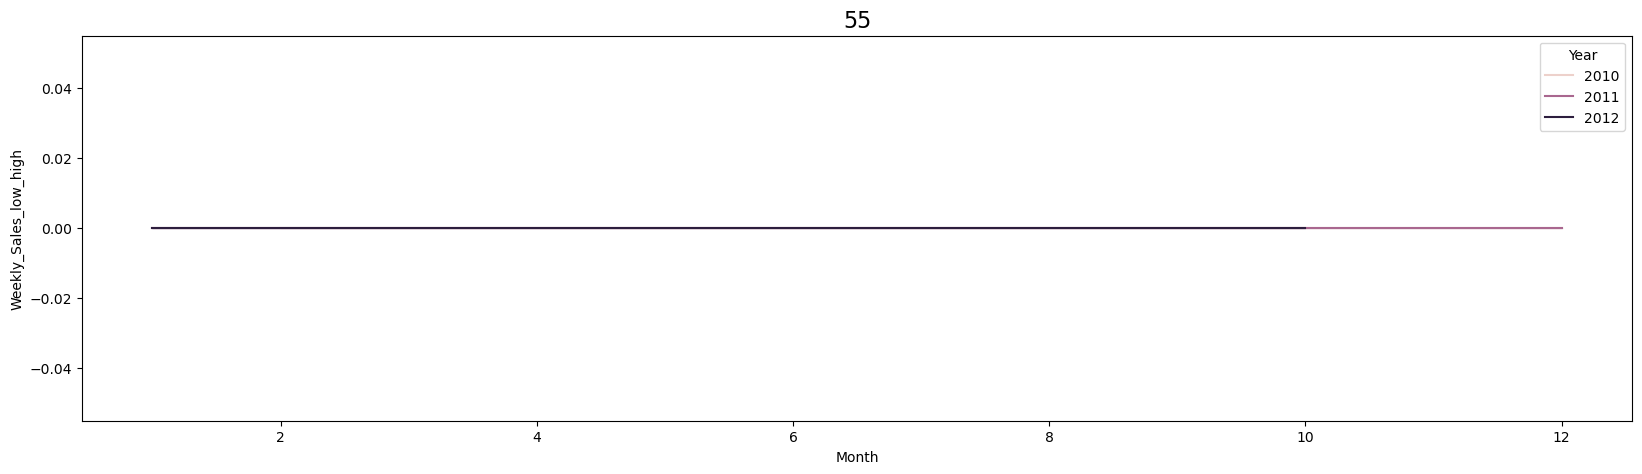

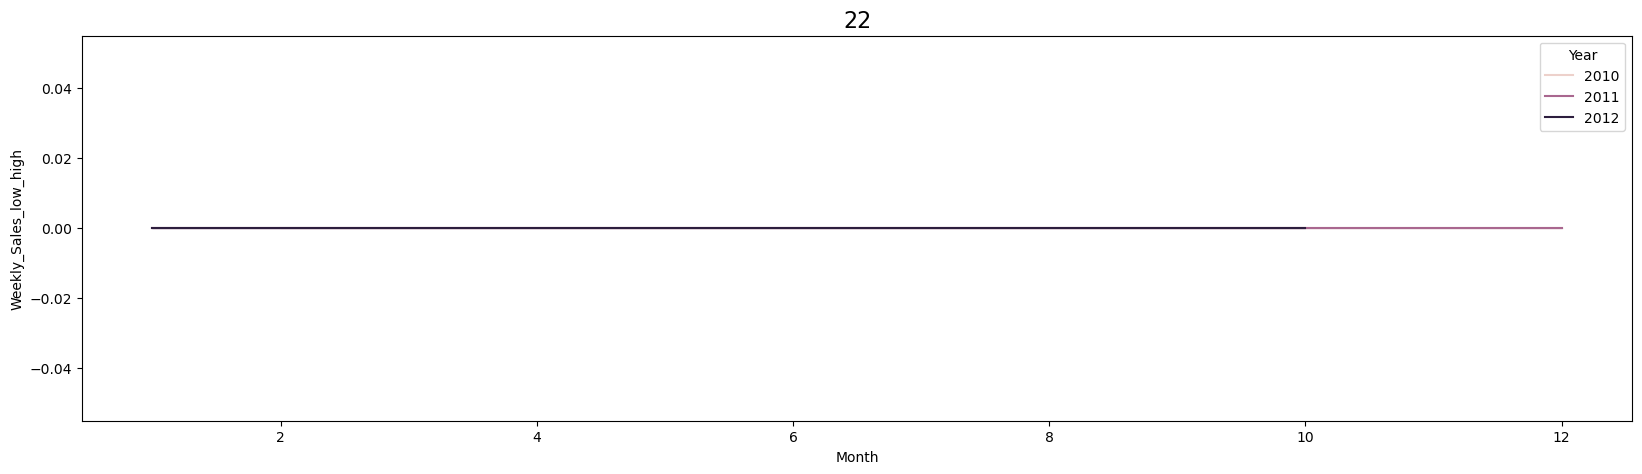

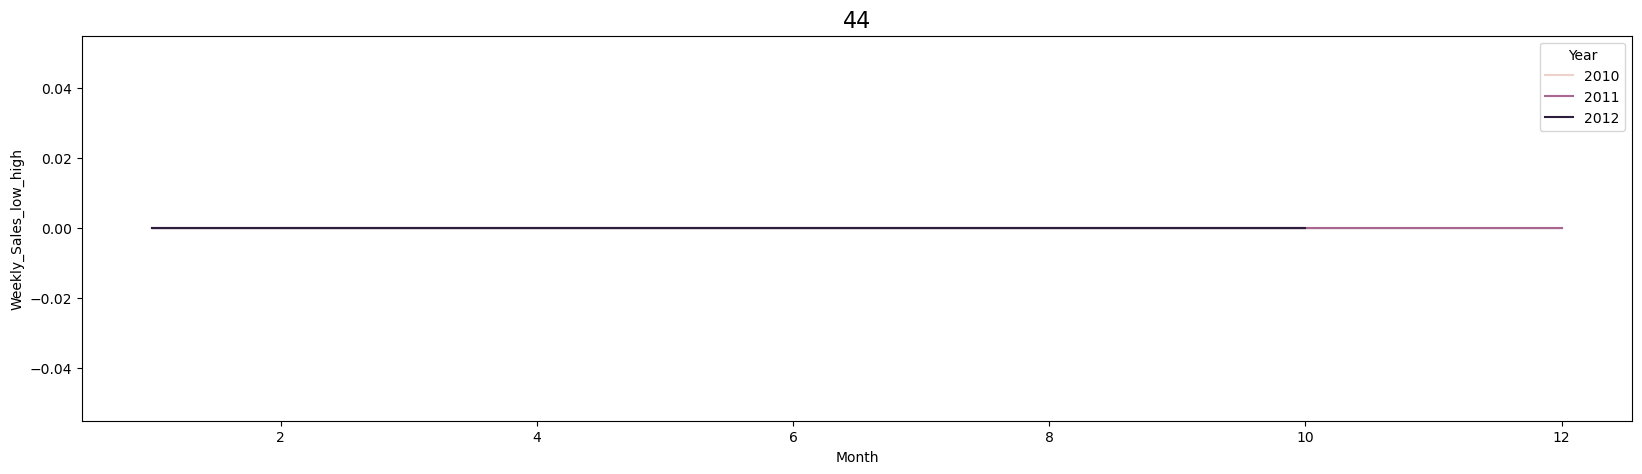

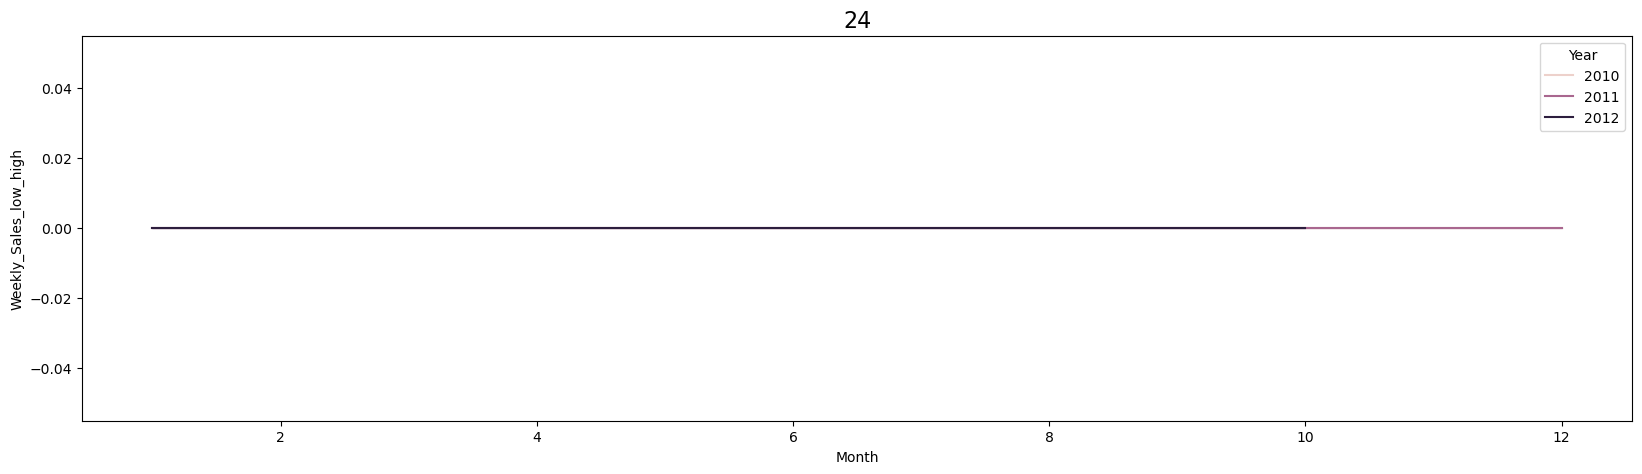

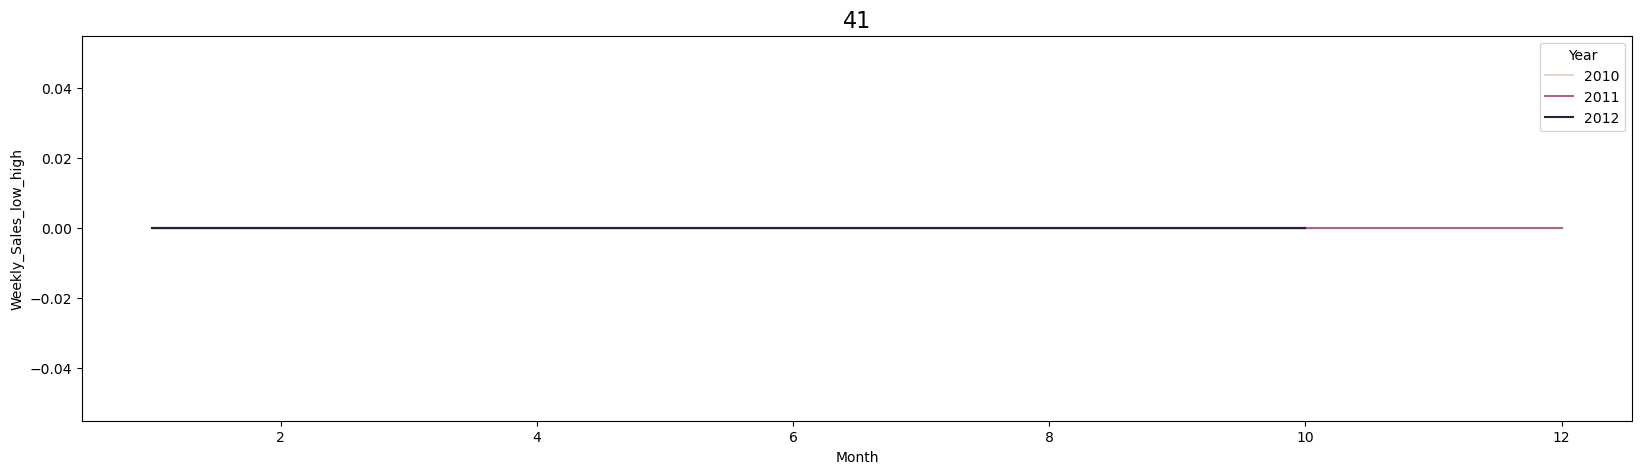

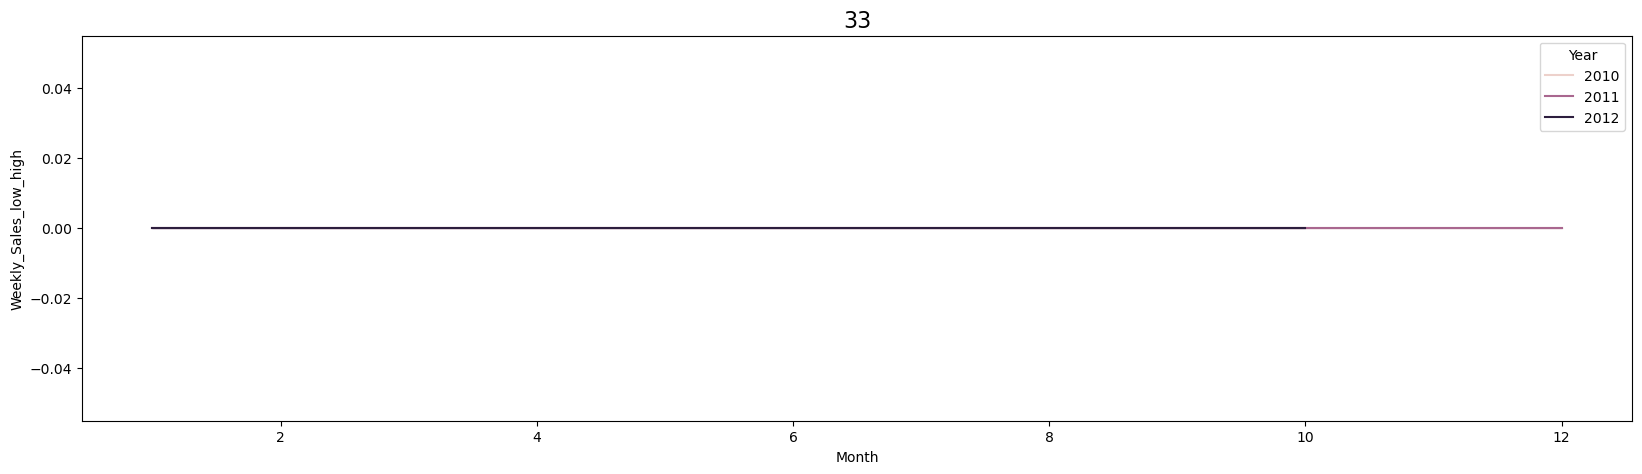

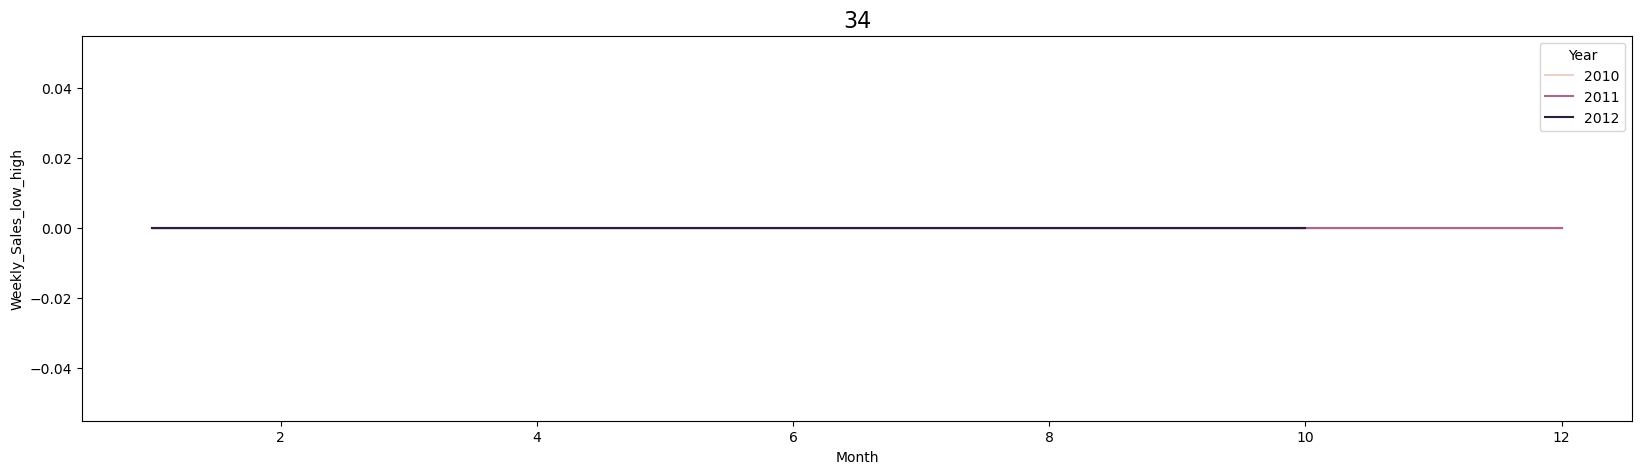

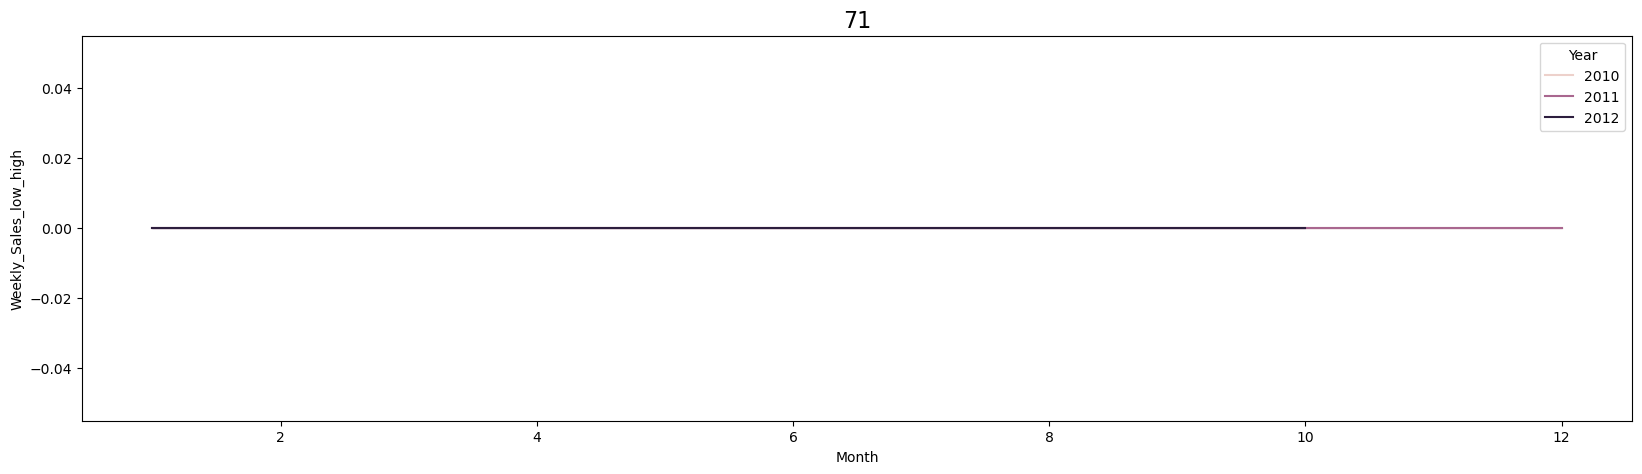

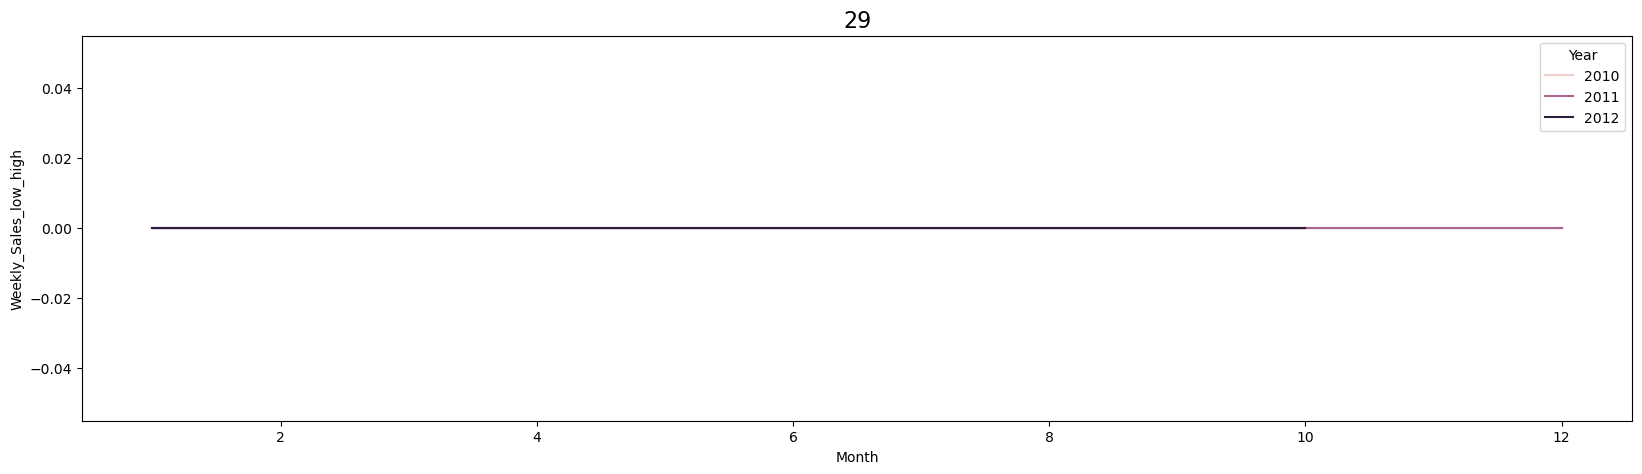

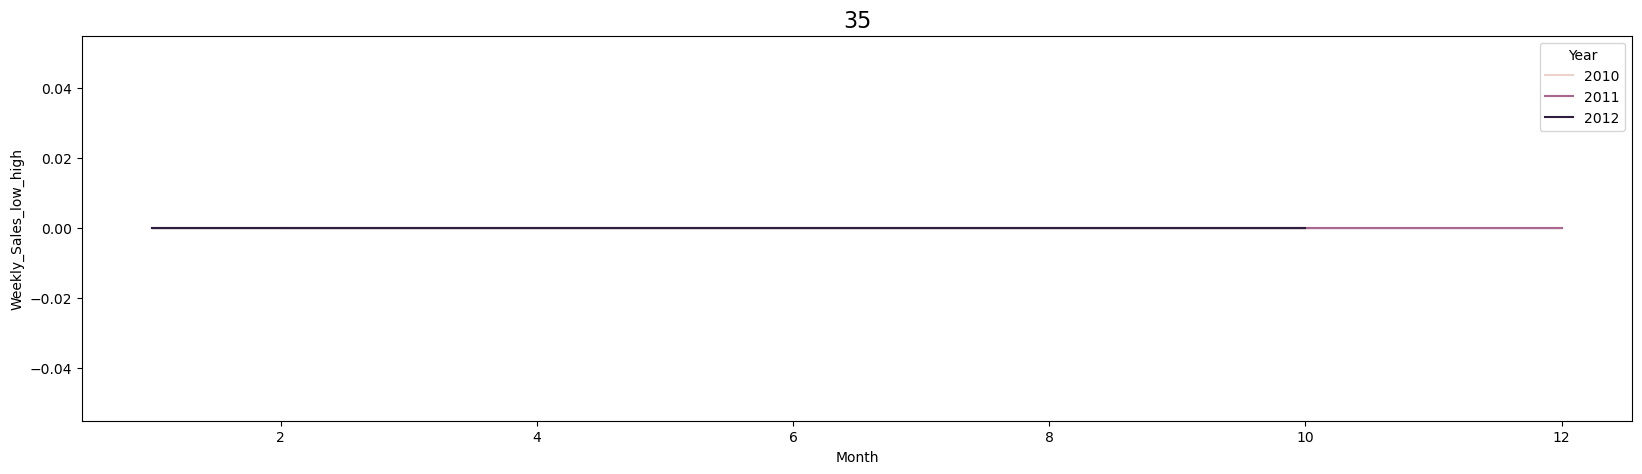

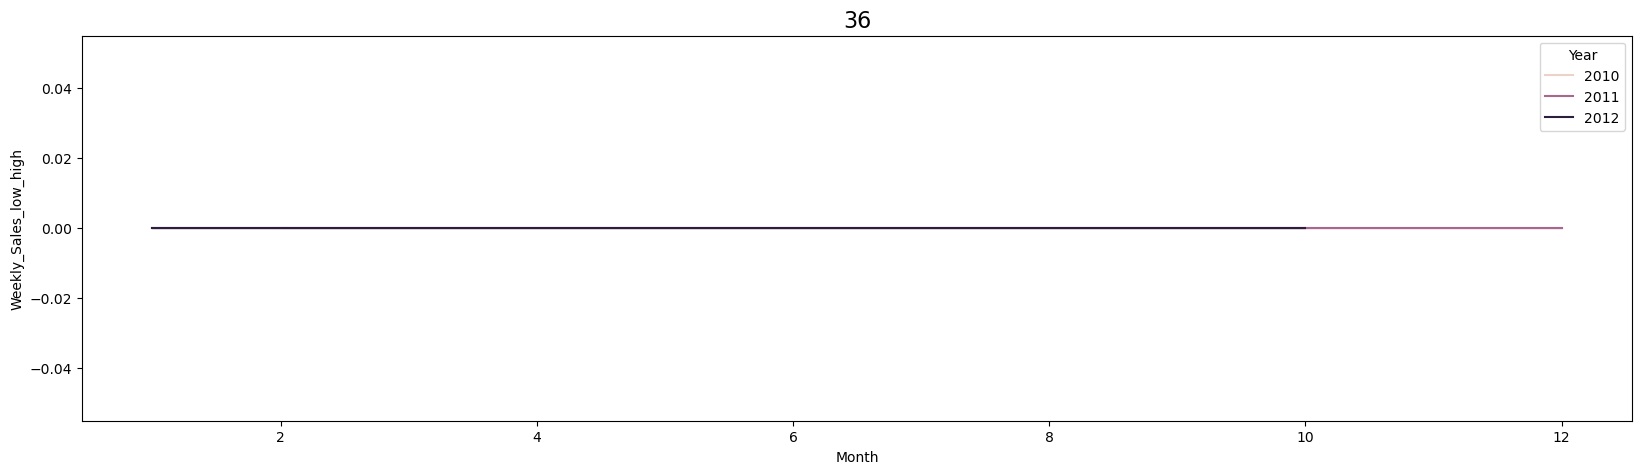

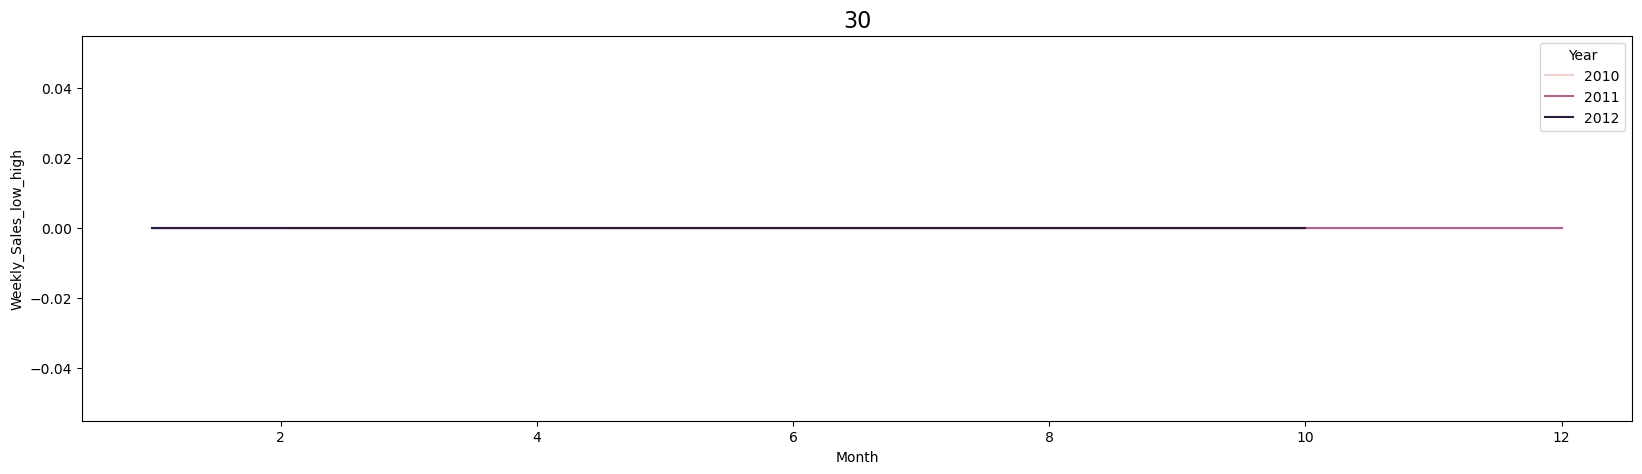

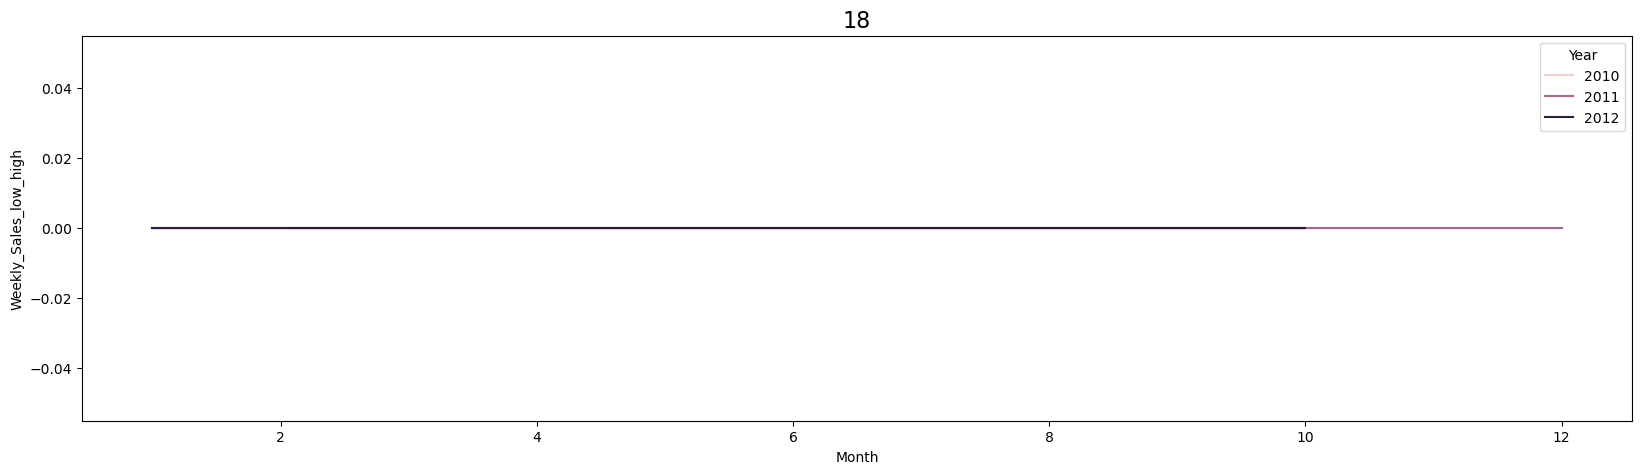

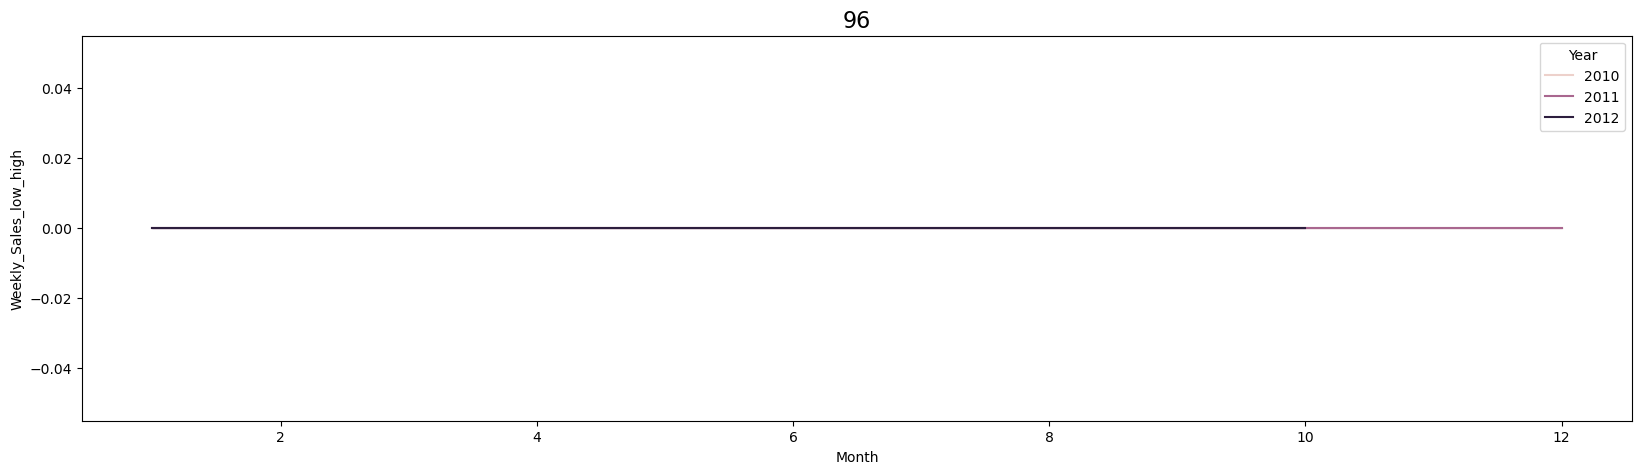

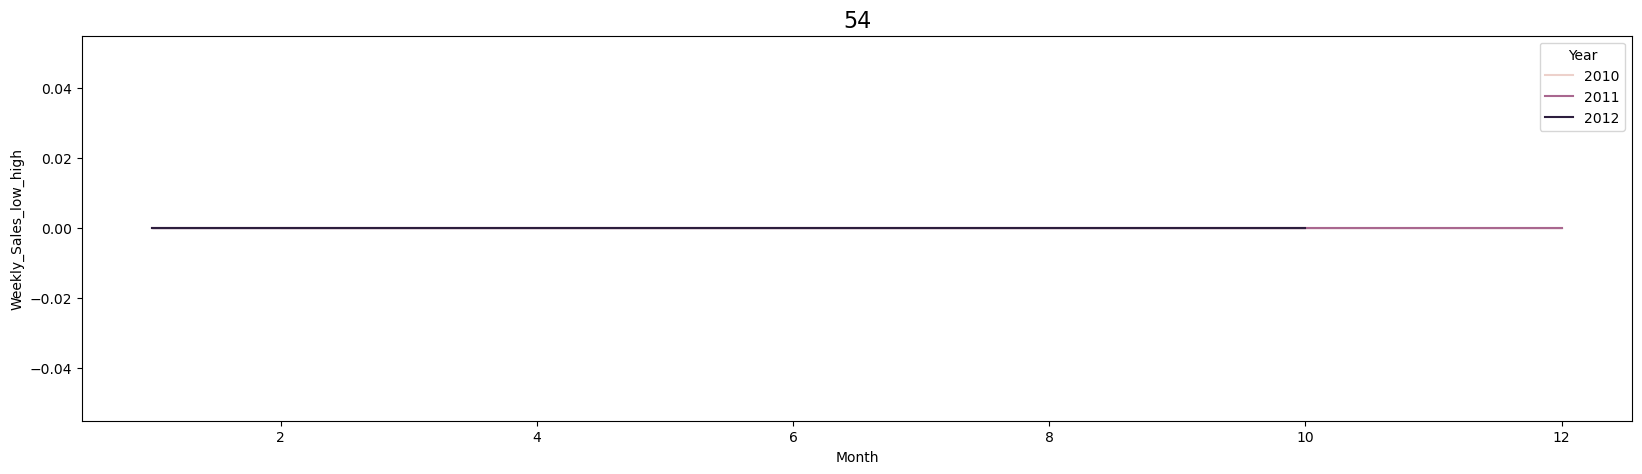

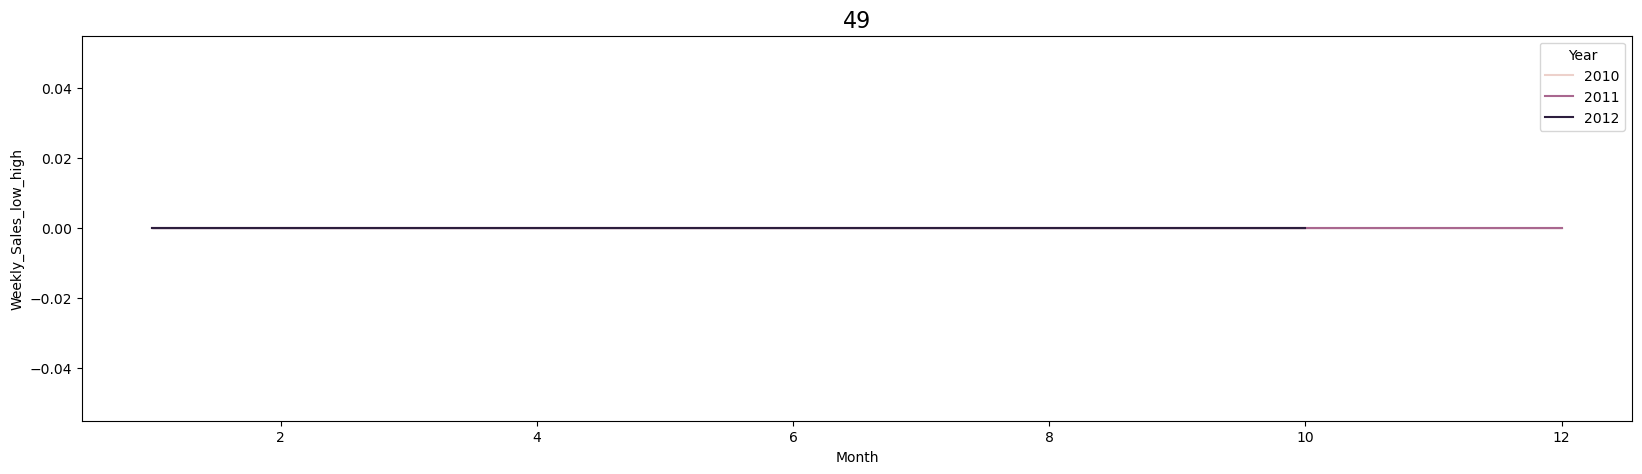

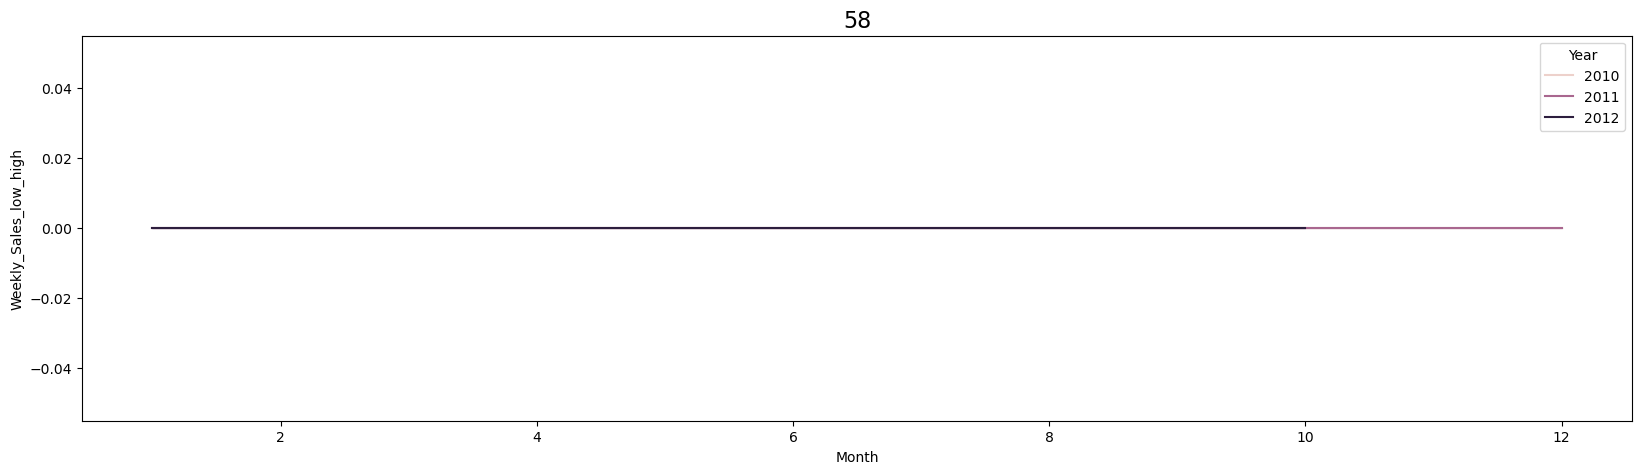

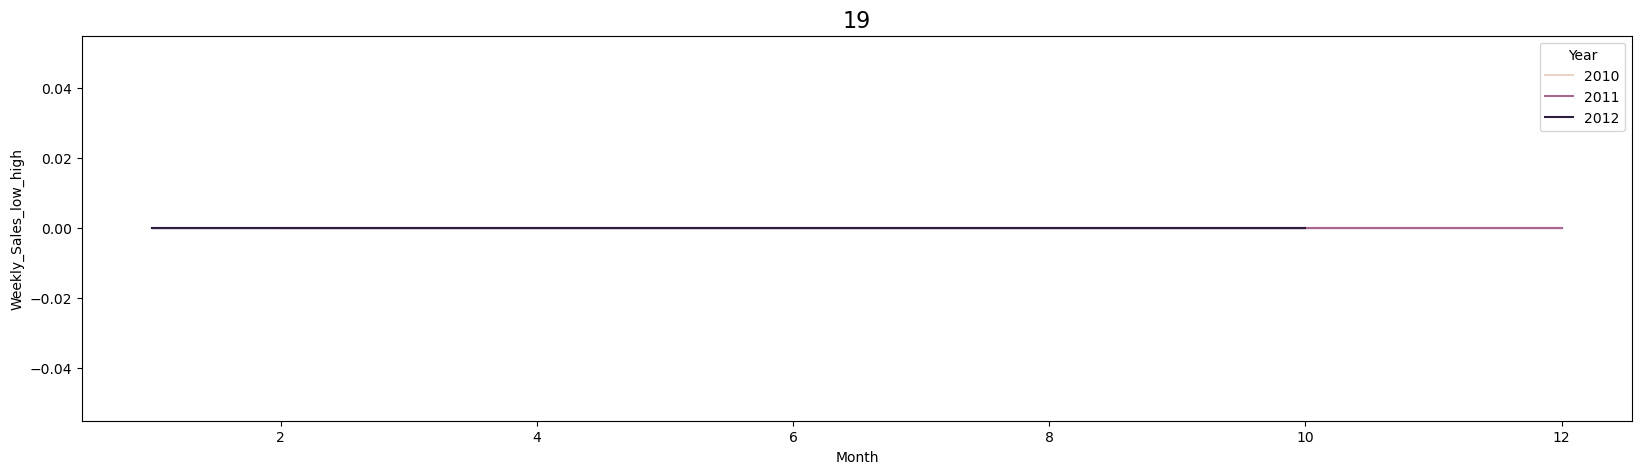

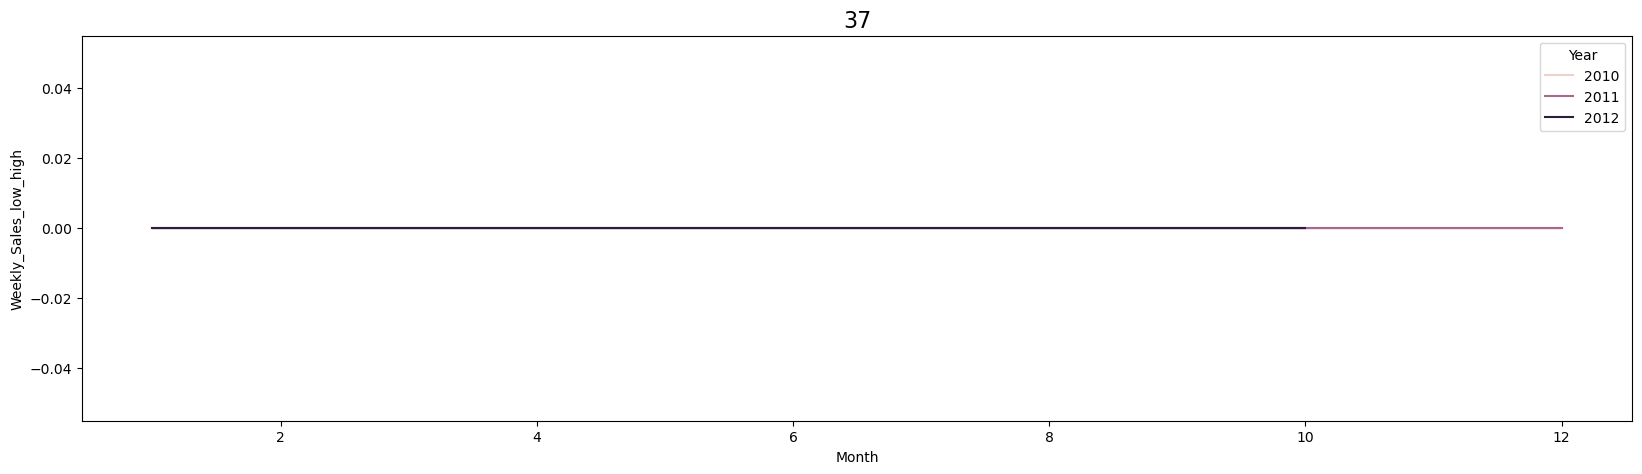

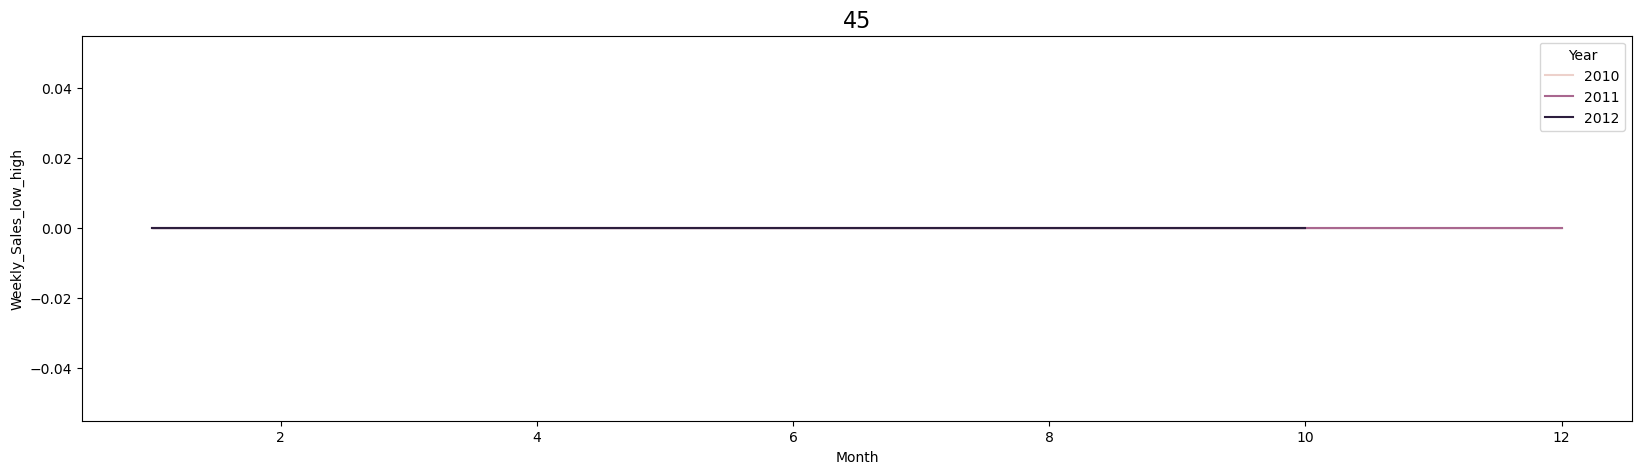

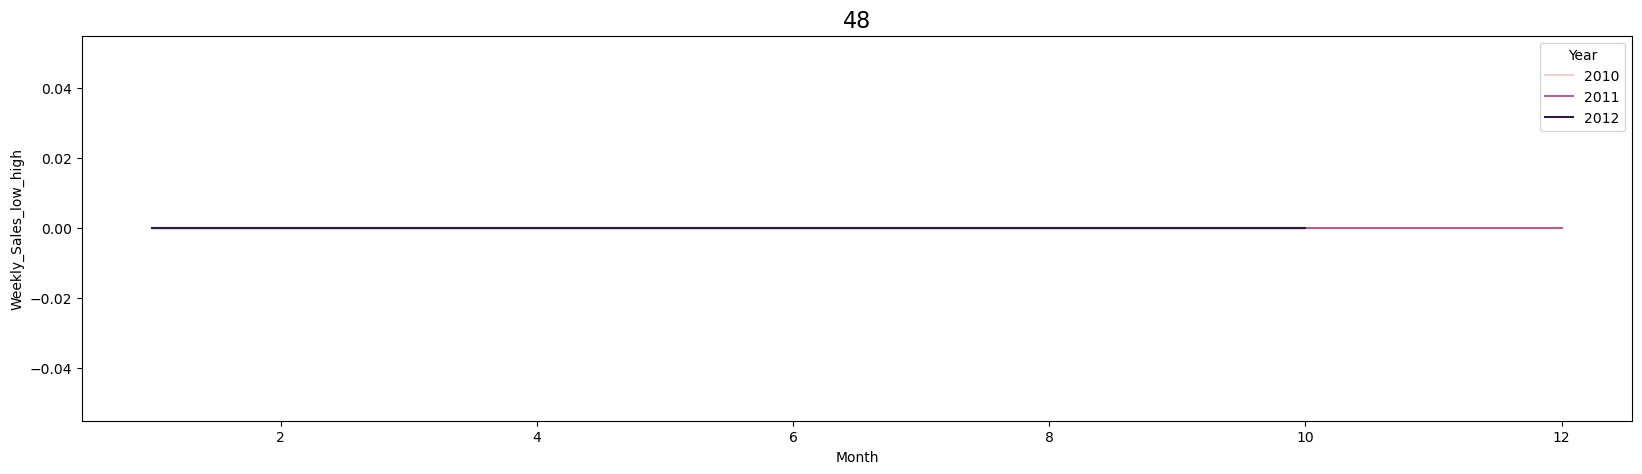

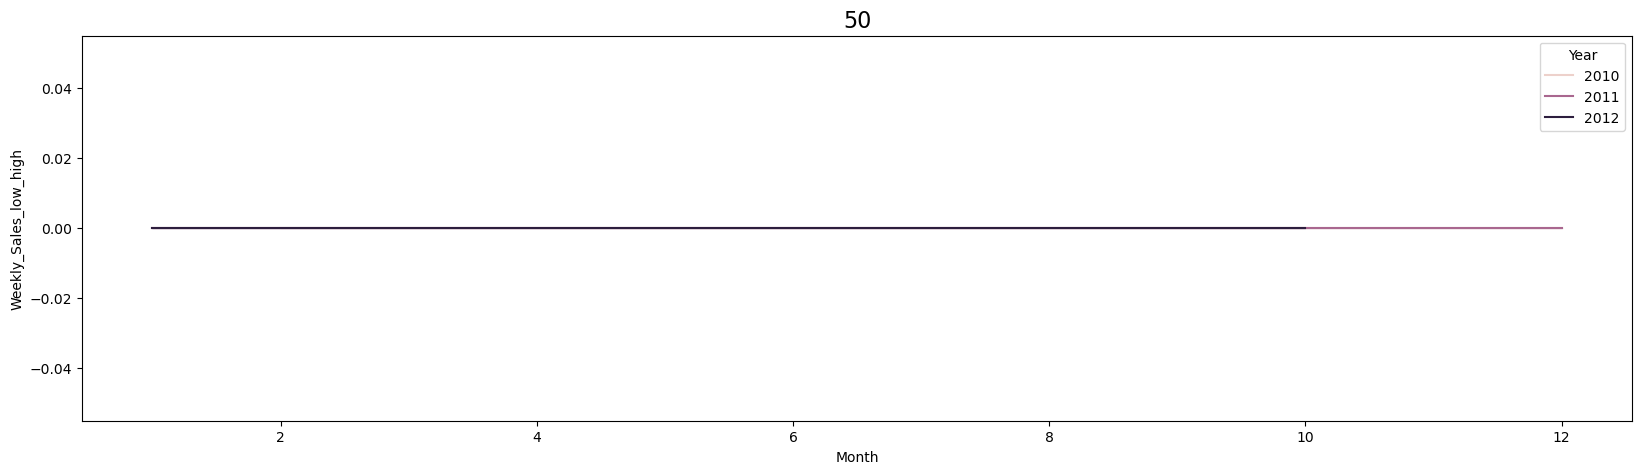

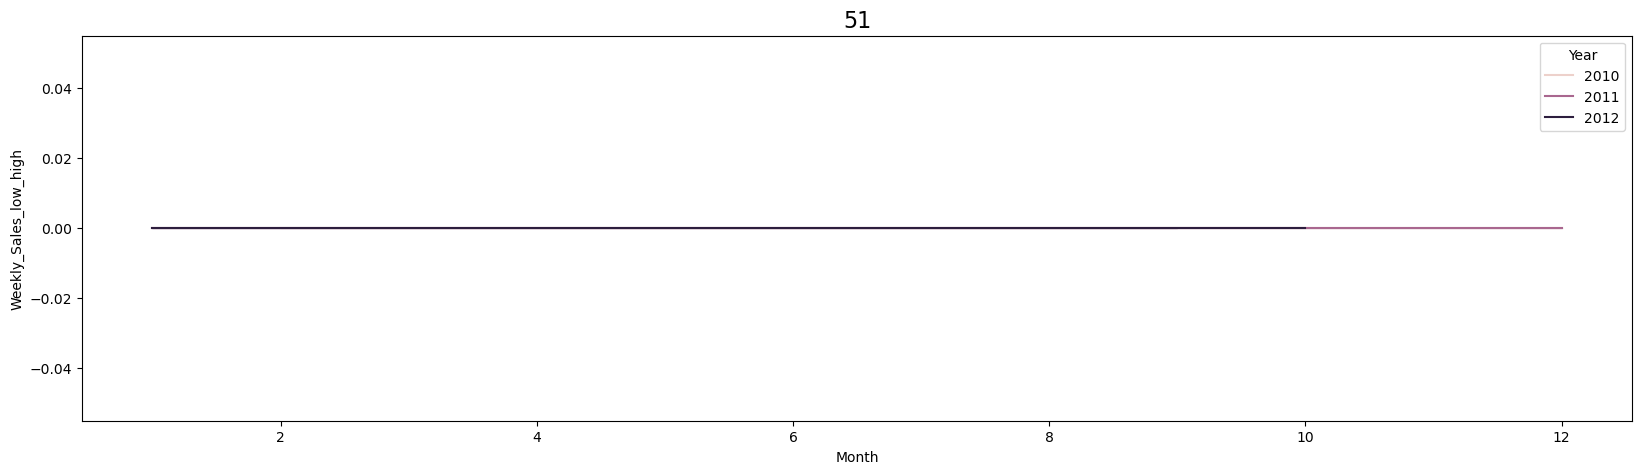

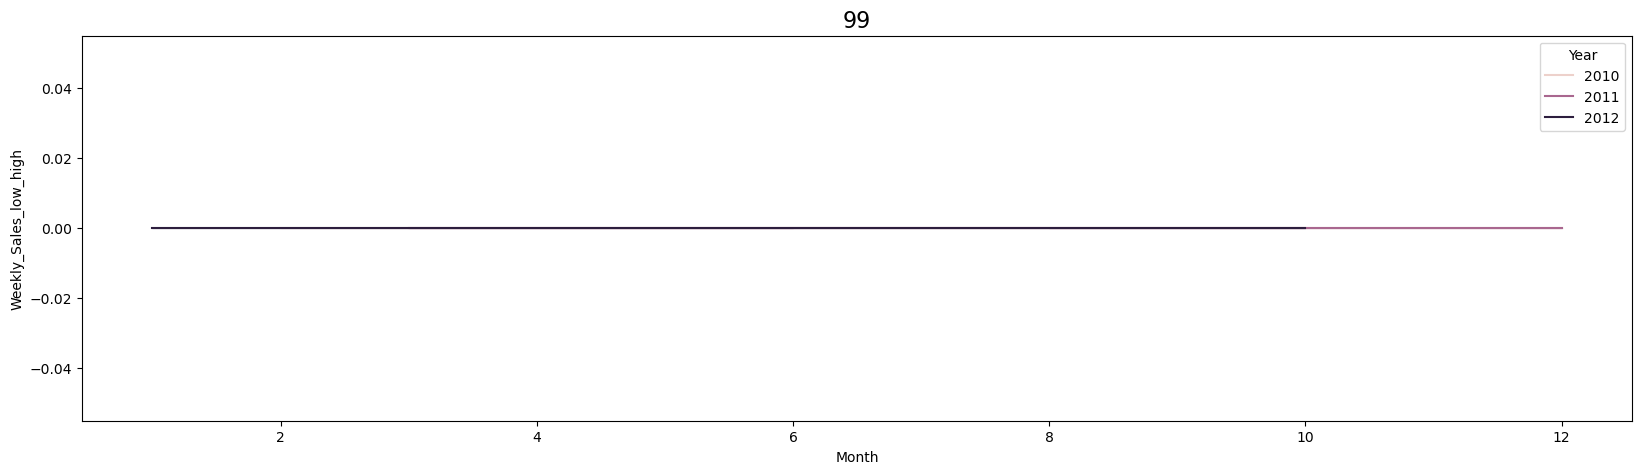

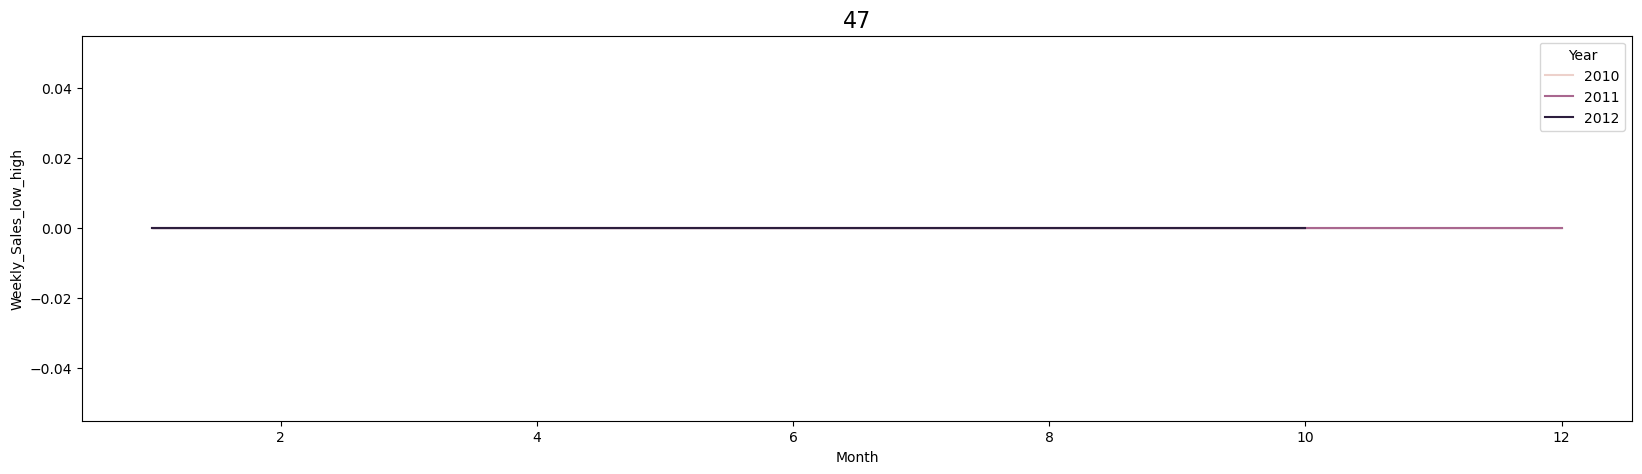

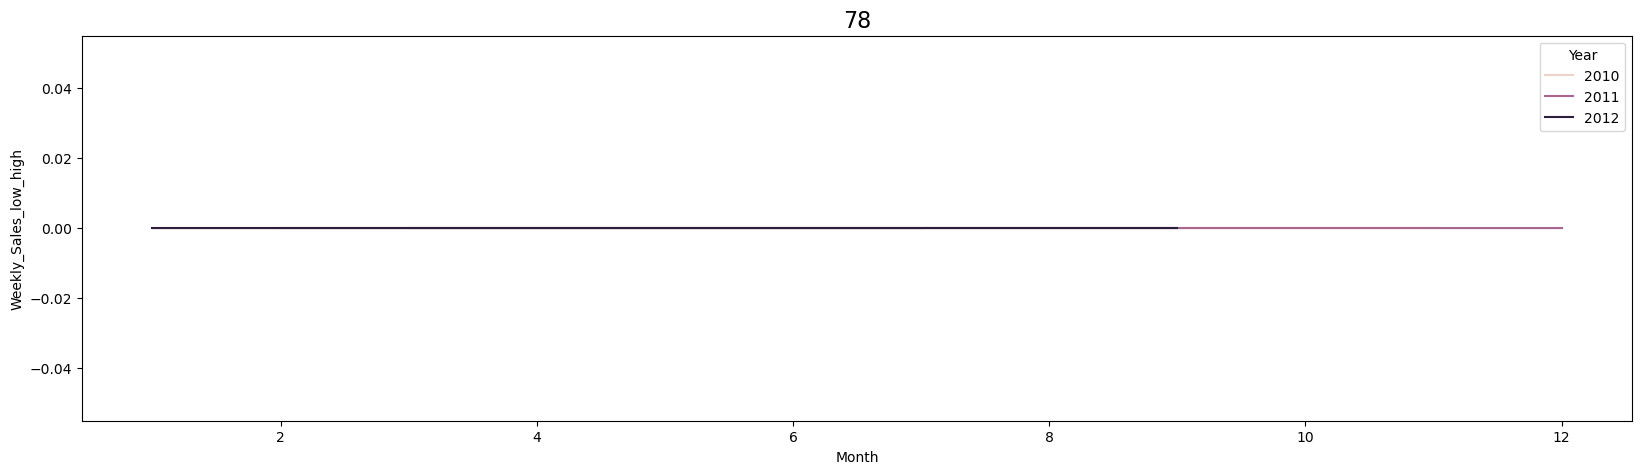

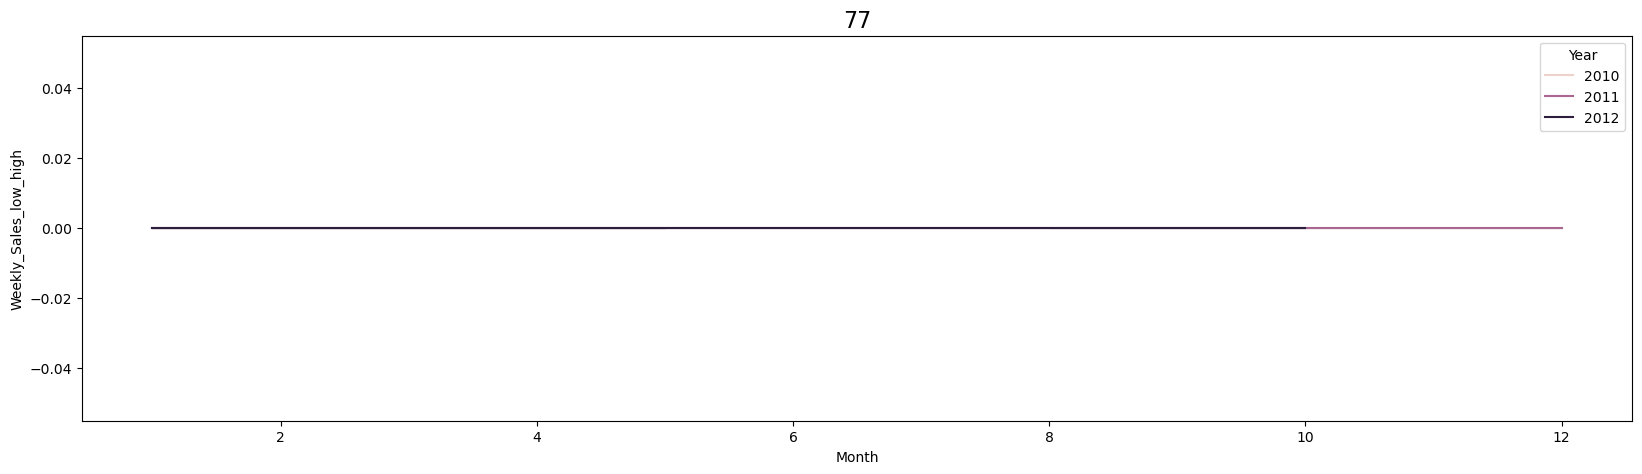

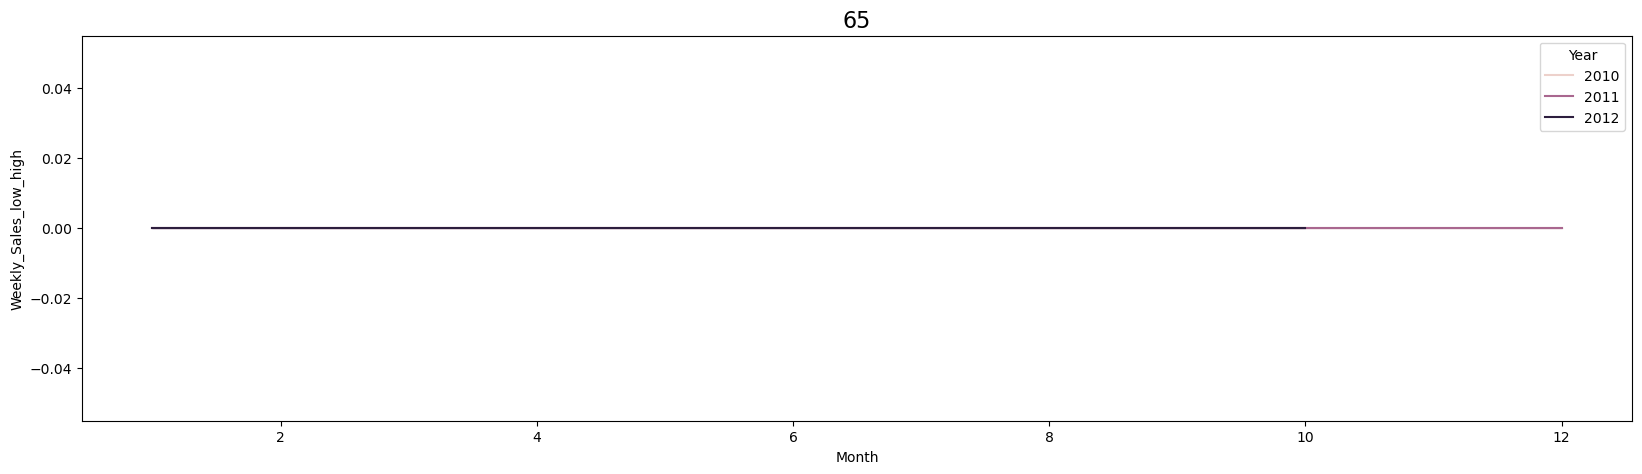

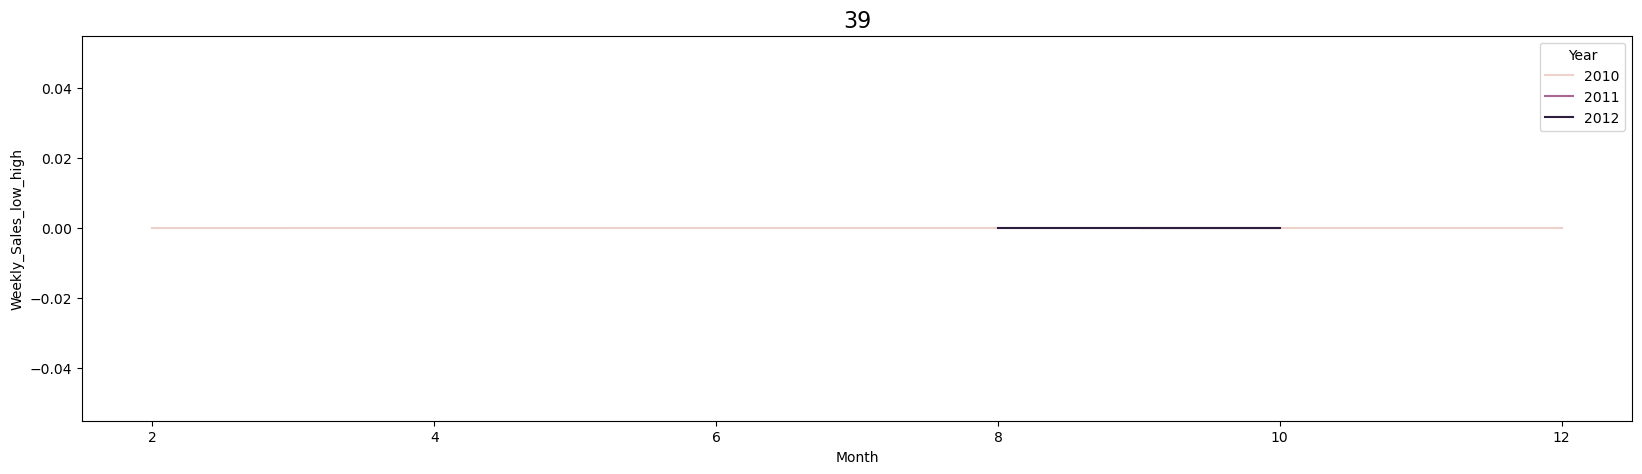

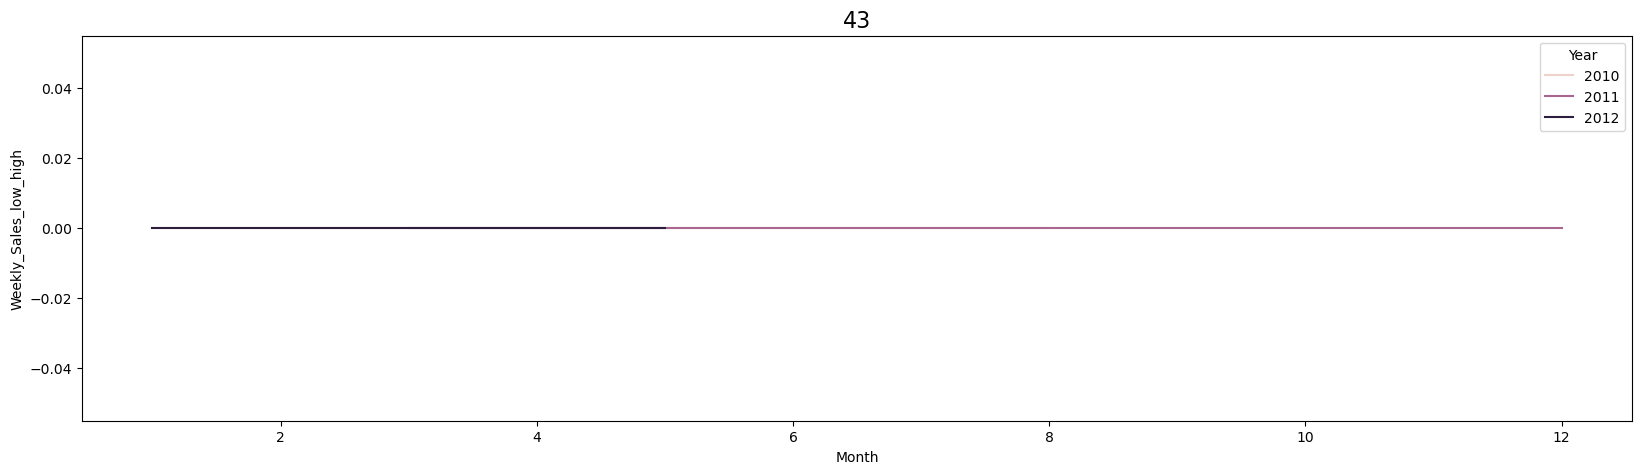

In [61]:
for i in range(len(dataset["Dept"].value_counts())):    
    plt.figure(figsize=(20,5))
    sns.lineplot(x="Month", y="Weekly_Sales_low_high", data=dataset[dataset["Dept"]==dataset["Dept"].value_counts().index[i]],hue="Year").set_title(dataset["Dept"].value_counts().index[i], fontsize=16)

Just Dept. 7 and 72 have extreme Week Sales for November, December, in the years 2009, 2010,2011, 2012.

## Label Encoding

In [62]:
#fill in mean for floats
for c in dataset.columns:
    if dataset[c].dtype=='float16' or  dataset[c].dtype=='float32' or  dataset[c].dtype=='float64':
        dataset[c].fillna(dataset[c].mean())

#fill in -999 for categoricals
dataset = dataset.fillna(-999)
# Label Encoding
for f in dataset.columns:
    if dataset[f].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(dataset[f].values))
        dataset[f] = lbl.transform(list(dataset[f].values))
        
print('Labelling done.') 

Labelling done.


In [63]:
#fill in mean for floats
for c in dataset_test.columns:
    if dataset_test[c].dtype=='float16' or  dataset_test[c].dtype=='float32' or  dataset_test[c].dtype=='float64':
        dataset_test[c].fillna(dataset_test[c].mean())

#fill in -999 for categoricals
dataset_test = dataset_test.fillna(-999)
# Label Encoding
for f in dataset_test.columns:
    if dataset_test[f].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(dataset_test[f].values))
        dataset_test[f] = lbl.transform(list(dataset_test[f].values))
        
print('Labelling done.') 

Labelling done.


## Simple Single Series Analysis by Store

In [64]:
dataset_ts = dataset.groupby(['Date','Store','Dept','CPI'])['Weekly_Sales'].sum().reset_index()
dataset_ts.shape

(421570, 5)

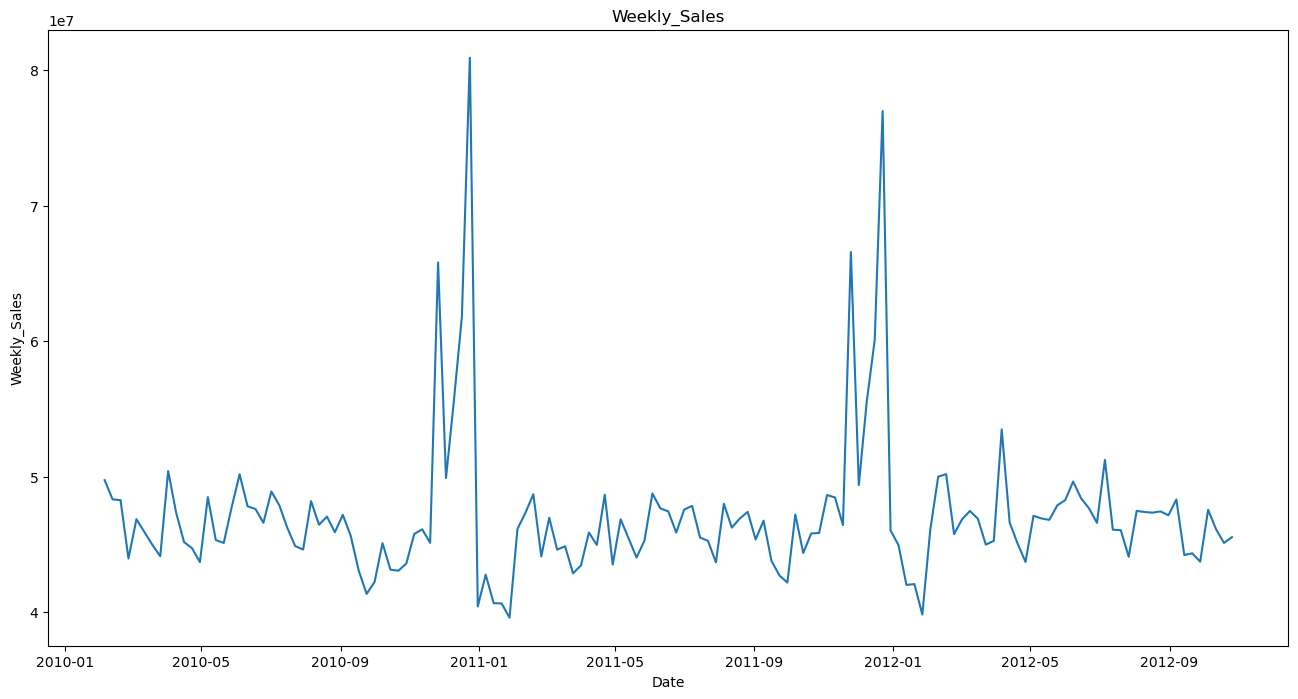

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts=dataset_ts.groupby(["Date"])["Weekly_Sales"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Weekly_Sales')
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.plot(ts);

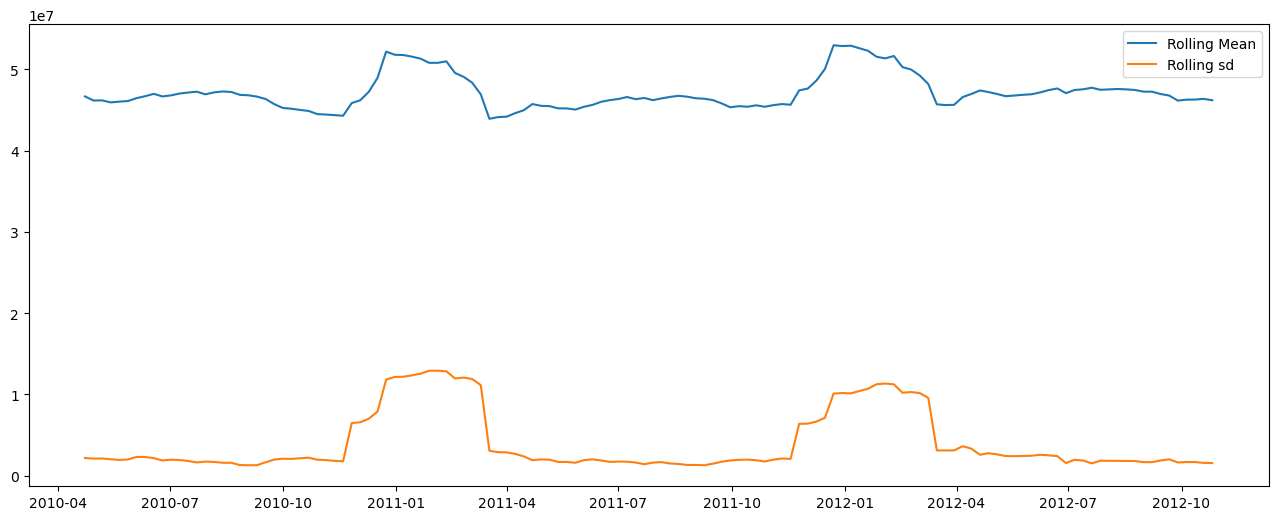

In [66]:
plt.figure(figsize=(16,6))
plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend();

Simple Decomposition time series

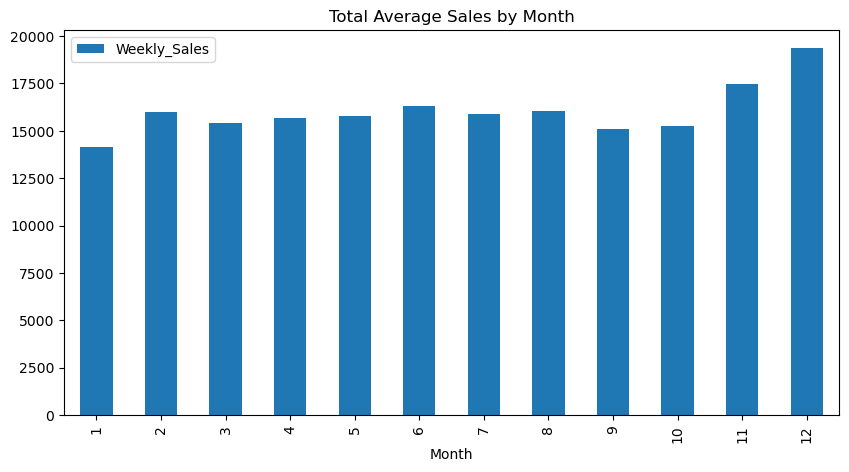

In [67]:
#Monthly growth
gouped_monthly = dataset.groupby('Month')['Weekly_Sales'].mean().T
# gouped_monthly
gouped_monthly.plot(kind='bar',title='Total Average Sales by Month',figsize=(10,5))
plt.legend(loc='best')
plt.show()

Sales by Months- all store 

Time Series forecast for , STORE 1 example

In [68]:
dataset_store = dataset.groupby(['Date','Store','Dept','CPI'])['Weekly_Sales'].sum().reset_index()
Store1 = dataset_store[dataset_store.Store.isin([1])]

In [69]:
# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
import scipy.stats as scs

X = Store1
size = int(len(X) * 0.90)
# limitCount = 100
train, test = X[0:size], X[size:len(X)]
history = [x for x in train.Weekly_Sales]

In [71]:
#pip install pmdarima

In [72]:
def stationary_test(df):
    # https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788
    from statsmodels.tsa.stattools import adfuller
    print(" > Is the data stationary ?")
    dftest = adfuller(df, autolag='AIC')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    print("\n > Is the de-trended data stationary ?")
    dftest = adfuller(df.dropna(), autolag='AIC')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
stationary_test(Store1.Weekly_Sales)

 > Is the data stationary ?
Test statistic = -26.238
P-value = 0.000
Critical values :
	1%: -3.4309910178169387 - The data is  stationary with 99% confidence
	5%: -2.8618232923676863 - The data is  stationary with 95% confidence
	10%: -2.5669207913841827 - The data is  stationary with 90% confidence

 > Is the de-trended data stationary ?
Test statistic = -26.238
P-value = 0.000
Critical values :
	1%: -3.4309910178169387 - The data is  stationary with 99% confidence
	5%: -2.8618232923676863 - The data is  stationary with 95% confidence
	10%: -2.5669207913841827 - The data is  stationary with 90% confidence


## Auto Arima For Time Series Forecast

In [73]:
import pmdarima as pm
from pmdarima import auto_arima
model_ar = auto_arima(train.Weekly_Sales, trace=True, error_action='ignore', suppress_warnings=True)
model_ar.fit(train.Weekly_Sales)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=210889.503, Time=9.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=214729.498, Time=0.36 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=211603.471, Time=0.78 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=212775.742, Time=1.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=219149.665, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=211098.458, Time=3.58 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=211087.463, Time=3.79 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.64 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=210696.034, Time=6.81 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=210951.263, Time=4.07 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=210691.902, Time=14.73 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=210629.634, Time=15.49 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=210629.242, Time=14.27 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=210709.212, Time=10.36 sec
 ARIMA(

ARIMA(order=(4, 0, 2), scoring_args={}, suppress_warnings=True)

In [74]:
forecast = model_ar.predict(n_periods=test.shape[0])

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [75]:
fig= go.Figure(data=
               [go.Scatter(x= test["Date"],
                           y= test["Weekly_Sales"],
                           name= "original", 
                           showlegend=True,
                           marker=dict(color="blue"))])
fig.add_trace(
    go.Scatter(x= test["Date"],
               y=forecast,
               name= "fitted values",
               showlegend= True, 
               marker=dict(color="red")))
fig.update_layout(
    title="Fitted values",
    xaxis_title="Dates",
    yaxis_title="Sales",
    font=dict(
        family="Arial, monospace",
        size=14,
        color="#7f7f7f"
    ) )
fig.show()

The evaluation is based on Weighted Mean Absolute Error(WWAE),with a weight of 5 for Holiday Weeks and 1 otherwise

## Modeling

In [78]:
split_date = '2012-06-01'
data_train = dataset.loc[dataset.Date <= split_date].copy()
data_test = dataset.loc[dataset.Date > split_date].copy()

In [79]:
X_train, y_train = data_train[['Store', 'Size', 'Dept', 'Month', 'Year', 'IsHoliday', 'Temperature', 'Fuel_Price', 
          'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']], data_train['Weekly_Sales']

X_test, y_test = data_test[['Store', 'Size', 'Dept', 'Month', 'Year', 'IsHoliday', 'Temperature', 'Fuel_Price', 
          'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']], data_test['Weekly_Sales']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((359432, 15), (359432,), (62138, 15), (62138,))